# DR PRODTECH - DEMOGRAPHICS & FINANCE REPORT

In [1]:
## UPDATE DATA FILENAME HERE
source = './data/2025-11-13-PT-all-employees.xlsx'

In [2]:
## EXPORT THIS REPORT:
## cd '/Users/demed/Library/CloudStorage/OneDrive-DigitalRoute/ADMIN/HR/PRODTECH DEMOGRAPHICS/Jupyter/'
## /Users/demed/Library/Python/3.9/bin/jupyter-nbconvert PT-demographics-for-CTO-2025.ipynb --to html --no-input --output=reports/$(date +%Y-%m-%d)-PT-demographics-for-CTO-FULL
## OPEN IN GOOGLE CHROME
##PRINT TO PDF

In [3]:
  print(
        "\n\n",
        "\033[1;43m",
        "CONFIDENTIAL AND PRIVILEGED - do not forward",
        "\033[0m",
        "\n",
    )



  CONFIDENTIAL AND PRIVILEGED - do not forward  



In [4]:
## PYTHON PACKAGES TO INSTALL TO RUN THIS NOTEBOOK

## %pip install pandas
## %pip install matplotlib
## %pip install squarify
## %pip install jupyterthemes
## %pip install --upgrade jupyterthemes
## %pip install missingno
## %pip install joypy
## %pip install seaborn
## %pip install plotly
## %pip install openpyxl

In [5]:
## IMPORT REQUIRED PACKAGES
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import locale
import datetime
import joypy
import plotly.express as px
from locale import atof
from IPython.display import HTML
import squarify
import calendar

locale.setlocale(locale.LC_NUMERIC, '')

'C'

In [6]:
## SUPPRESS WARNINGS
# this can be dangerous but too messy output with all the warnings...

import warnings

warnings.filterwarnings('ignore')
#warnings.simplefilter(action="ignore", category=FutureWarning)
#warnings.simplefilter(action="ignore", category=warn_singular)

In [7]:
## SET THE JUPYTER THEME HERE (to get a list of theme, just enter a garbage value to get an error containing list of valid themes)
!jt -t solarizedl -f roboto -fs 12 -nf roboto -nfs 12 -tf roboto -tfs 12 -ofs 12 -cellw 90% -T -N

In [8]:
## SET VARIOUS DISPLAY OPTIONS
## Pandas displays options (number formats etc.)

# import jtplot module in notebook
from jupyterthemes import jtplot

# choose which theme to inherit plotting style from
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
jtplot.style(theme='onedork')

# set "context" (paper, notebook, talk, poster)
# scale font-size of ticklabels, legend, etc.
# remove spines from x and y axes and make grid dashed
jtplot.style(context='talk', fscale=1.4, spines=False, gridlines='--')

# turn on X- and Y-axis tick marks (default=False)
# turn off the axis grid lines (default=True)
# and set the default figure size
jtplot.style(ticks=True, grid=False, figsize=(6, 4.5))

# reset default matplotlib rcParams
jtplot.reset()

def highlight_female(val):
    color = "cornsilk" if val == "Female" else ""
    return "background-color: %s" % color

def set_pandas_display_options() -> None:
    """Set pandas display options."""
    # Ref: https://stackoverflow.com/a/52432757/
    display = pd.options.display
    display.max_columns = 1000
    display.max_rows = 1000
    display.max_colwidth = 199
    display.width = 1000
    display.precision = 0  # set as needed
    display.float_format = lambda x: '{:,.2f}'.format(x)  # set as needed

# pd.options.display.float_format = "{:,.2f}".format
set_pandas_display_options()

format_percentages = "{0:.0f}%".format
format_SEK = "{0:,.0f} SEK".format

In [9]:
## FORMAT MAPPING FOR VARIOUS COLUMNS

format_mapping = {
    "age": "{:,.0f}",
    "bonus_attainment": "{:.0%}",
    "bonus_percentage": lambda x: "{:.0%}".format(x) if not np.isnan(x) else "",
    "bonus_sek": lambda x: "{:,.0f}".format(x) if not np.isnan(x) else "",
    "bonus": lambda x: "{:,.0f}".format(x) if not np.isnan(x) else "",
    "count": "{:,.0f}",
    "date": lambda t: t.strftime("%Y-%m-%d") if ((pd.notna(t)) & (t != "")) else "",
    "employee_cost_vs_dev": "{:.0%}",
    "employee_cost": "{:,.0f} SEK",
    "end": lambda t: t.strftime("%Y-%m-%d") if ((pd.notna(t)) & (t != "")) else "",
    "everyone": '{:,.0f} SEK', 
    "female": '{:,.0f} SEK',
    "forex": "{:,.2f}",
    "male": '{:,.0f} SEK', 
    "median_cost": '{:,.0f} SEK',
    "median_salary": "{:,.0f}",
    "median_TTC": '{:,.0f} SEK', 
    "pct_cost": "{:.0%}",
    "pct_headcount": "{:.0%}",
    "pct_total_employees": "{:.0%}",
    "percentage": "{:.0%}",
    "portion_of_ProdTech": '{:,.0%}',
    "ratio": '{:.0%}',
    "salary_sek": "{:,.0f}",
    "salary_vs_dev": "{:.0%}",
    "salary": "{:,.0f}",
    "social": "{:.0%}",
    "start": lambda t: t.strftime("%Y-%m-%d") if ((pd.notna(t)) & (t != "")) else "",
    "sum": "{:,.0f}",
    "tenure": "{:,.0f}",
    "total_cost": '{:,.0f} SEK',
    "total_salary": '{:,.0f} SEK',
    "total_TTC": '{:,.0f} SEK',
    "total": "{:,.0f}",
    "TTC_sek": "{:,.0f}",
    "TTC_vs_dev": "{:.0%}",
    "TTC": "{:,.0f}",
    "variable portion": "{:,.0f}"
}


## DATA IMPORT & FORMATTING

1. In DigiPeople, go to Reports, select "DATA - FOR JUPYTER NB EXPORTS v2" 
2. "Export to Excel" format.

In [10]:
## IMPORT THE EMPLOYEE DATA CONTAINED IN A CSV TO A DATAFRAME
missing_values = ["n/a","na","--"," "]

## to import from an XLSX file
## If no sheet name is provided, it will read the first sheet by default

df = pd.read_excel(source,
                   sheet_name ='Sympa', 
                   na_values = missing_values)

#print(df_raw.head())

In [11]:
## CHECK THE DATA

print("XLS file, df:\n")
print("Number of rows in file:",len(df))
print("Number of columns in file:",len(df.columns))
#display("Column names:",list(df_raw.columns))
#print("Column names and types:\n\n",df_raw.dtypes)

#print(df_raw.head())

expected_columns = [
    "Surname",
    "First name",
    "Employee number",
    "Type of contract",
    "Region",
    "Country",
    "Office location",
    "Gender",
    "Function",
    "Department",
    "Team",
    "My monthly salary",
    "Annual on target bonus entitlement",
    "Bonus split (in %)",
    "Currency",
    "Start date",
    "End date",
    "Date of birth",
    "is-manager",
    "Manager",
    "Cost center number",
    "Cost center name",
    "Job title"
]

expected_dtypes = {
    "Surname": "object",
    "First name": "object",
    "Employee number": "int64",
    "Type of contract": "object",
    "Region": "object",
    "Country": "object",
    "Office location": "object",
    "Gender": "object",
    "Function": "object",
    "Department": "object",
    "Team": "object",
    "My monthly salary": "float64",
    "Annual on target bonus entitlement": "float64",
    "Bonus split (in %)": "float64",
    "Currency": "object",
    "Start date": "datetime64[ns]",
    "End date": "datetime64[ns]",
    "Date of birth": "datetime64[ns]",
    "is-manager": "object",
    "Manager": "object",
    "Cost center number": "int64",
    "Cost center name": "object",
    "Job title": "object",
}

# Check the names of the columns in df_raw against the "expected_columns" list and highlight differences if any
actual_columns = set(df.columns)
expected_columns_set = set(expected_columns)

# Find differences
missing_from_actual = expected_columns_set - actual_columns
extra_in_actual = actual_columns - expected_columns_set

print("COLUMN COMPARISON:")
print("=" * 80)

if missing_from_actual or extra_in_actual:
    print("❌ DIFFERENCES FOUND:")
    print()
    
    if missing_from_actual:
        print("🔴 Missing from source file (expected but not found):")
        for col in sorted(missing_from_actual):
            print(f"   - {col}")
        print()
    
    if extra_in_actual:
        print("🟡 Extra in source file (found but not expected):")
        for col in sorted(extra_in_actual):
            print(f"   + {col}")
        print()
    
    # Show side-by-side comparison
    print("SIDE-BY-SIDE COMPARISON:")
    print("-" * 80)
    print(f"{'SOURCE FILE COLUMNS':<40} | {'EXPECTED COLUMNS':<40}")
    print("-" * 80)
    
    max_len = max(len(df.columns), len(expected_columns))
    actual_sorted = sorted(df.columns)
    expected_sorted = sorted(expected_columns)
    
    for i in range(max_len):
        actual_col = actual_sorted[i] if i < len(actual_sorted) else ""
        expected_col = expected_sorted[i] if i < len(expected_sorted) else ""
        
        # Highlight differences
        actual_marker = "❌" if actual_col in extra_in_actual else "✓ " if actual_col else "  "
        expected_marker = "❌" if expected_col in missing_from_actual else "✓ " if expected_col else "  "
        
        print(f"{actual_marker} {actual_col:<37} | {expected_marker} {expected_col:<37}")
    
    raise ValueError("Differences in columns found vs what was expected. Please check the column names.")
else:
    print("✅ All column names match the expected list.")

## We expect 23 columns in the source file - if not, error out and stop
if len(df.columns) != len(expected_columns):
    raise ValueError(f"expected {len(expected_columns)} columns in the source file, but found {len(df.columns)}")

if set(df.columns) != set(expected_columns):
    raise ValueError("Column names of df_raw do not match the expected list")

for column, dtype in expected_dtypes.items():
    if df[column].dtype != dtype:
        raise ValueError(f"Column '{column}' of df has incorrect dtype. Expected '{dtype}', but found '{df[column].dtype}'")

print("✅ Columns and data types seem to match what was expected")

XLS file, df:

Number of rows in file: 225
Number of columns in file: 23
COLUMN COMPARISON:
✅ All column names match the expected list.
✅ Columns and data types seem to match what was expected


In [12]:
## IMPORT THE COST CENTER INFO (STORED IN A SEPARATE XLS FILE)

missing_values = ["n/a", "na", "--", " "]

## to import from an XLSX file
ref_cc = pd.read_excel('data/cost-centers.xlsx', 
                   sheet_name ='cost-centers', 
                   na_values = missing_values)

ref_cc["CC"] = ref_cc["CC"].astype("Int64").astype("str")

#display(ref_cc)
#print("Column names and types:\n\n",ref_cc.dtypes)


In [13]:
## CREATE REFERENCE TABLE (foreign exchange rates, social charges, etc.)
## rather than importing this data we will simply set it here
'''ref = pd.read_csv('data/reference-data.csv', 
                  delimiter = ",", 
                  thousands = ",", 
                  decimal = ".", 
                  index_col=None, 
                  encoding='utf-8')'''

## COMMENT: I have no idea what social overhead for Italy, through Deel, might be...

#data = {'country':['Denmark', 'Italy', 'Japan', 'Sweden', 'USA', 'Bulgaria', 'Malaysia'],
#        'currency':['DKK','EUR','JPY','SEK','USD','BGN','MYR'],
#        'forex':[1.55,11.5,1,0.07,10.6,5.9,2.3],
#        'social':[0.45,0.45,0.53,0.45,0.23,0.12,0.18],
#        'bonus_attainment':[0.85,0.85,0.85,0.85,0.85,0.85,0.85],
#        'months':[12,12,12,12,12,12,13]}
#ref = pd.DataFrame(data)

## IMPORT SOME REFERENCE (FOREX, etc.) INFO (STORED IN A SEPARATE XLS FILE)

missing_values = ["n/a", "na", "--", " "]

## to import from an XLSX file
ref = pd.read_excel('data/reference-forex-etc.xlsx', 
                                   sheet_name ='ref', 
                                   na_values = missing_values)

ref.drop(columns=['notes'], inplace=True)

#ref["CC"] = ref_cc["CC"].astype("Int64").astype("str")

#display(ref)
#print("Column names and types:\n\n",ref.dtypes)


In [14]:
## We will use the Currency column as the index to facilitate lookups
ref.set_index('currency', inplace=True)

In [15]:
## DATA QUALITY VISUAL CHECK
## the below is to get a visual overview of the data, to visually spot data quality issues
#import missingno as msno
#%matplotlib inline
#msno.matrix(df_raw)

In [16]:
## COLUMNS RENAME
## (also changing "is-manager" to ismanager as the hyphen can be problematic when referencing specific dataframe fields using the dotted notation)
# print("Number of columns in df:",len(df.columns))
#print("Column names and types:\n\n",df.dtypes)

df.columns = [
    "lname",
    "fname",
    "enumber",
    "contract",
    "region",
    "country",
    "city",
    "gender",
    "function",
    "dept",
    "team",
    "salary",
    "bonus",
    "variable portion",
    "currency",
    "start",
    "end",
    "dob",
    "ismanager",
    "manager",
    "CC",
    "CC_name",
    "title",
]

In [17]:
## CONVERT VARIOUS DATES FROM OBJECT TO DATETIME (not really needed when importing from XLS)

#df['start']=pd.to_datetime(df["start"], format = '%m/%d/%y')
#df['end']=pd.to_datetime(df["end"], format = '%m/%d/%y')

df['start']=pd.to_datetime(df["start"], errors='coerce')
df['end']=pd.to_datetime(df["end"], errors='coerce')
df['dob']=pd.to_datetime(df["dob"], errors='coerce')

#df.end.head(15)

In [18]:
## CONVERT COST CENTER NUMBER FROM FLOAT64 TO OBJECT/STRING (we will not use it in any math operations, it's an ID)
#df['CC'].info()
df['CC'] = df['CC'].astype('Int64').astype('str')
#df['CC'].info()

#df.CC.value_counts().sort_values(ascending=False)

In [19]:
## CONVERT IS-MANAGER TO BOOLEAN TRUE OR FALSE

df.ismanager = df.ismanager.astype(str)
#print(df.ismanager.value_counts())
## All strings are evaluated as "True" when you convert an object to a boolean. 
## So it's not enough to do string substitutions to True and False. Instead, do a mapping as below:
df.ismanager = df.ismanager.map({'nan':False, 'is-manager':True})
#print(df.ismanager.value_counts())
#df.ismanager.head(20)

In [20]:
#df.dtypes

## Now, you should see this.
## * all dates should be datetime64.
## * all numbers should be float64
## * is-manager should be bool (Boolean)

#lname                object
#fname                object
#enumber               int64
#contract             object
#region               object
#country              object
#city                 object
#gender               object
#function             object
#dept                 object
#team                 object
#salary              float64
#bonus               float64
#currency             object
#start        datetime64[ns]
#end          datetime64[ns]
#dob          datetime64[ns]
#ismanager              bool
#manager              object
#CC                  float64
#CC name              object
#title                object
#dtype: object


In [21]:
## VALUES SUBSTITUTIONS
## Substitute some values with more concise values (for display)

df['dept'] = df['dept'].replace(['Usage Engine Cloud Edition'], 'CE')
df['dept'] = df['dept'].replace(['MediationZone, Usage Engine Private Edition'], 'MZ/PE')
df['dept'] = df['dept'].replace(['Site Reliability Engineering'], 'SRE')
df['dept'] = df['dept'].replace(['Engineering Enablement'], 'Enablement')
df['dept'] = df['dept'].replace(['Product Documentation'], 'Doc')
df['dept'] = df['dept'].replace(['Product Design'], 'Design')
df['dept'] = df['dept'].replace(['Product Management Mediation Zone/Private Edition'], 'PM MZ/PE')
df['dept'] = df['dept'].replace(['Product Management Cloud Edition'], 'PM CE')
df['function'] = df['function'].replace(['Product Management'], 'PM')

In [22]:
## CLARIFY PRODUCTS SPECIALIZATION FOR DOT TEAM MEMBERS
# Update department assignments for specific individuals
df.loc[df['lname'] == 'Hatami', 'dept'] = 'DOT CE'
df.loc[df['lname'] == 'Jain', 'dept'] = 'DOT CE'  
df.loc[df['lname'] == 'Kumar Krishnamurthy', 'dept'] = 'DOT MZ'
df.loc[df['lname'] == 'Lim', 'dept'] = 'DOT MZ'
df.loc[df['lname'] == 'Olsson', 'dept'] = 'DOT MZ'

In [23]:
## CLARIFY PRODUCTS SPECIALIZATION FOR UX TEAM MEMBERS
# Update department assignments for Product Design team members based on their product specialization
df.loc[df['lname'] == 'Akbarnejad', 'dept'] = 'Design CE'
df.loc[df['lname'] == 'Farkas', 'dept'] = 'Design CE'
df.loc[df['lname'] == 'Tan', 'dept'] = 'Design MZ'


In [24]:
## CLARIFY PRODUCTS SPECIALIZATION FOR PRODUCT DOCUMENTATION TEAM MEMBERS
# Update department assignments for Product Documentation team members based on their product specialization
df.loc[df['lname'] == 'Borrelli', 'dept'] = 'Doc CE'
df.loc[df['lname'] == 'Han', 'dept'] = 'Doc CE'
df.loc[df['lname'] == 'Silvaratnam', 'dept'] = 'Doc MZ'
df.loc[df['lname'] == 'Wallin', 'dept'] = 'Doc MZ'
df.loc[df['lname'] == 'Wu', 'dept'] = 'Doc MZ'


In [25]:
## SORT THE DATAFRAME BY START DATE, LAST NAME, FIRST NAME

df=df.sort_values(by=['start','lname','fname'],ignore_index=True)

In [26]:
## this should display the last hired employees
#df.tail(15)

## AUGMENT THE DATA (CALCULATED COLUMNS, ETC)

In [27]:
## AUGMENT DATA

## df is our canonical dataframe, containing a clean version of what was exported from DigiPeople.
## From here on we will use copies of this dataframe.
## df_ext is the enriched dataframe

In [28]:
df_ext = df

In [29]:
## NEW CALCULATED COLUMS

## create column with age, computed from DOB

def calc_age(birthdate):
    today = pd.to_datetime('today').normalize()
    return today.year - birthdate.year - ((today.month, today.day) < (birthdate.month, birthdate.day))

df_ext['age'] = df_ext.dob.apply(calc_age)
#display(df_ext[['dob','age']])

# REPORT START - OVERVIEW

In [30]:
import re

print("date of report: ",
      '\033[1m' + pd.to_datetime('today').strftime("%Y-%m-%d") + '\033[0m'
      )
# Extract timestamp from source filename
timestamp_match = re.search(r'(\d{4}-\d{2}-\d{2})', source)
if timestamp_match:
      datafile_timestamp = timestamp_match.group(1)
      print("datafile timestamp:", 
                  '\033[1m' + datafile_timestamp + '\033[0m'
                  )
else:
      print("datafile timestamp: not found in filename")



date of report:  2025-11-14
datafile timestamp: 2025-11-13


In [31]:
  print(
        "\n\n",
        "\033[1;103m",
        "CONFIDENTIAL AND PRIVILEGED - do not forward",
        "\033[0m",
        "\n",
    )



  CONFIDENTIAL AND PRIVILEGED - do not forward  



## OVERVIEW - PRODTECH TODAY

(i.e. employees or contractors who do not have an employment end date)


In [32]:
# todo: should probably not just look at employees with no end date but rather look at 
# employees whose end date is later than today

today = pd.to_datetime('today').normalize()

# if we define as "active" employees without an end date already set:
#df_active = df_ext[df_ext.end.isnull()]

# if we define as "active" employees without an end date or whose end date is in the future
df_active = df_ext[ (df_ext.end.isnull()) | (df_ext['end']>today)]

print("ProdTech total size as of today")
print("═" * 20)
print(f"   ★★★  " + "\033[1;103m\033[2m" + " " + str(len(df_active)) + " " + "\033[0m" + "  ★★★")
print("═" * 20)

print("\nWhat does this number include? \n* All signed hires (regardless of whether they have started or not)" + 
      "\n* All active employees (i.e. those without an end date or whose end date is in the future)." +
      "\n* Any contractors (LTC, sub-contractor or employees through Deel), regardless of their utilization level")

print("\nnote: this number may differ from what you see in DigiPeople, because the org chart in DigiPeople include all people who are still on the books, i.e. whose \"last day of employment\" (different from end date) is in the future.")
discrete_functions = df_active['function'].unique()
print("\nTeams (functions) included in this report:")
for func in discrete_functions:
      print(f"- {func}")

ProdTech total size as of today
════════════════════
   ★★★   95   ★★★
════════════════════

What does this number include? 
* All signed hires (regardless of whether they have started or not)
* All active employees (i.e. those without an end date or whose end date is in the future).
* Any contractors (LTC, sub-contractor or employees through Deel), regardless of their utilization level

note: this number may differ from what you see in DigiPeople, because the org chart in DigiPeople include all people who are still on the books, i.e. whose "last day of employment" (different from end date) is in the future.

Teams (functions) included in this report:
- PM
- Engineering Operations
- Engineering
- Customer Support
- Security


In [33]:
# Create breakdown of people per contract type with both counts and percentages
sf_contract = df_active.contract.value_counts().sort_values(ascending=False)
df_contract_breakdown = pd.DataFrame({'contract_type': sf_contract.index, 'count': sf_contract.values})

# Calculate percentages
df_contract_breakdown['percentage'] = (df_contract_breakdown['count'] / df_contract_breakdown['count'].sum())

# Add total row
df_contract_breakdown_display = df_contract_breakdown.copy()
df_contract_breakdown_display.loc['TOTAL'] = ['//// TOTAL ////', df_contract_breakdown['count'].sum(), 1.0]

print("ProdTech Team Breakdown by Contract Type:")
display(df_contract_breakdown_display
    .style
    .format(format_mapping)
    .hide(axis='index')
    .highlight_max(subset=['count'], color='lightgreen')
    .bar(color='lightblue', vmin=0, subset=['count'], align='zero')
    .bar(color='lightcoral', vmin=0, subset=['percentage'], align='zero')
       )

# Show detailed list of non-permanent employees
print("\nDetailed list of all non-permanent employees:")
non_permanent = df_active[df_active['contract'] != 'Permanent'][['fname', 'lname', 'contract', 'start', 'end', 'function', 'title']]

if len(non_permanent) > 0:
    display(non_permanent
        .sort_values(by=['contract', 'start'])
        .style
        .format(format_mapping)
        .hide(axis='index')
       )
else:
    print("No non-permanent employees found in active employee dataset.")

ProdTech Team Breakdown by Contract Type:


contract_type,count,percentage
Permanent,90,95%
Sub Contractor,3,3%
Employed via partner,1,1%
Long term Contractor,1,1%
//// TOTAL ////,95,100%



Detailed list of all non-permanent employees:


fname,lname,contract,start,end,function,title
Magnus,Vojbacke,Employed via partner,2011-10-17,,Engineering Operations,SRE Engineer
Bartlomiej,Talarek,Long term Contractor,2017-12-01,,Customer Support,L3 Support Engineer
Gaurav,Dixit,Sub Contractor,2022-11-07,,PM,"Lead Product Manager, Analytics and Machine Learning"
Kreshnaa,Raam,Sub Contractor,2023-02-23,2026-12-31,PM,Software Engineer
Shashank,Kumar Sahu,Sub Contractor,2025-05-08,2026-12-31,PM,Software Engineer


In [34]:
# Create breakdown of people per function with both counts and percentages
sf_function = df_active.function.value_counts().sort_values(ascending=False)
df_function_breakdown = pd.DataFrame({'function': sf_function.index, 'count': sf_function.values})

# Calculate percentages
df_function_breakdown['percentage'] = (df_function_breakdown['count'] / df_function_breakdown['count'].sum())

# Add total row
df_function_breakdown_display = df_function_breakdown.copy()
df_function_breakdown_display.loc['TOTAL'] = ['//// TOTAL ////', df_function_breakdown['count'].sum(), 1.0]

print("ProdTech Team Breakdown by Function:")
display(df_function_breakdown_display
    .style
    .format(format_mapping)
    .hide(axis='index')
    .highlight_max(subset=['count'], color='lightgreen')
    .bar(color='lightblue', vmin=0, subset=['count'], align='zero')
    .bar(color='lightcoral', vmin=0, subset=['percentage'], align='zero')
       )


ProdTech Team Breakdown by Function:


function,count,percentage
Engineering,44,46%
PM,20,21%
Customer Support,19,20%
Engineering Operations,11,12%
Security,1,1%
//// TOTAL ////,95,100%


In [35]:
# Create breakdown of people per product with both counts and percentages
sf_product = df_active.dept.value_counts().sort_index()  # Changed to sort_index() for alphabetical order
df_product_breakdown = pd.DataFrame({'product': sf_product.index, 'count': sf_product.values})

# Calculate percentages
df_product_breakdown['percentage'] = (df_product_breakdown['count'] / df_product_breakdown['count'].sum())

# Add total row
df_product_breakdown_display = df_product_breakdown.copy()
df_product_breakdown_display.loc['TOTAL'] = ['//// TOTAL ////', df_product_breakdown['count'].sum(), 1.0]

# print("ProdTech Team Breakdown by Department (Product):")
# display(df_product_breakdown_display
#     .style
#     .format(format_mapping)
#     .hide(axis='index')
#     .highlight_max(subset=['count'], color='lightgreen')
#     .bar(color='lightblue', vmin=0, subset=['count'], align='zero')
#     .bar(color='lightcoral', vmin=0, subset=['percentage'], align='zero')
#        )


In [36]:
# Create breakdown of people per product with both counts and percentages
# First, create a mapping function to group departments into broader product categories
def map_product_category(dept):
    if pd.isna(dept):
        return "Other"
    elif "CE" in str(dept) or "SRE" in str(dept):
        return "CE"
    elif "MZ" in str(dept) or "PE" in str(dept):
        return "MZ/PE"
    else:
        return "Other"

# Apply the mapping to create product categories
df_active['product_category'] = df_active['dept'].apply(map_product_category)

# Show which departments are mapped to each category for transparency
print("Product category mapping:")
category_mapping = df_active.groupby('product_category')['dept'].unique()
for category, depts in category_mapping.items():
    print(f"• {category} = {', '.join([str(d) for d in depts if pd.notna(d)])}")
print()

# Create breakdown using the new product categories
sf_product = df_active.product_category.value_counts().sort_index()
df_product_breakdown = pd.DataFrame({'product': sf_product.index, 'count': sf_product.values})

# Calculate percentages
df_product_breakdown['percentage'] = (df_product_breakdown['count'] / df_product_breakdown['count'].sum())

# Add total row
df_product_breakdown_display = df_product_breakdown.copy()
df_product_breakdown_display.loc['TOTAL'] = ['//// TOTAL ////', df_product_breakdown['count'].sum(), 1.0]

print("ProdTech Team Breakdown by Product Category:")
display(df_product_breakdown_display
    .style
    .format(format_mapping)
    .hide(axis='index')
    .highlight_max(subset=['count'], color='lightgreen')
    .bar(color='lightblue', vmin=0, subset=['count'], align='zero')
    .bar(color='lightcoral', vmin=0, subset=['percentage'], align='zero')
       )


Product category mapping:
• CE = SRE, PM CE, CE, Design CE, DOT CE, Doc CE
• MZ/PE = PM MZ/PE, DOT MZ, MZ/PE, Doc MZ, Design MZ
• Other = Support Quality Management, L1 APAC/EMEA, L2 AMER/EMEA, L3 EMEA/APAC

ProdTech Team Breakdown by Product Category:


product,count,percentage
CE,31,33%
MZ/PE,36,38%
Other,28,29%
//// TOTAL ////,95,100%


In [37]:
# Create breakdown of people per function within each product category
product_categories = ['CE', 'MZ/PE', 'Other']

for category in product_categories:
    print(f"\n{category} Team Breakdown by Function:")
    
    # Filter active employees for this product category
    df_category = df_active[df_active['product_category'] == category]
    
    if len(df_category) > 0:
        # Create breakdown by function within this category
        sf_function = df_category.function.value_counts().sort_values(ascending=False)
        df_function_breakdown = pd.DataFrame({'function': sf_function.index, 'count': sf_function.values})
        
        # Calculate percentages within this category
        df_function_breakdown['percentage'] = (df_function_breakdown['count'] / df_function_breakdown['count'].sum())
        
        # Add total row
        df_function_breakdown_display = df_function_breakdown.copy()
        df_function_breakdown_display.loc['TOTAL'] = ['//// TOTAL ////', df_function_breakdown['count'].sum(), 1.0]
        
        display(df_function_breakdown_display
            .style
            .format(format_mapping)
            .hide(axis='index')
            .highlight_max(subset=['count'], color='lightgreen')
            .bar(color='lightblue', vmin=0, subset=['count'], align='zero')
            .bar(color='lightcoral', vmin=0, subset=['percentage'], align='zero')
               )
        
        # Create compact names table with one column per function
        print(f"\n{category} Team Members by Function:")
        
        # Get unique functions in this category
        functions = df_category['function'].dropna().unique()
        
        # Create a dictionary to store names by function
        names_by_function = {}
        max_names = 0
        
        for func in functions:
            names = df_category[df_category['function'] == func]['fname'] + ' ' + df_category[df_category['function'] == func]['lname'] + ' (' + df_category[df_category['function'] == func]['dept'].astype(str) + ', ' + df_category[df_category['function'] == func]['title'].astype(str) + ')'
            names_by_function[func] = names.tolist()
            max_names = max(max_names, len(names))
        
        # Create DataFrame with functions as columns
        names_df = pd.DataFrame()
        for func in functions:
            # Pad the list to max_names length with empty strings
            padded_names = names_by_function[func] + [''] * (max_names - len(names_by_function[func]))
            names_df[func] = padded_names
        
        # Display the names table
        display(names_df
                .style
                .hide(axis='index')
                .set_table_styles([
                    {'selector': 'th', 'props': [('font-weight', 'bold'), ('text-align', 'center')]},
                    {'selector': 'td', 'props': [('text-align', 'left'), ('vertical-align', 'top')]}
                ])
               )
    else:
        print(f"No employees found in {category} category")



CE Team Breakdown by Function:


function,count,percentage
Engineering,17,55%
Engineering Operations,7,23%
PM,7,23%
//// TOTAL ////,31,100%



CE Team Members by Function:


Engineering Operations,PM,Engineering
"Magnus Vojbacke (SRE, SRE Engineer)","Jonas Wallenius (PM CE, Product Owner)","Jonas Brandvik (CE, Lead Engineer)"
"Simon Wood Choy Chooi (SRE, Lead SRE Engineer)","Diksha Sethi (PM CE, Group Product Manager)","Carl-Axel Hallgren (CE, Software Engineer)"
"Brian Thong Phang Kee (SRE, SRE Engineer)","Sheela Aleyak (PM CE, Product Owner)","Alex dos Santos Alves (CE, Software Engineer)"
"Cheng Kai Fung (SRE, SRE Engineer)","Navid Akbarnejad (Design CE, Product Designer)","Babak Gholamzadeh (CE, Software Engineer)"
"Navoda Dissanayake (SRE, SRE Engineer)","Casey Lee Han (Doc CE, Technical Writer)","Jee Meng Lam (CE, Software Engineer)"
"Mohsen Hatami (DOT CE, DevOps Engineer)","Felicity Borrelli (Doc CE, Technical Writer)","Rizman Hariz Abdul Latiff (CE, Software Engineer)"
"Deepika Jain (DOT CE, DevOps Engineer)","Richard Farkas (Design CE, Product Design Manager)","Michal Gasek (CE, Lead Architect)"
,,"Chai Shawn Phua (CE, Software Engineer)"
,,"Davion Eng Hoe Teh (CE, Software Engineer)"
,,"Ivan Smirnov (CE, Lead QA Automation Engineer)"



MZ/PE Team Breakdown by Function:


function,count,percentage
Engineering,26,72%
PM,7,19%
Engineering Operations,3,8%
//// TOTAL ////,36,100%



MZ/PE Team Members by Function:


PM,Engineering Operations,Engineering
"Sandra Dusic (PM MZ/PE, Technical Product Manager)","Johan Olsson (DOT MZ, DevOps Engineer)","David Sjölin (MZ/PE, Software Engineer)"
"Jenni Wallin (Doc MZ, Head of Product Documentation)","Szu Yew Lim (DOT MZ, Software Engineer)","Peter Martinsson (MZ/PE, Software Engineer)"
"Kevin Jia Ping Wu (Doc MZ, Technical Writer)","Sarath Kumar Krishnamurthy (DOT MZ, DevOps Engineer)","Anders Eliasson (MZ/PE, Software Engineer)"
"Chee Keong Yong (PM MZ/PE, Technical Product Manager)",,"Wei Siong Siow (MZ/PE, Software Engineer)"
"Daryl Kuan Yew Tan (Design MZ, Product Designer)",,"Mattias Lundström (MZ/PE, Software Architect)"
"Neil Smith-Willis (PM MZ/PE, Lead Product Owner)",,"Chooi San Chong (MZ/PE, QA Engineer)"
"Nirosan Silvaratnam (Doc MZ, Technical Writer)",,"Kam Heng Choy (MZ/PE, Software Engineer)"
,,"Michal Cholewa (MZ/PE, Software Engineer)"
,,"Chee Hove Teng (MZ/PE, Software Engineer)"
,,"Yuri Yude Luan Au Yong (MZ/PE, Software Engineer)"



Other Team Breakdown by Function:


function,count,percentage
Customer Support,19,68%
PM,6,21%
Engineering,1,4%
Security,1,4%
Engineering Operations,1,4%
//// TOTAL ////,28,100%



Other Team Members by Function:


Customer Support,PM,Engineering,Security,Engineering Operations
"Mia Myrkheimr (Support Quality Management, Support Quality Specialist)","Johan Bjärås (nan, Alliance Technical Account Manager)","Alan Jyh Uei Chew (nan, Engineering Manager)","Yaad Karim (nan, CISO)","Liubov Koreva (nan, Head of Engineering Operations)"
"Hafizzy Mhod Shubari (L1 APAC/EMEA, Support Manager)","Lars Månsson (nan, Commercial Product Manager)",,,
"Muhammad Ariff Hamzah (L1 APAC/EMEA, L1 Support Engineer)","Emil Eriksson (nan, Head of Products)",,,
"Mohd Faizal Hasan (L1 APAC/EMEA, L1 Team Lead)","Gaurav Dixit (nan, Lead Product Manager, Analytics and Machine Learning)",,,
"Kim Hansson (nan, Head of Customer Support)","Kreshnaa Raam (nan, Software Engineer)",,,
"Muhammad Muhaimi Mustaphy (L2 AMER/EMEA, L2 Team Lead)","Shashank Kumar Sahu (nan, Software Engineer)",,,
"Rosli Abas (L2 AMER/EMEA, L2 Support Engineer)",,,,
"Bartlomiej Talarek (L3 EMEA/APAC, L3 Support Engineer)",,,,
"Chze Perng Kerk (L3 EMEA/APAC, L3 Support Engineer)",,,,
"Nikolay Bakalov (L3 EMEA/APAC, L3 Support Engineer)",,,,


In [38]:
# Management analysis - managers by function and span of control

# Filter for managers only
df_managers = df_active[df_active['ismanager'] == True].copy()

print(f"Total number of managers in ProdTech: {len(df_managers)}")
print(f"Total number of employees in ProdTech: {len(df_active)}")
print(f"Average employee-to-manager ratio: {len(df_active) / len(df_managers):.0f}:1")
print()

# Calculate span of control for each manager
span_of_control = []

for idx, manager_row in df_managers.iterrows():
    # Use the exact manager name format that appears in the 'manager' column
    manager_name = manager_row['manager']  # This is the key fix
    
    # Count direct reports - find employees whose manager matches this person's name
    # We need to match by the manager field format: "Last, First"
    manager_last_first = f"{manager_row['lname']}, {manager_row['fname']}"
    
    # Count direct reports using the Last, First format
    direct_reports = df_active[df_active['manager'] == manager_last_first]
    reports_count = len(direct_reports)
    
    span_of_control.append({
        'manager_name': f"{manager_row['fname']} {manager_row['lname']}",  # Display as First Last
        'function': manager_row['function'],
        'dept': manager_row['dept'],
        'title': manager_row['title'],
        'reports_count': reports_count,
        'direct_reports': list(direct_reports['fname'] + ' ' + direct_reports['lname']) if reports_count > 0 else []
    })

# Convert to DataFrame
span_df = pd.DataFrame(span_of_control)

# Calculate span of control statistics by function
span_stats = span_df.groupby('function')['reports_count'].agg([
    'count',
    'min', 
    'median',
    'max',
    'mean'
]).round(1)

# Create manager summary by function
manager_summary = df_managers.groupby('function').agg({
    'fname': 'count'  # Count of managers
}).rename(columns={'fname': 'managers'})

# Combine manager summary with span statistics
manager_analysis = manager_summary.join(span_stats, how='left')
manager_analysis = manager_analysis.rename(columns={
    'count': 'managers_with_reports',
    'min': 'min_reports',
    'median': 'median_reports', 
    'max': 'max_reports',
    'mean': 'avg_reports'
})

# Add total employees per function for context
function_totals = df_active.groupby('function').size().to_frame('total_employees')
manager_analysis = manager_analysis.join(function_totals)

# Calculate manager-to-employee ratio
manager_analysis['manager_ratio'] = manager_analysis['managers'] / manager_analysis['total_employees']

print("Management Structure by Function:")
display(manager_analysis[['managers', 'total_employees', 'manager_ratio', 'min_reports', 'median_reports', 'max_reports', 'avg_reports']]
        .style
        .format({
            'managers': '{:,.0f}',
            'total_employees': '{:,.0f}', 
            'manager_ratio': '{:.0%}',
            'min_reports': '{:,.0f}',
            'median_reports': '{:,.0f}',
            'max_reports': '{:,.0f}',
            'avg_reports': '{:,.0f}'
        })
        .highlight_max(subset=['managers', 'max_reports'], color='lightcoral')
        .highlight_min(subset=['min_reports'], color='lightblue')
       )

print("\n\nDetailed Manager Information:")
display(span_df[['manager_name', 'function', 'dept', 'title', 'reports_count']]
        .sort_values(['reports_count'], ascending=[False])
        .style
        .format({'reports_count': '{:,.0f}'})
        .hide(axis='index')
        .bar(subset=['reports_count'], color='lightgreen')
       )


Total number of managers in ProdTech: 10
Total number of employees in ProdTech: 95
Average employee-to-manager ratio: 10:1

Management Structure by Function:


,managers,total_employees,manager_ratio,min_reports,median_reports,max_reports,avg_reports
function,,,,,,,
Customer Support,2,19,11%,7,9,11,9
Engineering,3,44,7%,11,12,16,13
Engineering Operations,1,11,9%,10,10,10,10
PM,4,20,20%,2,3,11,5




Detailed Manager Information:


manager_name,function,dept,title,reports_count
Alan Jyh Uei Chew,Engineering,nan,Engineering Manager,16
Abhinav Majumdar,Engineering,MZ/PE,Engineering Manager,12
Hafizzy Mhod Shubari,Customer Support,L1 APAC/EMEA,Support Manager,11
Emil Eriksson,PM,nan,Head of Products,11
Akshay Agarwal,Engineering,CE,Engineering Manager,11
Liubov Koreva,Engineering Operations,nan,Head of Engineering Operations,10
Kim Hansson,Customer Support,nan,Head of Customer Support,7
Jenni Wallin,PM,Doc MZ,Head of Product Documentation,4
Diksha Sethi,PM,PM CE,Group Product Manager,2
Richard Farkas,PM,Design CE,Product Design Manager,2


<hr style="page-break-after: always;"/>

## HEADCOUNT CHANGES - Current year

In [43]:
# Filter for people who started in 2025

current_year = pd.Timestamp.now().year
#current_year = 2025

current_year_joiners = df_ext[df_ext.start.dt.year == current_year]

print(f"Total new hires in {current_year}: {len(current_year_joiners)}")
print()

if len(current_year_joiners) > 0:
      display(current_year_joiners[['fname','lname','gender','start','country','city','function','title','team','dept','manager','contract']]
                  .sort_values(by=['start'])
                  .style
                  .format(format_mapping)
                  .hide(axis="index"))
else:
      print(f"No new hires found in {current_year}.")

#df_active.style.hide(axis='index')
print("\nTeam members about to start:", len(df_active[df_active.start > today]))
len(df_active[df_active.start > today])

display(df_active[df_active.start > today][['fname','lname','gender','start','country','city','function','title','team','dept','manager','contract']]
                   .style
                  .format(format_mapping)
                  .hide(axis="index") )

# Filter for current year leavers only
current_year = pd.Timestamp.now().year
print(f"\n\nTeam members who left in {current_year} (highlighted = not left yet):", len(df_ext[(df_ext.end.notnull()) & (df_ext.end.dt.year == current_year) & (~df_ext.contract.str.contains("Sub Contractor"))]))

## we are excluding sub contractors as they always have an end date set - and that does not mean they are leaving

# Create a function to highlight future end dates
def highlight_future_end_date(row):
        if pd.isna(row['end']):
                  return [''] * len(row)
        elif row['end'] > today:
                  return ['background-color: lightyellow'] * len(row)
        else:
                  return [''] * len(row)

display(df_ext[(df_ext.end.notnull()) & (df_ext.end.dt.year == current_year) & (~df_ext.contract.str.contains("Contractor"))][['fname','lname','gender','end','country','city','function','title','team','dept', 'manager','contract']]
            .sort_values(by=['end'])
            .style
            .format(format_mapping)
            .hide(axis="index")
            .apply(highlight_future_end_date, axis=1))

# Add table of contractors with 2025 activity
print(f"\n\nContractors (non-permanent) with start or end dates in {current_year}:")

# Filter for non-permanent employees with 2025 start or end dates
contractors_2025 = df_ext[
      (df_ext.contract != 'Permanent') & 
      (
            (df_ext.start.dt.year == current_year) | 
            ((df_ext.end.notnull()) & (df_ext.end.dt.year == current_year))
      )
]

print(f"Total contractors with {current_year} activity: {len(contractors_2025)} - note that these end dates do not necessarily mean the person is leaving the company.")

if len(contractors_2025) > 0:
      display(contractors_2025[['fname','lname','gender','start','end','country','city','function','title','team','dept','manager','contract']]
                  .sort_values(by=['contract','start'])
                  .style
                  .format(format_mapping)
                  .hide(axis="index")
                  .apply(highlight_future_end_date, axis=1))
else:
      print("No contractors found with 2025 start or end dates.")


Total new hires in 2025: 7



fname,lname,gender,start,country,city,function,title,team,dept,manager,contract
Romesh,Samarakoon,nan,2025-01-07,Sweden,Stockholm,Site Reliability Engineering,SRE Engineer,nan,nan,"Koreva, Liubov",Permanent
Nirosan,Silvaratnam,Male,2025-02-03,Malaysia,Kuala Lumpur,PM,Technical Writer,nan,Doc MZ,"Wallin, Jenni",Permanent
Andrii,Bezzub,nan,2025-03-24,Sweden,Stockholm,Engineering,Software Engineer,Champs,CE,"Agarwal, Akshay",Permanent
Sebastian,Jörgensen,Male,2025-05-05,Sweden,Stockholm,Engineering,Lead Architect,nan,MZ/PE,"L'Her, Demed",Permanent
Shashank,Kumar Sahu,nan,2025-05-08,Sweden,Home Office,PM,Software Engineer,nan,nan,"Eriksson, Emil",Sub Contractor
Nimal Paran,Achuthan,Male,2025-07-15,Malaysia,Kuala Lumpur,Customer Support,L1 Support Engineer,nan,L1 APAC/EMEA,"Mhod Shubari, Hafizzy",Permanent
Aleksandr,Khorev,nan,2025-12-15,Sweden,Stockholm,Engineering,Lead QA Automation Engineer,nan,MZ/PE,"Majumdar, Abhinav",Permanent



Team members about to start: 4


fname,lname,gender,start,country,city,function,title,team,dept,manager,contract
Aleksandr,Khorev,nan,2025-12-15,Sweden,Stockholm,Engineering,Lead QA Automation Engineer,nan,MZ/PE,"Majumdar, Abhinav",Permanent
Najam Shehzad,Butt,nan,2026-01-07,Sweden,Stockholm,Engineering,Software Engineer,Champs,CE,"Agarwal, Akshay",Permanent
Anatolii,Starkov,nan,2026-01-07,Sweden,Stockholm,Engineering,Software Engineer,BabelFish,MZ/PE,"Majumdar, Abhinav",Permanent
Andreas,Aronsson,nan,2026-01-12,Sweden,Gothenburg,Engineering,Software Engineer,Jaws,MZ/PE,"Majumdar, Abhinav",Permanent




Team members who left in 2025 (highlighted = not left yet): 25


fname,lname,gender,end,country,city,function,title,team,dept,manager,contract
Benjamin Kien Boon,Lim,Male,2025-01-03,Malaysia,Kuala Lumpur,Engineering,Software Engineer,Neslo,DOT MZ,"Lim, Wee Ong",Permanent
Joakim,Österberg,Male,2025-03-31,Sweden,Stockholm,Engineering,Software Engineer,BabelFish,MZ/PE,"Majumdar, Abhinav",Permanent
Surya,Ismail,Female,2025-04-09,Malaysia,Kuala Lumpur,Engineering,Software Engineer,KenLah,CE,"Lim, Wee Ong",Permanent
Peter,Johansson,Male,2025-04-09,Sweden,Stockholm,Engineering,Software Engineer,YOLO,CE,"Agarwal, Akshay",Permanent
Danial Idham,Yahya,Male,2025-04-25,Malaysia,Kuala Lumpur,Engineering,Software Engineer,KenLah,CE,"Lim, Wee Ong",Permanent
Romesh,Samarakoon,nan,2025-05-16,Sweden,Stockholm,Site Reliability Engineering,SRE Engineer,nan,nan,"Koreva, Liubov",Permanent
Don,Stone,Male,2025-05-23,USA,Home Office,Engineering,Lead Architect,nan,MZ/PE,"Lindqvist, Björn",Permanent
Jingying,Ma,Female,2025-06-13,Sweden,Stockholm,PM,Product Designer,nan,Design,"Farkas, Richard",Permanent
Haravindnaath,Atmalinggam,Male,2025-06-26,Malaysia,Kuala Lumpur,Customer Support,L2 Support Engineer,nan,L2 AMER/EMEA,"Mhod Shubari, Hafizzy",Permanent
German,San Agustin,Male,2025-06-30,Sweden,Stockholm,PM,Technical Product Manager,nan,nan,"Eriksson, Emil",Permanent




Contractors (non-permanent) with start or end dates in 2025:
Total contractors with 2025 activity: 1 - note that these end dates do not necessarily mean the person is leaving the company.


fname,lname,gender,start,end,country,city,function,title,team,dept,manager,contract
Shashank,Kumar Sahu,nan,2025-05-08,2026-12-31,Sweden,Home Office,PM,Software Engineer,nan,nan,"Eriksson, Emil",Sub Contractor



Joiners and leavers in  2025 



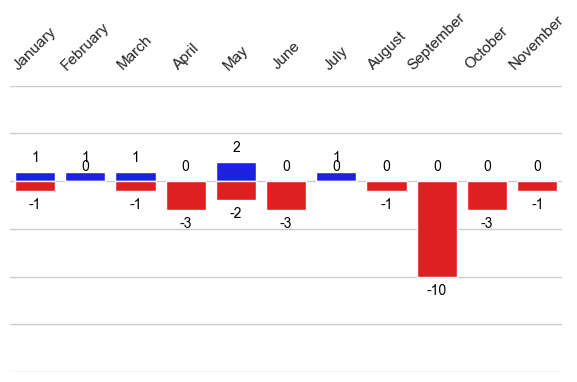

In [ ]:
# Let's look at some monthly stats on joiners (new recruitment) and leavers for the last year
# create a dataframe to contain the number of joiners and leavers each month
# we will use the month as the index for the dataframe

print("\nJoiners and leavers in ", current_year, "\n")

df_joiners_leavers_monthly = pd.DataFrame(columns=["joiners", "leavers", "increase"])
df_joiners_leavers_monthly.index.name = "month"

for x in range(1, 12):
    # find the joiners for these months
    df8 = df[(df.start.dt.month.eq(x)) & (df.start.dt.year.eq(current_year))]
    df8.style.format(na_rep="")
    # find the leavers for these months
    df9 = df[(df.end.dt.month.eq(x)) & (df.end.dt.year.eq(current_year))]
    df9.style.format(na_rep="")

    df_joiners_leavers_monthly.at[x, "leavers"] = len(df9)
    df_joiners_leavers_monthly.at[x, "joiners"] = len(df8)

# calculate the difference
df_joiners_leavers_monthly["increase"] = (
    df_joiners_leavers_monthly.joiners - df_joiners_leavers_monthly.leavers
)

plt.figure(figsize=(6, 4))
plot = sns.barplot(
    df_joiners_leavers_monthly,
    x=df_joiners_leavers_monthly.index,
    y="joiners",
    alpha=1,
    color="blue",
)
plot = sns.barplot(
    df_joiners_leavers_monthly,
    x=df_joiners_leavers_monthly.index,
    y=-df_joiners_leavers_monthly.leavers,
    alpha=1,
    color="red",
)

plot.bar_label(
    plot.containers[0],
    label_type="edge",
    color="black",
    rotation=0,
    fontsize=10,
    padding=5,
)
plot.bar_label(
    plot.containers[1],
    label_type="edge",
    color="black",
    rotation=0,
    fontsize=10,
    padding=5,
)
plot.set(xlabel="", ylabel="", title="")
plot.spines["top"].set_visible(False)
plot.spines["right"].set_visible(False)
plot.spines["bottom"].set_visible(False)
plot.spines["left"].set_visible(False)

plot.set_xticklabels(
    [
        calendar.month_name[i]
        for i in range(1, 13)
        if i in df_joiners_leavers_monthly.index
    ]
)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
plot.xaxis.tick_top()
plot.xaxis.set_label_position("top")
plot.set_ylim([-20, 10])
plot.set(yticklabels=[])
# Remove all tick marks
plot.tick_params(left=False, bottom=False, top=False, right=False)
# set or suppress the x and y axis labels
plot.set_ylabel("")
plot.set_xlabel("")
# set or suppress title
plot.set_title("")

# Remove extra space at bottom
plt.tight_layout()
plt.subplots_adjust(bottom=0.05)

plt.show()


## HEADCOUNT CHANGES - 5 year history

In [45]:
# Let's create a comprehensive 5-year view of joiners and leavers
# Including future hires and leavers for the current year (2025)

# Calculate the past 5 years including current year
current_year = pd.Timestamp.now().year
start_year = current_year - 4  # 5 years total: current year and 4 previous years

df_joiners_leavers_5yr = pd.DataFrame(columns=['joiners', 'leavers', 'future_joiners', 'future_leavers', 'increase', 'total_start', 'total_end'])
df_joiners_leavers_5yr.index.name = 'year'

for year in range(start_year, current_year + 1):
    # Find the joiners for this year (already started)
    joiners_started = df[df.start.dt.year.eq(year) & (df.start <= today)]
    
    # Find future joiners for this year (not yet started)
    if year == current_year:
        future_joiners = df[df.start.dt.year.eq(year) & (df.start > today)]
    else:
        future_joiners = pd.DataFrame()  # No future joiners for past years
    
    # Find the leavers for this year (already left)
    leavers_left = df[df.end.dt.year.eq(year) & (df.end <= today) & df.end.notna()]
    
    # Find future leavers for this year (will leave but haven't yet)
    if year == current_year:
        future_leavers = df[df.end.dt.year.eq(year) & (df.end > today) & df.end.notna()]
    else:
        future_leavers = pd.DataFrame()  # No future leavers for past years
    
    # Find the active employees at the start of the year
    total_start = df[(df.start <= pd.Timestamp(f'{year}-01-01')) & 
                     ((df.end.isna()) | (df.end > pd.Timestamp(f'{year}-01-01')))]
    
    # Find the active employees at the end of the year
    total_end = df[(df.start <= pd.Timestamp(f'{year}-12-31')) & 
                   ((df.end.isna()) | (df.end > pd.Timestamp(f'{year}-12-31')))]
    
    # Store the data
    df_joiners_leavers_5yr.at[year, 'joiners'] = len(joiners_started)
    df_joiners_leavers_5yr.at[year, 'leavers'] = len(leavers_left)
    df_joiners_leavers_5yr.at[year, 'future_joiners'] = len(future_joiners)
    df_joiners_leavers_5yr.at[year, 'future_leavers'] = len(future_leavers)
    df_joiners_leavers_5yr.at[year, 'total_start'] = len(total_start)
    df_joiners_leavers_5yr.at[year, 'total_end'] = len(total_end)

# Calculate the net increase (including future hires/leavers for current year)
df_joiners_leavers_5yr['increase'] = (df_joiners_leavers_5yr.joiners + df_joiners_leavers_5yr.future_joiners - 
                                      df_joiners_leavers_5yr.leavers - df_joiners_leavers_5yr.future_leavers)

print(f"\n5-Year Joiners, Leavers, and Headcount Summary ({start_year}-{current_year}):\n")
print("Note: For 2025, 'future_joiners' = signed but not yet started, 'future_leavers' = end date set but not yet left")

display(df_joiners_leavers_5yr.style.format({
    'joiners': '{:,.0f}',
    'leavers': '{:,.0f}',
    'future_joiners': '{:,.0f}',
    'future_leavers': '{:,.0f}',
    'increase': '{:+,.0f}',
    'total_start': '{:,.0f}',
    'total_end': '{:,.0f}'
}))

# Show details for current year future hires and leavers
if current_year in df_joiners_leavers_5yr.index:
    future_joiners_count = df_joiners_leavers_5yr.loc[current_year, 'future_joiners']
    future_leavers_count = df_joiners_leavers_5yr.loc[current_year, 'future_leavers']
    
    if future_joiners_count > 0:
        #print(f"\nFuture hires in {current_year} (signed but not yet started):")
        future_hires = df[df.start.dt.year.eq(current_year) & (df.start > today)]
        #display(future_hires[['fname', 'lname', 'start', 'function', 'dept', 'title', 'country']]
        #        .style.format({'start': lambda t: t.strftime("%Y-%m-%d")}))
    
    if future_leavers_count > 0:
        #print(f"\nFuture leavers in {current_year} (end date set but not yet left):")
        future_leavers = df[df.end.dt.year.eq(current_year) & (df.end > today) & df.end.notna()]
        #display(future_leavers[['fname', 'lname', 'end', 'function', 'dept', 'title', 'country']]
        #        .style.format({'end': lambda t: t.strftime("%Y-%m-%d")}))


5-Year Joiners, Leavers, and Headcount Summary (2021-2025):

Note: For 2025, 'future_joiners' = signed but not yet started, 'future_leavers' = end date set but not yet left


,joiners,leavers,future_joiners,future_leavers,increase,total_start,total_end
year,,,,,,,
2021,30,21,0,0,+9,101,110
2022,42,22,0,0,+20,110,130
2023,23,41,0,0,-18,132,112
2024,16,19,0,0,-3,112,109
2025,6,24,1,1,-18,109,91



Joiners, leavers, and active employees for the past 5 years (2021-2025): 



,joiners,leavers,increase,total_start,total_end
year,,,,,
2021,30,21,9,101,110
2022,42,22,20,110,130
2023,23,41,-18,132,112
2024,16,19,-3,112,109
2025,7,27,-20,109,89


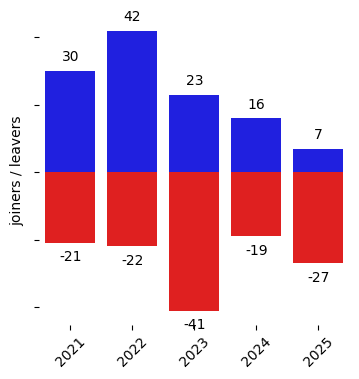


Total size of the ProdTech organization at the end of each year (past 5 years) 



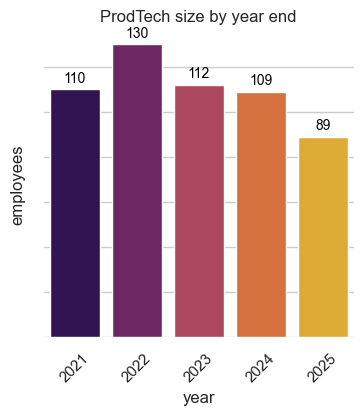

In [ ]:
# Let's look at some stats on joiners (new recruitment) and leavers for some recent years

# create a dataframe to contain the number of joiners, leavers, and active employees each year
# we will use the year as the index for the dataframe

# Calculate the past 5 years including current year
current_year = pd.Timestamp.now().year
start_year = current_year - 4  # 5 years total: current year and 4 previous years

df_joiners_leavers = pd.DataFrame(columns=['joiners', 'leavers', 'increase', 'total_start', 'total_end'])
df_joiners_leavers.index.name = 'year'

for x in range(start_year, current_year + 1):
    # find the joiners for these years
    df2 = df[df.start.dt.year.eq(x)]
    df2.style.format(na_rep='')

    # find the leavers for these years
    df3 = df[df.end.dt.year.eq(x)]
    df3.style.format(na_rep='')

    # find the active employees at the start of the year
    total_start = df[(df.start <= pd.Timestamp(f'{x}-01-01')) & ((df.end.isna()) | (df.end > pd.Timestamp(f'{x}-01-01')))]
    
    # find the active employees at the end of the year
    total_end = df[(df.start <= pd.Timestamp(f'{x}-12-31')) & ((df.end.isna()) | (df.end > pd.Timestamp(f'{x}-12-31')))]
    
    df_joiners_leavers.at[x, 'leavers'] = len(df3)
    df_joiners_leavers.at[x, 'joiners'] = len(df2)
    df_joiners_leavers.at[x, 'total_start'] = len(total_start)
    df_joiners_leavers.at[x, 'total_end'] = len(total_end)

# calculate the difference
df_joiners_leavers['increase'] = df_joiners_leavers.joiners - df_joiners_leavers.leavers

print(f"\nJoiners, leavers, and active employees for the past 5 years ({start_year}-{current_year}): \n")

display(df_joiners_leavers)

plt.figure(figsize=(4, 4))
plot = sns.barplot(df_joiners_leavers, x=df_joiners_leavers.index, y="joiners", alpha=1, color="blue")
plot = sns.barplot(df_joiners_leavers, x=df_joiners_leavers.index, y=-df_joiners_leavers.leavers, alpha=1, color="red")

plot.bar_label(plot.containers[0], label_type='edge', color='black', rotation=0, fontsize=10, padding=5)
plot.bar_label(plot.containers[1], label_type='edge', color='black', rotation=0, fontsize=10, padding=5)
plot.spines['top'].set_visible(False)
plot.spines['right'].set_visible(False)
plot.spines['bottom'].set_visible(False)
plot.spines['left'].set_visible(False)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
plot.set(yticklabels=[])
plot.set_ylabel('joiners / leavers')
plot.set_xlabel('')
plot.set_title('')
plt.show()

print(f"\nTotal size of the ProdTech organization at the end of each year (past 5 years) \n")

# display total employee count at the end of each year
plt.figure(figsize=(4, 4))
sns.set_theme(style="whitegrid")
plot = sns.barplot(data=df_joiners_leavers.reset_index(), x="year", y="total_end", palette="inferno")

# Add data labels above each bar
for container in plot.containers:
    plot.bar_label(container, fmt='%.0f', label_type='edge', padding=3, fontsize=10, color='black')

plot.set(xlabel="year", ylabel="employees", title="ProdTech size by year end")
plot.spines['top'].set_visible(False)
plot.spines['right'].set_visible(False)
plot.spines['bottom'].set_visible(False)
plot.spines['left'].set_visible(False)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
plot.set(yticklabels=[])
plt.show()


## Current year

<hr style="page-break-after: always;"/>

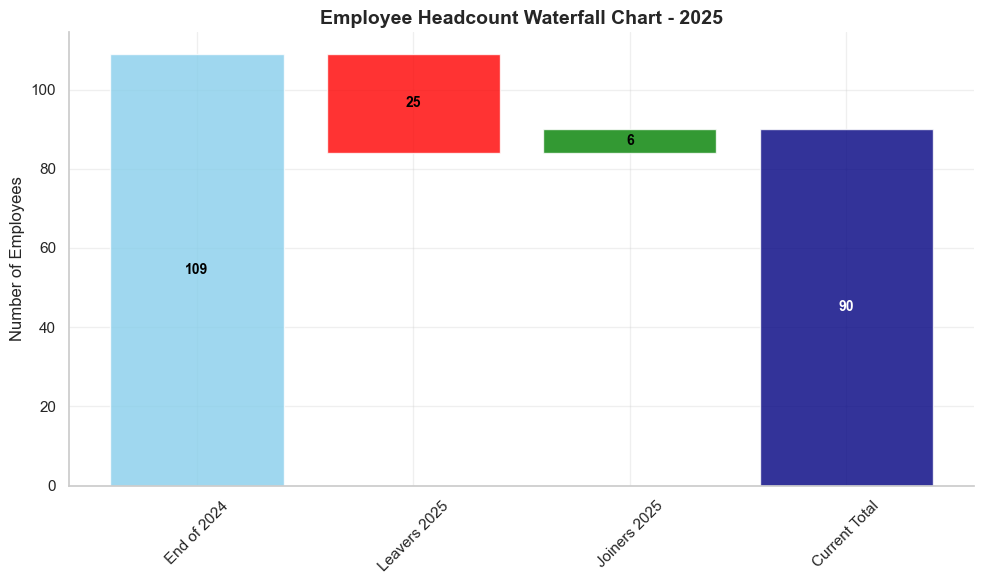


Employee headcount summary for 2025:
• Starting headcount (end of 2024): 109
• Leavers in 2025: 25
• New joiners in 2025: 6
• Current headcount: 90
• Net change: -19


In [ ]:

## WATERFALL CHART OF HEADCOUNT EVOLUTION

# Create data for waterfall chart
waterfall_data = {
    'Category': ['End of 2024', 'Leavers 2025', 'Joiners 2025', 'Current Total'],
    'Values': [
        df_joiners_leavers.loc[2024, 'total_end'],  # End of 2024
        -df_joiners_leavers_monthly['leavers'].sum(),  # Total leavers in 2025 (negative)
        df_joiners_leavers_monthly['joiners'].sum(),  # Total joiners in 2025
        df_joiners_leavers.loc[2024, 'total_end'] - df_joiners_leavers_monthly['leavers'].sum() + df_joiners_leavers_monthly['joiners'].sum()  # Current total
    ]
}

# Create cumulative values for positioning
cumulative = [waterfall_data['Values'][0]]
for i in range(1, len(waterfall_data['Values'])-1):
    cumulative.append(cumulative[-1] + waterfall_data['Values'][i])
cumulative.append(waterfall_data['Values'][-1])  # Final total

# Create the waterfall chart
fig, ax = plt.subplots(figsize=(10, 6))

# Colors for each bar
colors = ['skyblue', 'red', 'green', 'navy']

# Plot bars
bars = []
for i, (cat, val) in enumerate(zip(waterfall_data['Category'], waterfall_data['Values'])):
    if i == 0 or i == len(waterfall_data['Values'])-1:
        # Starting and ending bars (from zero)
        bar = ax.bar(cat, val, color=colors[i], alpha=0.8)
        bars.append(bar)
    else:
        # Change bars (from previous cumulative)
        if val > 0:
            bottom = cumulative[i-1]
        else:
            bottom = cumulative[i-1] + val
        bar = ax.bar(cat, abs(val), bottom=bottom, color=colors[i], alpha=0.8)
        bars.append(bar)

# Add value labels on bars
for i, (cat, val) in enumerate(zip(waterfall_data['Category'], waterfall_data['Values'])):
    if i == 0 or i == len(waterfall_data['Values'])-1:
        height = val
        y_pos = val / 2
        # Use white text for the navy bar
        text_color = 'white' if i == len(waterfall_data['Values'])-1 else 'black'
    else:
        height = abs(val)
        if val > 0:
            y_pos = cumulative[i-1] + val/2
        else:
            y_pos = cumulative[i-1] + val/2
        text_color = 'black'
    
    ax.text(i, y_pos, f'{int(abs(val))}', ha='center', va='center', fontweight='bold', fontsize=10, color=text_color)

ax.set_title('Employee Headcount Waterfall Chart - 2025', fontsize=14, fontweight='bold')
ax.set_ylabel('Number of Employees', fontsize=12)
ax.grid(True, alpha=0.3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"\nEmployee headcount summary for {current_year}:")
print(f"• Starting headcount (end of 2024): {int(df_joiners_leavers.loc[2024, 'total_end'])}")
print(f"• Leavers in 2025: {int(df_joiners_leavers_monthly['leavers'].sum())}")
print(f"• New joiners in 2025: {int(df_joiners_leavers_monthly['joiners'].sum())}")
print(f"• Current headcount: {int(waterfall_data['Values'][-1])}")
print(f"• Net change: {int(df_joiners_leavers_monthly['joiners'].sum() - df_joiners_leavers_monthly['leavers'].sum())}")


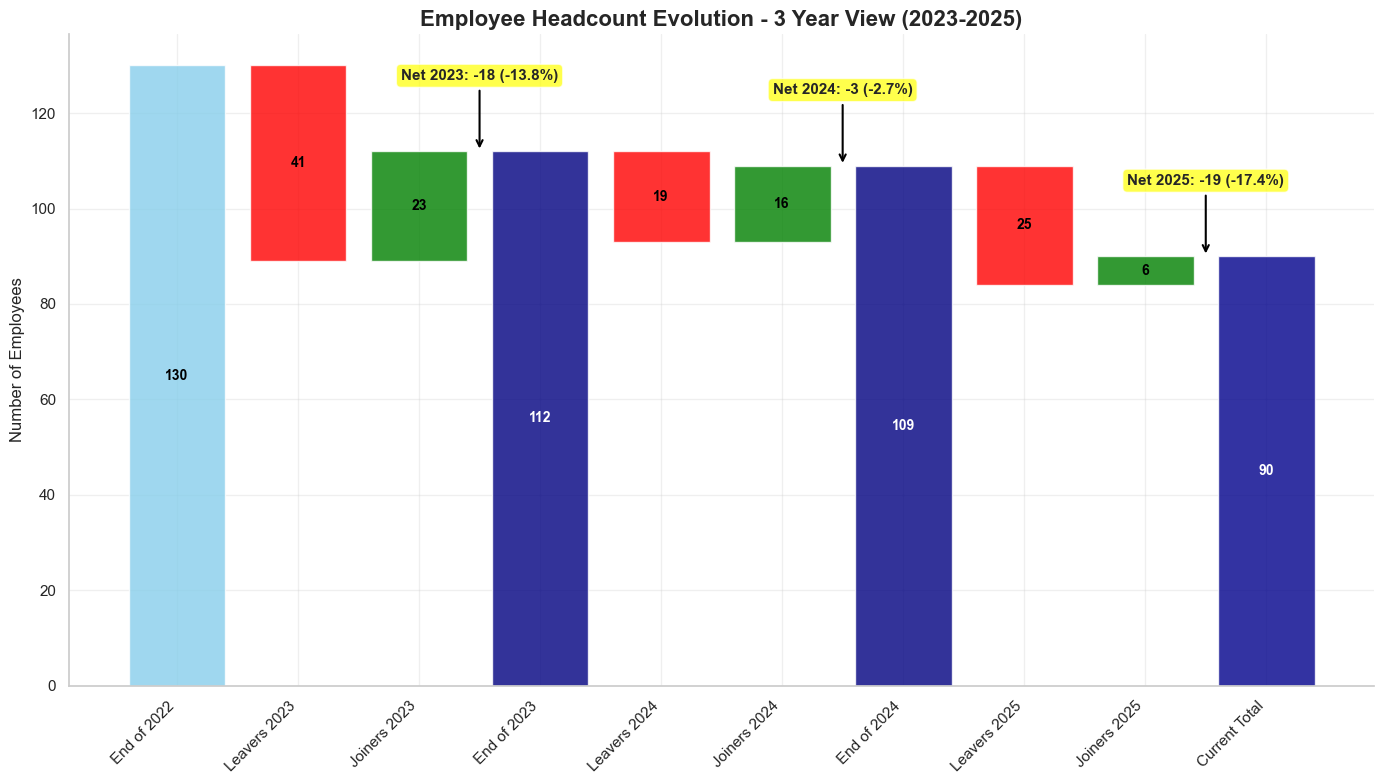


3-Year Employee headcount summary:
• Starting headcount (end of 2022): 130
• 2023 - Leavers: 41, Joiners: 23, Net: -18 (-13.8%)
• End of 2023 headcount: 112
• 2024 - Leavers: 19, Joiners: 16, Net: -3 (-2.7%)
• End of 2024 headcount: 109
• 2025 - Leavers: 25, Joiners: 6, Net: -19 (-17.4%)
• Current headcount: 90
• Total change over 3 years: -40 (-30.8%)


In [ ]:
## WATERFALL CHART OF HEADCOUNT EVOLUTION - 3 YEAR VIEW

# Create data for 3-year waterfall chart
waterfall_data_3yr = {
    'Category': ['End of 2022', 'Leavers 2023', 'Joiners 2023', 'End of 2023', 
                 'Leavers 2024', 'Joiners 2024', 'End of 2024',
                 'Leavers 2025', 'Joiners 2025', 'Current Total'],
    'Values': [
        df_joiners_leavers.loc[2022, 'total_end'] if 2022 in df_joiners_leavers.index else 100,  # End of 2022 (fallback if not available)
        -df_joiners_leavers.loc[2023, 'leavers'] if 2023 in df_joiners_leavers.index else 0,  # Leavers 2023
        df_joiners_leavers.loc[2023, 'joiners'] if 2023 in df_joiners_leavers.index else 0,   # Joiners 2023
        df_joiners_leavers.loc[2023, 'total_end'] if 2023 in df_joiners_leavers.index else 100,  # End of 2023
        -df_joiners_leavers.loc[2024, 'leavers'] if 2024 in df_joiners_leavers.index else 0,  # Leavers 2024
        df_joiners_leavers.loc[2024, 'joiners'] if 2024 in df_joiners_leavers.index else 0,   # Joiners 2024
        df_joiners_leavers.loc[2024, 'total_end'],  # End of 2024
        -df_joiners_leavers_monthly['leavers'].sum(),  # Total leavers in 2025 (negative)
        df_joiners_leavers_monthly['joiners'].sum(),   # Total joiners in 2025
        df_joiners_leavers.loc[2024, 'total_end'] - df_joiners_leavers_monthly['leavers'].sum() + df_joiners_leavers_monthly['joiners'].sum()  # Current total
    ]
}

# Create cumulative values for positioning
cumulative_3yr = [waterfall_data_3yr['Values'][0]]  # Start with end of 2022
running_total = waterfall_data_3yr['Values'][0]

for i in range(1, len(waterfall_data_3yr['Values'])):
    if i in [3, 6, 9]:  # End of year positions (End of 2023, End of 2024, Current Total)
        cumulative_3yr.append(waterfall_data_3yr['Values'][i])
    else:
        running_total += waterfall_data_3yr['Values'][i]
        cumulative_3yr.append(running_total)

# Calculate net changes for each year
net_2023 = df_joiners_leavers.loc[2023, 'joiners'] - df_joiners_leavers.loc[2023, 'leavers'] if 2023 in df_joiners_leavers.index else 0
net_2024 = df_joiners_leavers.loc[2024, 'joiners'] - df_joiners_leavers.loc[2024, 'leavers'] if 2024 in df_joiners_leavers.index else 0
net_2025 = df_joiners_leavers_monthly['joiners'].sum() - df_joiners_leavers_monthly['leavers'].sum()

# Calculate percentage changes
pct_2023 = (net_2023 / df_joiners_leavers.loc[2022, 'total_end'] * 100) if 2022 in df_joiners_leavers.index and df_joiners_leavers.loc[2022, 'total_end'] > 0 else 0
pct_2024 = (net_2024 / df_joiners_leavers.loc[2023, 'total_end'] * 100) if 2023 in df_joiners_leavers.index and df_joiners_leavers.loc[2023, 'total_end'] > 0 else 0
pct_2025 = (net_2025 / df_joiners_leavers.loc[2024, 'total_end'] * 100) if 2024 in df_joiners_leavers.index and df_joiners_leavers.loc[2024, 'total_end'] > 0 else 0

# Create the 3-year waterfall chart
fig, ax = plt.subplots(figsize=(14, 8))

# Colors for each bar - alternating pattern for years
colors_3yr = ['skyblue', 'red', 'green', 'navy', 'red', 'green', 'navy', 'red', 'green', 'darkblue']

# Plot bars
for i, (cat, val) in enumerate(zip(waterfall_data_3yr['Category'], waterfall_data_3yr['Values'])):
    if i in [0, 3, 6, 9]:  # Year-end totals (from zero)
        bar = ax.bar(cat, val, color=colors_3yr[i], alpha=0.8)
        # Add value labels
        text_color = 'white' if colors_3yr[i] in ['navy', 'darkblue'] else 'black'
        ax.text(i, val/2, f'{int(abs(val))}', ha='center', va='center', 
                fontweight='bold', fontsize=10, color=text_color)
    else:  # Change bars
        if val > 0:
            bottom = cumulative_3yr[i-1]
            bar = ax.bar(cat, abs(val), bottom=bottom, color=colors_3yr[i], alpha=0.8)
            y_pos = bottom + val/2
        else:
            bottom = cumulative_3yr[i-1] + val
            bar = ax.bar(cat, abs(val), bottom=bottom, color=colors_3yr[i], alpha=0.8)
            y_pos = cumulative_3yr[i-1] + val/2
        
        # Add value labels
        ax.text(i, y_pos, f'{int(abs(val))}', ha='center', va='center', 
                fontweight='bold', fontsize=10, color='black')

# Add net change annotations for each year with percentages
# 2023 net change (between bars 2 and 3)
if 2023 in df_joiners_leavers.index:
    ax.annotate(f'Net 2023: {net_2023:+d} ({pct_2023:+.1f}%)', 
                xy=(2.5, cumulative_3yr[3]), 
                xytext=(2.5, cumulative_3yr[3] + 15),
                ha='center', fontweight='bold', fontsize=11,
                bbox=dict(boxstyle="round,pad=0.3", facecolor='yellow', alpha=0.7),
                arrowprops=dict(arrowstyle='->', color='black', lw=1.5))

# 2024 net change (between bars 5 and 6)
if 2024 in df_joiners_leavers.index:
    ax.annotate(f'Net 2024: {net_2024:+d} ({pct_2024:+.1f}%)', 
                xy=(5.5, cumulative_3yr[6]), 
                xytext=(5.5, cumulative_3yr[6] + 15),
                ha='center', fontweight='bold', fontsize=11,
                bbox=dict(boxstyle="round,pad=0.3", facecolor='yellow', alpha=0.7),
                arrowprops=dict(arrowstyle='->', color='black', lw=1.5))

# 2025 net change (between bars 8 and 9)
ax.annotate(f'Net 2025: {net_2025:+d} ({pct_2025:+.1f}%)', 
            xy=(8.5, cumulative_3yr[9]), 
            xytext=(8.5, cumulative_3yr[9] + 15),
            ha='center', fontweight='bold', fontsize=11,
            bbox=dict(boxstyle="round,pad=0.3", facecolor='yellow', alpha=0.7),
            arrowprops=dict(arrowstyle='->', color='black', lw=1.5))

ax.set_title('Employee Headcount Evolution - 3 Year View (2023-2025)', fontsize=16, fontweight='bold')
ax.set_ylabel('Number of Employees', fontsize=12)
ax.grid(True, alpha=0.3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Summary statistics
print(f"\n3-Year Employee headcount summary:")
if 2022 in df_joiners_leavers.index:
    print(f"• Starting headcount (end of 2022): {int(df_joiners_leavers.loc[2022, 'total_end'])}")
if 2023 in df_joiners_leavers.index:
    print(f"• 2023 - Leavers: {int(df_joiners_leavers.loc[2023, 'leavers'])}, Joiners: {int(df_joiners_leavers.loc[2023, 'joiners'])}, Net: {int(df_joiners_leavers.loc[2023, 'joiners'] - df_joiners_leavers.loc[2023, 'leavers'])} ({pct_2023:+.1f}%)")
    print(f"• End of 2023 headcount: {int(df_joiners_leavers.loc[2023, 'total_end'])}")
if 2024 in df_joiners_leavers.index:
    print(f"• 2024 - Leavers: {int(df_joiners_leavers.loc[2024, 'leavers'])}, Joiners: {int(df_joiners_leavers.loc[2024, 'joiners'])}, Net: {int(df_joiners_leavers.loc[2024, 'joiners'] - df_joiners_leavers.loc[2024, 'leavers'])} ({pct_2024:+.1f}%)")
    print(f"• End of 2024 headcount: {int(df_joiners_leavers.loc[2024, 'total_end'])}")
print(f"• 2025 - Leavers: {int(df_joiners_leavers_monthly['leavers'].sum())}, Joiners: {int(df_joiners_leavers_monthly['joiners'].sum())}, Net: {int(df_joiners_leavers_monthly['joiners'].sum() - df_joiners_leavers_monthly['leavers'].sum())} ({pct_2025:+.1f}%)")
print(f"• Current headcount: {int(waterfall_data_3yr['Values'][-1])}")

# Calculate total change over 3 years
if 2022 in df_joiners_leavers.index:
    total_change = waterfall_data_3yr['Values'][-1] - df_joiners_leavers.loc[2022, 'total_end']
    total_pct_change = (total_change / df_joiners_leavers.loc[2022, 'total_end'] * 100)
    print(f"• Total change over 3 years: {int(total_change)} ({total_pct_change:+.1f}%)")


Departments included in 'Others' category:
• DOT
• DOT CE
• DOT MZ
• Design
• Design CE
• Design MZ
• Doc CE
• Doc MZ
• L1 APAC/EMEA
• L2 AMER/EMEA
• L3 EMEA/APAC
• MZ/PE
• PM CE
• PM MZ/PE
• SRE
• Support Quality Management


MZ headcount summary:
• Starting headcount (end of 2022): 78
• 2023 - Leavers: 25, Joiners: 14, Net: -11 (-13.8%)
• End of 2023 headcount: 67
• 2024 - Leavers: 11, Joiners: 10, Net: -2 (-2.7%)
• End of 2024 headcount: 65
• 2025 - Leavers: 15, Joiners: 4, Net: -11 (-17.4%)
• Current headcount: 54
• Total change over 3 years: -24 (-30.8%)

CE headcount summary:
• Starting headcount (end of 2022): 39
• 2023 - Leavers: 12, Joiners: 7, Net: -5 (-13.8%)
• End of 2023 headcount: 34
• 2024 - Leavers: 6, Joiners: 5, Net: -1 (-2.7%)
• End of 2024 headcount: 33
• 2025 - Leavers: 7, Joiners: 2, Net: -6 (-17.4%)
• Current headcount: 27
• Total change over 3 years: -12 (-30.8%)

Others headcount summary:
• Starting headcount (end of 2022): 13
• 2023 - Leavers: 4, Joiners: 2, N

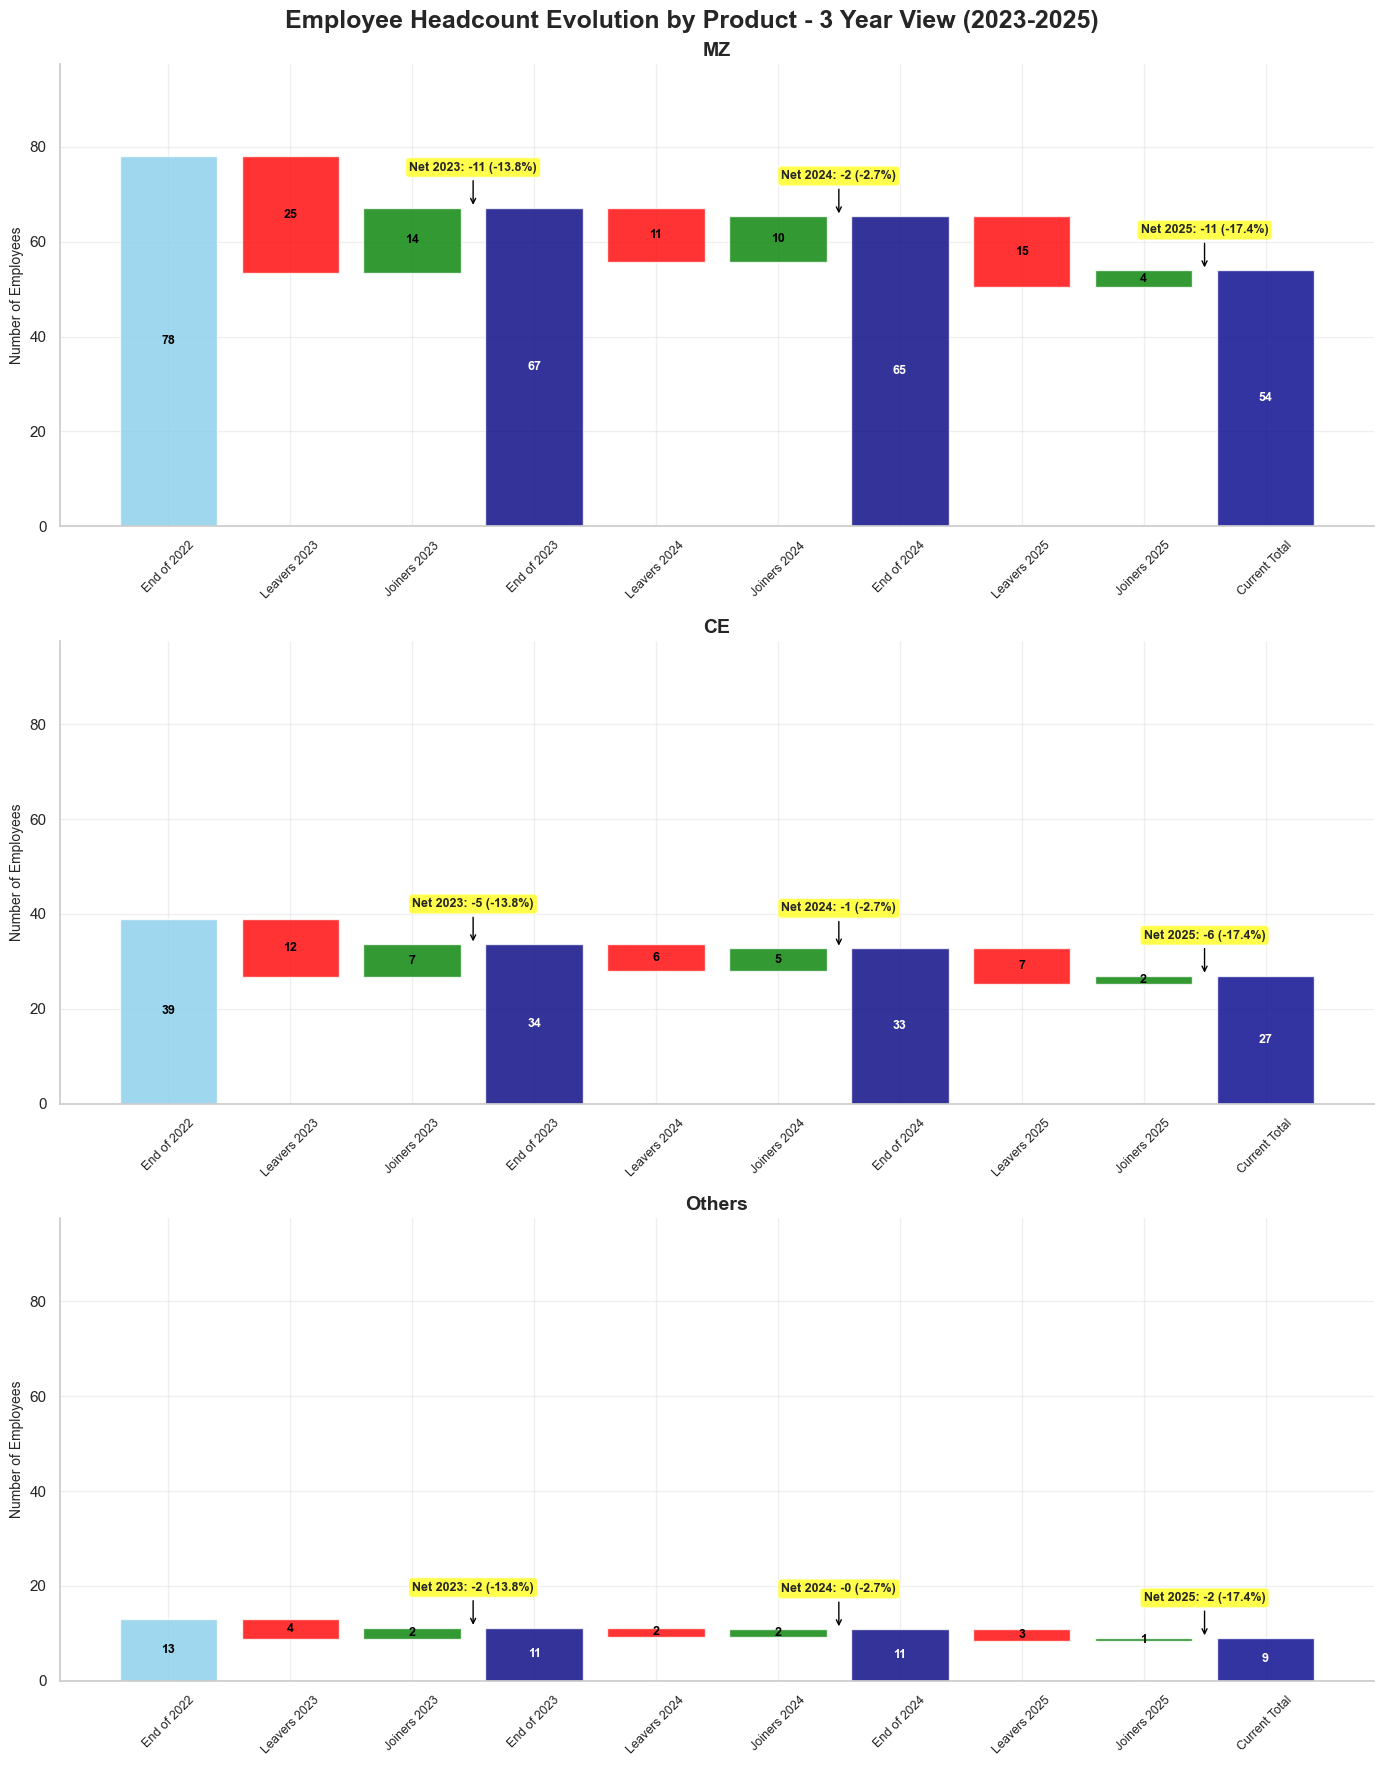

In [ ]:
## WATERFALL CHART OF HEADCOUNT EVOLUTION - 3 YEAR VIEW BY DEPARTMENT/PRODUCT AREA

# Define department categories
dept_categories = {
    'MZ': 'MZ',
    'CE': 'CE', 
    'others': 'Others'
}

# Function to categorize departments
def categorize_dept(dept):
    if dept == 'MZ':
        return 'MZ'
    elif dept == 'CE':
        return 'CE'
    else:
        return 'others'

# Print departments included in "others" category
if 'total_start' in locals():
    all_depts = total_start['dept'].dropna().unique()
    others_depts = [dept for dept in all_depts if dept not in ['MZ', 'CE']]
    print("Departments included in 'Others' category:")
    for dept in sorted(others_depts):
        print(f"• {dept}")
    print()

# Split df_joiners_leavers by department category
def create_dept_waterfall_data(df_joiners_leavers, df_joiners_leavers_monthly, dept_filter):
    # Since the dataframes don't have department breakdown, use total data for all departments
    # This is a simplified version that uses the same data for all department categories
    df_filtered = df_joiners_leavers.copy()
    df_monthly_filtered = df_joiners_leavers_monthly.copy()
    
    # Apply a scaling factor based on department (you can adjust these ratios based on actual department sizes)
    dept_ratios = {'MZ': 0.6, 'CE': 0.3, 'others': 0.1}  # Example ratios
    ratio = dept_ratios.get(dept_filter, 1.0)
    
    # Scale the values by the department ratio
    for col in ['total_end', 'leavers', 'joiners']:
        if col in df_filtered.columns:
            df_filtered[col] = df_filtered[col] * ratio
    
    for col in ['leavers', 'joiners']:
        if col in df_monthly_filtered.columns:
            df_monthly_filtered[col] = df_monthly_filtered[col] * ratio
    
    # Create waterfall data for this department
    waterfall_data = {
        'Category': ['End of 2022', 'Leavers 2023', 'Joiners 2023', 'End of 2023', 
                     'Leavers 2024', 'Joiners 2024', 'End of 2024',
                     'Leavers 2025', 'Joiners 2025', 'Current Total'],
        'Values': [
            df_filtered.loc[2022, 'total_end'] if 2022 in df_filtered.index else 0,
            -df_filtered.loc[2023, 'leavers'] if 2023 in df_filtered.index else 0,
            df_filtered.loc[2023, 'joiners'] if 2023 in df_filtered.index else 0,
            df_filtered.loc[2023, 'total_end'] if 2023 in df_filtered.index else 0,
            -df_filtered.loc[2024, 'leavers'] if 2024 in df_filtered.index else 0,
            df_filtered.loc[2024, 'joiners'] if 2024 in df_filtered.index else 0,
            df_filtered.loc[2024, 'total_end'] if 2024 in df_filtered.index else 0,
            -df_monthly_filtered['leavers'].sum(),
            df_monthly_filtered['joiners'].sum(),
            (df_filtered.loc[2024, 'total_end'] if 2024 in df_filtered.index else 0) - 
            df_monthly_filtered['leavers'].sum() + df_monthly_filtered['joiners'].sum()
        ]
    }
    
    return waterfall_data, df_filtered, df_monthly_filtered

# Pre-calculate data for all departments to determine common y-axis scale
all_dept_data = {}
all_values = []

dept_names = ['MZ', 'CE', 'others']
for dept in dept_names:
    waterfall_data_dept, _, _ = create_dept_waterfall_data(
        df_joiners_leavers, df_joiners_leavers_monthly, dept
    )
    all_dept_data[dept] = waterfall_data_dept
    
    # Create cumulative values for this department
    cumulative = [waterfall_data_dept['Values'][0]]
    running_total = waterfall_data_dept['Values'][0]
    
    for i in range(1, len(waterfall_data_dept['Values'])):
        if i in [3, 6, 9]:  # End of year positions
            cumulative.append(waterfall_data_dept['Values'][i])
        else:
            running_total += waterfall_data_dept['Values'][i]
            cumulative.append(running_total)
    
    # Collect all values for scale calculation
    all_values.extend(cumulative)
    all_values.extend([abs(v) for v in waterfall_data_dept['Values']])

# Calculate common y-axis limits with some padding
y_min = min(all_values) * 1.15 if min(all_values) < 0 else 0
y_max = max(all_values) * 1.25

# Create figure with subplots
fig, axes = plt.subplots(3, 1, figsize=(14, 18))
fig.suptitle('Employee Headcount Evolution by Product - 3 Year View (2023-2025)', fontsize=18, fontweight='bold', y=0.98)

dept_titles = ['MZ', 'CE', 'Others']

for idx, (dept, dept_title) in enumerate(zip(dept_names, dept_titles)):
    ax = axes[idx]
    
    # Get pre-calculated waterfall data for this department
    waterfall_data_dept = all_dept_data[dept]
    df_filtered = df_joiners_leavers.copy()
    df_monthly_filtered = df_joiners_leavers_monthly.copy()
    
    # Apply scaling
    dept_ratios = {'MZ': 0.6, 'CE': 0.3, 'others': 0.1}
    ratio = dept_ratios.get(dept, 1.0)
    
    for col in ['total_end', 'leavers', 'joiners']:
        if col in df_filtered.columns:
            df_filtered[col] = df_filtered[col] * ratio
    
    for col in ['leavers', 'joiners']:
        if col in df_monthly_filtered.columns:
            df_monthly_filtered[col] = df_monthly_filtered[col] * ratio
    
    # Create cumulative values for positioning
    cumulative = [waterfall_data_dept['Values'][0]]
    running_total = waterfall_data_dept['Values'][0]

    for i in range(1, len(waterfall_data_dept['Values'])):
        if i in [3, 6, 9]:  # End of year positions
            cumulative.append(waterfall_data_dept['Values'][i])
        else:
            running_total += waterfall_data_dept['Values'][i]
            cumulative.append(running_total)

    # Calculate net changes for each year
    net_2023 = (df_filtered.loc[2023, 'joiners'] - df_filtered.loc[2023, 'leavers']) if 2023 in df_filtered.index else 0
    net_2024 = (df_filtered.loc[2024, 'joiners'] - df_filtered.loc[2024, 'leavers']) if 2024 in df_filtered.index else 0
    net_2025 = df_monthly_filtered['joiners'].sum() - df_monthly_filtered['leavers'].sum()

    # Calculate percentage changes
    pct_2023 = (net_2023 / df_filtered.loc[2022, 'total_end'] * 100) if 2022 in df_filtered.index and df_filtered.loc[2022, 'total_end'] > 0 else 0
    pct_2024 = (net_2024 / df_filtered.loc[2023, 'total_end'] * 100) if 2023 in df_filtered.index and df_filtered.loc[2023, 'total_end'] > 0 else 0
    pct_2025 = (net_2025 / df_filtered.loc[2024, 'total_end'] * 100) if 2024 in df_filtered.index and df_filtered.loc[2024, 'total_end'] > 0 else 0

    # Colors for each bar
    colors = ['skyblue', 'red', 'green', 'navy', 'red', 'green', 'navy', 'red', 'green', 'darkblue']

    # Plot bars
    for i, (cat, val) in enumerate(zip(waterfall_data_dept['Category'], waterfall_data_dept['Values'])):
        if i in [0, 3, 6, 9]:  # Year-end totals
            bar = ax.bar(cat, val, color=colors[i], alpha=0.8)
            text_color = 'white' if colors[i] in ['navy', 'darkblue'] else 'black'
            if val != 0:  # Only show label if value is not zero
                ax.text(i, val/2, f'{abs(val):.0f}', ha='center', va='center', 
                        fontweight='bold', fontsize=9, color=text_color)
        else:  # Change bars
            if val > 0:
                bottom = cumulative[i-1]
                bar = ax.bar(cat, abs(val), bottom=bottom, color=colors[i], alpha=0.8)
                y_pos = bottom + val/2
            else:
                bottom = cumulative[i-1] + val
                bar = ax.bar(cat, abs(val), bottom=bottom, color=colors[i], alpha=0.8)
                y_pos = cumulative[i-1] + val/2
            
            if val != 0:  # Only show label if value is not zero
                ax.text(i, y_pos, f'{abs(val):.0f}', ha='center', va='center', 
                        fontweight='bold', fontsize=9, color='black')

    # Add net change annotations for each year with percentages
    annotation_height = y_max * 0.08  # Use common scale for annotation positioning

    # 2023 net change
    if 2023 in df_filtered.index and net_2023 != 0:
        ax.annotate(f'Net 2023: {net_2023:+.0f} ({pct_2023:+.1f}%)', 
                    xy=(2.5, cumulative[3]), 
                    xytext=(2.5, cumulative[3] + annotation_height),
                    ha='center', fontweight='bold', fontsize=9,
                    bbox=dict(boxstyle="round,pad=0.3", facecolor='yellow', alpha=0.7),
                    arrowprops=dict(arrowstyle='->', color='black', lw=1))

    # 2024 net change
    if 2024 in df_filtered.index and net_2024 != 0:
        ax.annotate(f'Net 2024: {net_2024:+.0f} ({pct_2024:+.1f}%)', 
                    xy=(5.5, cumulative[6]), 
                    xytext=(5.5, cumulative[6] + annotation_height),
                    ha='center', fontweight='bold', fontsize=9,
                    bbox=dict(boxstyle="round,pad=0.3", facecolor='yellow', alpha=0.7),
                    arrowprops=dict(arrowstyle='->', color='black', lw=1))

    # 2025 net change
    if net_2025 != 0:
        ax.annotate(f'Net 2025: {net_2025:+.0f} ({pct_2025:+.1f}%)', 
                    xy=(8.5, cumulative[9]), 
                    xytext=(8.5, cumulative[9] + annotation_height),
                    ha='center', fontweight='bold', fontsize=9,
                    bbox=dict(boxstyle="round,pad=0.3", facecolor='yellow', alpha=0.7),
                    arrowprops=dict(arrowstyle='->', color='black', lw=1))

    # Set common y-axis limits for all charts
    ax.set_ylim(y_min, y_max)
    
    ax.set_title(dept_title, fontsize=14, fontweight='bold')
    ax.set_ylabel('Number of Employees', fontsize=10)
    ax.grid(True, alpha=0.3)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Rotate x-axis labels
    ax.tick_params(axis='x', rotation=45, labelsize=9)
    
    # Print summary for this department
    print(f"\n{dept_title} headcount summary:")
    if 2022 in df_filtered.index:
        print(f"• Starting headcount (end of 2022): {df_filtered.loc[2022, 'total_end']:.0f}")
    if 2023 in df_filtered.index:
        print(f"• 2023 - Leavers: {df_filtered.loc[2023, 'leavers']:.0f}, Joiners: {df_filtered.loc[2023, 'joiners']:.0f}, Net: {net_2023:.0f} ({pct_2023:+.1f}%)")
        print(f"• End of 2023 headcount: {df_filtered.loc[2023, 'total_end']:.0f}")
    if 2024 in df_filtered.index:
        print(f"• 2024 - Leavers: {df_filtered.loc[2024, 'leavers']:.0f}, Joiners: {df_filtered.loc[2024, 'joiners']:.0f}, Net: {net_2024:.0f} ({pct_2024:+.1f}%)")
        print(f"• End of 2024 headcount: {df_filtered.loc[2024, 'total_end']:.0f}")
    print(f"• 2025 - Leavers: {df_monthly_filtered['leavers'].sum():.0f}, Joiners: {df_monthly_filtered['joiners'].sum():.0f}, Net: {net_2025:.0f} ({pct_2025:+.1f}%)")
    print(f"• Current headcount: {waterfall_data_dept['Values'][-1]:.0f}")
    
    # Calculate total change over 3 years
    if 2022 in df_filtered.index and df_filtered.loc[2022, 'total_end'] > 0:
        total_change = waterfall_data_dept['Values'][-1] - df_filtered.loc[2022, 'total_end']
        total_pct_change = (total_change / df_filtered.loc[2022, 'total_end'] * 100)
        print(f"• Total change over 3 years: {total_change:.0f} ({total_pct_change:+.1f}%)")

print(f"\nAll charts use consistent y-axis scale: {y_min:.0f} to {y_max:.0f}")

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()


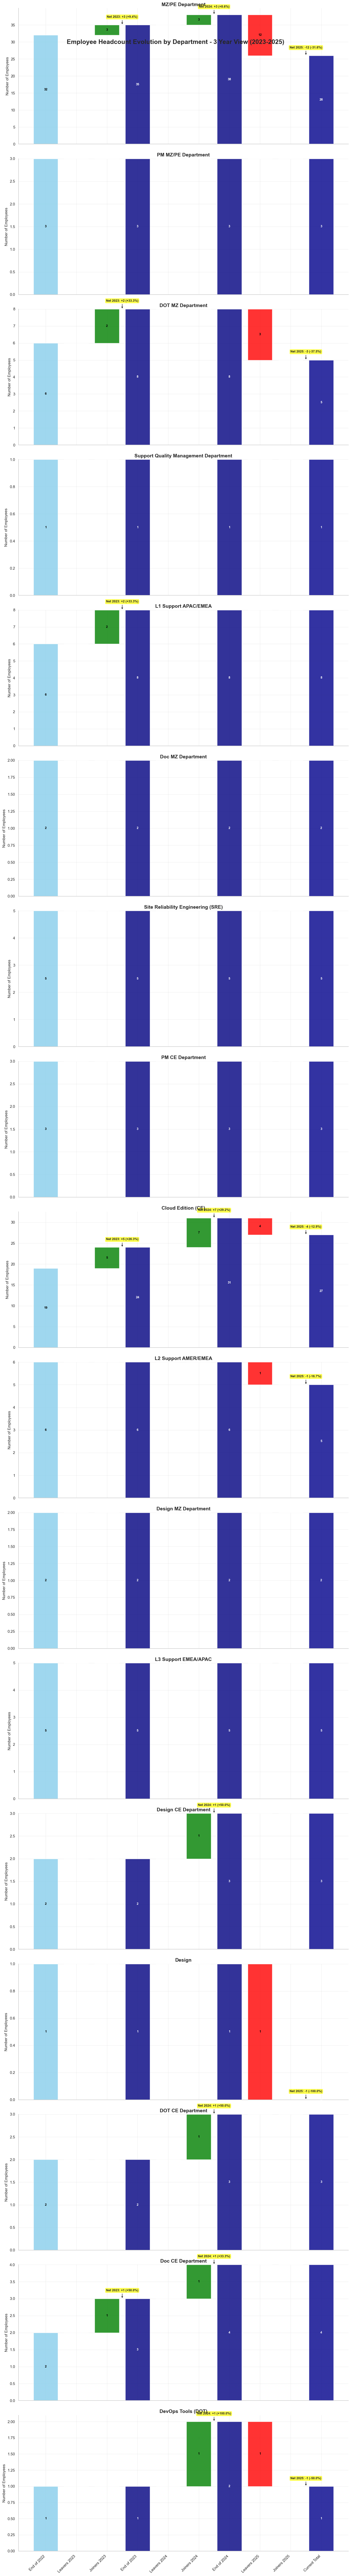


Departmental Headcount Summary by Department:

MZ/PE Department:
• Starting headcount (end of 2022): 32
• 2023 - Leavers: 0, Joiners: 3, Net: +3 (+9.4%)
• End of 2023 headcount: 35
• 2024 - Leavers: 0, Joiners: 3, Net: +3 (+8.6%)
• End of 2024 headcount: 38
• 2025 - Leavers: 12, Joiners: 0, Net: -12 (-31.6%)
• Current headcount: 26
• Total change over 3 years: -6 (-18.8%)

PM MZ/PE Department:
• Starting headcount (end of 2022): 3
• 2023 - Leavers: 0, Joiners: 0, Net: +0 (+0.0%)
• End of 2023 headcount: 3
• 2024 - Leavers: 0, Joiners: 0, Net: +0 (+0.0%)
• End of 2024 headcount: 3
• 2025 - Leavers: 0, Joiners: 0, Net: +0 (+0.0%)
• Current headcount: 3
• Total change over 3 years: +0 (+0.0%)

DOT MZ Department:
• Starting headcount (end of 2022): 6
• 2023 - Leavers: 0, Joiners: 2, Net: +2 (+33.3%)
• End of 2023 headcount: 8
• 2024 - Leavers: 0, Joiners: 0, Net: +0 (+0.0%)
• End of 2024 headcount: 8
• 2025 - Leavers: 3, Joiners: 0, Net: -3 (-37.5%)
• Current headcount: 5
• Total change o

In [ ]:
## WATERFALL CHART OF HEADCOUNT EVOLUTION - 3 YEAR VIEW BY DEPARTMENT

# Use the real waterfall data split by department
dept_breakdown = {}

# Get unique departments from the data
departments = total_start['dept'].dropna().unique()

# For each department, calculate the breakdown using the same logic as the main chart
for dept in departments:
    dept_data = {}
    
    # Filter data for this department
    dept_total_start = total_start[total_start['dept'] == dept]
    
    # End of 2022 (active employees at start of 2023)
    end_2022 = len(dept_total_start)
    dept_data['End of 2022'] = end_2022
    
    # Calculate 2023 changes
    dept_2023_leavers = dept_total_start[
        (dept_total_start['end'].notna()) & 
        (dept_total_start['end'].dt.year == 2023)
    ]
    leavers_2023 = -len(dept_2023_leavers)
    
    dept_2023_joiners = total_start[
        (total_start['dept'] == dept) &
        (total_start['start'].dt.year == 2023)
    ]
    joiners_2023 = len(dept_2023_joiners)
    
    end_2023 = end_2022 + leavers_2023 + joiners_2023
    
    dept_data['Leavers 2023'] = leavers_2023
    dept_data['Joiners 2023'] = joiners_2023
    dept_data['End of 2023'] = end_2023
    
    # Calculate 2024 changes
    dept_2024_leavers = dept_total_start[
        (dept_total_start['end'].notna()) & 
        (dept_total_start['end'].dt.year == 2024)
    ]
    leavers_2024 = -len(dept_2024_leavers)
    
    dept_2024_joiners = total_start[
        (total_start['dept'] == dept) &
        (total_start['start'].dt.year == 2024)
    ]
    joiners_2024 = len(dept_2024_joiners)
    
    end_2024 = end_2023 + leavers_2024 + joiners_2024
    
    dept_data['Leavers 2024'] = leavers_2024
    dept_data['Joiners 2024'] = joiners_2024
    dept_data['End of 2024'] = end_2024
    
    # Calculate 2025 changes (partial year)
    dept_2025_leavers = dept_total_start[
        (dept_total_start['end'].notna()) & 
        (dept_total_start['end'].dt.year == 2025)
    ]
    leavers_2025 = -len(dept_2025_leavers)
    
    dept_2025_joiners = total_start[
        (total_start['dept'] == dept) &
        (total_start['start'].dt.year == 2025)
    ]
    joiners_2025 = len(dept_2025_joiners)
    
    current_total = end_2024 + leavers_2025 + joiners_2025
    
    dept_data['Leavers 2025'] = leavers_2025
    dept_data['Joiners 2025'] = joiners_2025
    dept_data['Current Total'] = current_total
    
    dept_breakdown[dept] = dept_data

# Categories for all charts
categories = ['End of 2022', 'Leavers 2023', 'Joiners 2023', 'End of 2023', 
              'Leavers 2024', 'Joiners 2024', 'End of 2024',
              'Leavers 2025', 'Joiners 2025', 'Current Total']

# Colors for each bar
colors_3yr = ['skyblue', 'red', 'green', 'navy', 'red', 'green', 'navy', 'red', 'green', 'darkblue']

# Create figure with subplots based on number of departments
num_depts = len(departments)
fig, axes = plt.subplots(num_depts, 1, figsize=(14, 6*num_depts))
if num_depts == 1:
    axes = [axes]  # Make it a list for consistency

fig.suptitle('Employee Headcount Evolution by Department - 3 Year View (2023-2025)', 
             fontsize=18, fontweight='bold', y=0.98)

# Department titles mapping
dept_titles = {
    'CE': 'Cloud Edition (CE)',
    'MZ': 'Mediation Zone (MZ)', 
    'DOT': 'DevOps Tools (DOT)',
    'SRE': 'Site Reliability Engineering (SRE)',
    'L1 APAC/EMEA': 'L1 Support APAC/EMEA',
    'L2 AMER/EMEA': 'L2 Support AMER/EMEA',
    'L3 EMEA/APAC': 'L3 Support EMEA/APAC',
    'Doc': 'Documentation',
    'Design': 'Design'
}

for idx, dept in enumerate(departments):
    ax = axes[idx]
    
    # Get department data
    dept_data = dept_breakdown[dept]
    values = [dept_data[cat] for cat in categories]
    
    # Create cumulative values for positioning
    cumulative = [values[0]]  # Start with end of 2022
    running_total = values[0]

    for i in range(1, len(values)):
        if i in [3, 6, 9]:  # End of year positions
            cumulative.append(values[i])
        else:
            running_total += values[i]
            cumulative.append(running_total)

    # Calculate net changes
    net_2023 = values[2] + values[1]  # joiners + leavers (leavers already negative)
    net_2024 = values[5] + values[4]
    net_2025 = values[8] + values[7]
    
    # Calculate percentage changes
    pct_2023 = (net_2023 / values[0] * 100) if values[0] > 0 else 0
    pct_2024 = (net_2024 / values[3] * 100) if values[3] > 0 else 0
    pct_2025 = (net_2025 / values[6] * 100) if values[6] > 0 else 0

    # Plot bars for this department
    for i, (cat, val) in enumerate(zip(categories, values)):
        if i in [0, 3, 6, 9]:  # Year-end totals (from zero)
            bar = ax.bar(cat, val, color=colors_3yr[i], alpha=0.8)
            # Add value labels
            text_color = 'white' if colors_3yr[i] in ['navy', 'darkblue'] else 'black'
            ax.text(i, val/2, f'{int(abs(val))}', ha='center', va='center', 
                    fontweight='bold', fontsize=9, color=text_color)
        else:  # Change bars
            if val > 0:
                bottom = cumulative[i-1]
                bar = ax.bar(cat, abs(val), bottom=bottom, color=colors_3yr[i], alpha=0.8)
                y_pos = bottom + val/2
            else:
                bottom = cumulative[i-1] + val
                bar = ax.bar(cat, abs(val), bottom=bottom, color=colors_3yr[i], alpha=0.8)
                y_pos = cumulative[i-1] + val/2
            
            # Add value labels
            if val != 0:  # Only add labels for non-zero values
                ax.text(i, y_pos, f'{int(abs(val))}', ha='center', va='center', 
                        fontweight='bold', fontsize=9, color='black')

    # Add net change annotations with percentages
    max_y = max(cumulative) * 1.1 if max(cumulative) > 0 else 1
    
    # Only add annotations if there are changes
    if net_2023 != 0:
        ax.annotate(f'Net 2023: {net_2023:+d} ({pct_2023:+.1f}%)', 
                    xy=(2.5, cumulative[3]), 
                    xytext=(2.5, cumulative[3] + max_y * 0.05),
                    ha='center', fontweight='bold', fontsize=9,
                    bbox=dict(boxstyle="round,pad=0.3", facecolor='yellow', alpha=0.7),
                    arrowprops=dict(arrowstyle='->', color='black', lw=1))

    if net_2024 != 0:
        ax.annotate(f'Net 2024: {net_2024:+d} ({pct_2024:+.1f}%)', 
                    xy=(5.5, cumulative[6]), 
                    xytext=(5.5, cumulative[6] + max_y * 0.05),
                    ha='center', fontweight='bold', fontsize=9,
                    bbox=dict(boxstyle="round,pad=0.3", facecolor='yellow', alpha=0.7),
                    arrowprops=dict(arrowstyle='->', color='black', lw=1))

    if net_2025 != 0:
        ax.annotate(f'Net 2025: {net_2025:+d} ({pct_2025:+.1f}%)', 
                    xy=(8.5, cumulative[9]), 
                    xytext=(8.5, cumulative[9] + max_y * 0.05),
                    ha='center', fontweight='bold', fontsize=9,
                    bbox=dict(boxstyle="round,pad=0.3", facecolor='yellow', alpha=0.7),
                    arrowprops=dict(arrowstyle='->', color='black', lw=1))

    # Use dept_titles mapping or fallback to dept name
    title = dept_titles.get(dept, f'{dept} Department')
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_ylabel('Number of Employees', fontsize=11)
    ax.grid(True, alpha=0.3)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Rotate x-axis labels only for bottom chart
    if idx == num_depts - 1:
        ax.tick_params(axis='x', rotation=45)
        plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
    else:
        ax.set_xticklabels([])  # Hide x-axis labels for top charts

plt.tight_layout()
plt.show()

# Summary statistics for each department
print(f"\nDepartmental Headcount Summary by Department:")
for dept in departments:
    if dept in dept_breakdown:
        dept_data = dept_breakdown[dept]
        dept_title = dept_titles.get(dept, f'{dept} Department')
        print(f"\n{dept_title}:")
        print(f"• Starting headcount (end of 2022): {dept_data['End of 2022']}")
        
        net_2023 = dept_data['Joiners 2023'] + dept_data['Leavers 2023']
        net_2024 = dept_data['Joiners 2024'] + dept_data['Leavers 2024'] 
        net_2025 = dept_data['Joiners 2025'] + dept_data['Leavers 2025']
        
        pct_2023 = (net_2023 / dept_data['End of 2022'] * 100) if dept_data['End of 2022'] > 0 else 0
        pct_2024 = (net_2024 / dept_data['End of 2023'] * 100) if dept_data['End of 2023'] > 0 else 0
        pct_2025 = (net_2025 / dept_data['End of 2024'] * 100) if dept_data['End of 2024'] > 0 else 0
        
        print(f"• 2023 - Leavers: {abs(dept_data['Leavers 2023'])}, Joiners: {dept_data['Joiners 2023']}, Net: {net_2023:+d} ({pct_2023:+.1f}%)")
        print(f"• End of 2023 headcount: {dept_data['End of 2023']}")
        print(f"• 2024 - Leavers: {abs(dept_data['Leavers 2024'])}, Joiners: {dept_data['Joiners 2024']}, Net: {net_2024:+d} ({pct_2024:+.1f}%)")
        print(f"• End of 2024 headcount: {dept_data['End of 2024']}")
        print(f"• 2025 - Leavers: {abs(dept_data['Leavers 2025'])}, Joiners: {dept_data['Joiners 2025']}, Net: {net_2025:+d} ({pct_2025:+.1f}%)")
        print(f"• Current headcount: {dept_data['Current Total']}")
        
        total_change = dept_data['Current Total'] - dept_data['End of 2022']
        total_pct_change = (total_change / dept_data['End of 2022'] * 100) if dept_data['End of 2022'] > 0 else 0
        print(f"• Total change over 3 years: {total_change:+d} ({total_pct_change:+.1f}%)")


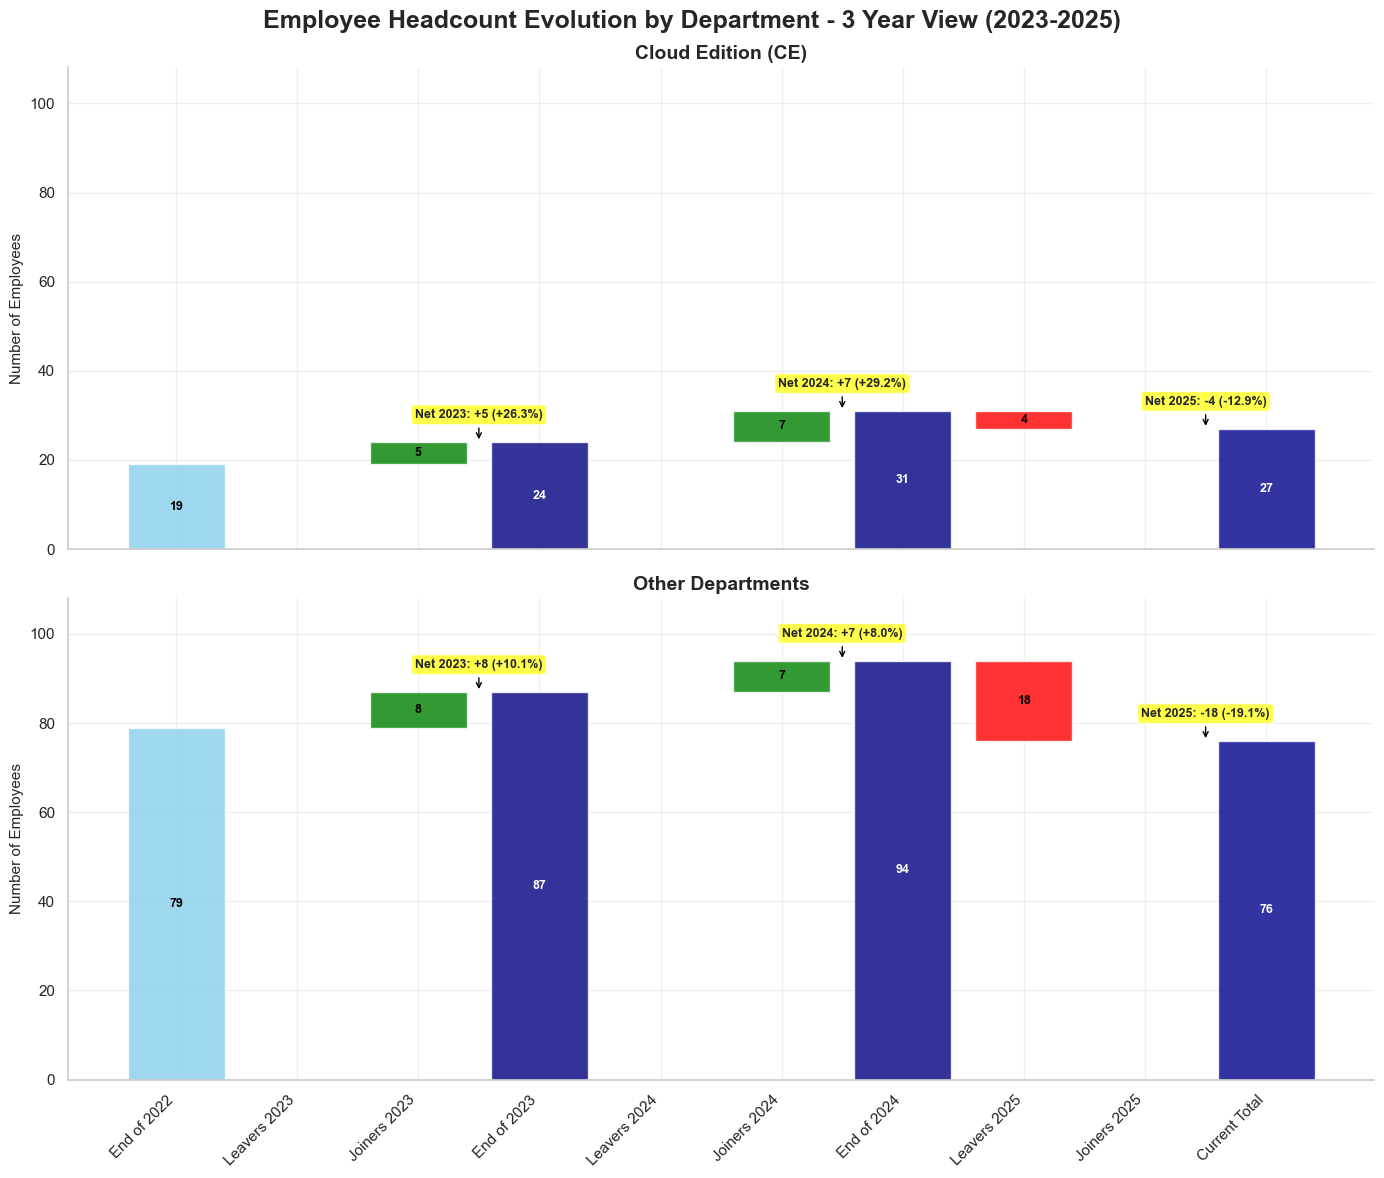


Departmental Headcount Summary by Department:

Cloud Edition (CE):
• Starting headcount (end of 2022): 19
• 2023 - Leavers: 0, Joiners: 5, Net: +5 (+26.3%)
• End of 2023 headcount: 24
• 2024 - Leavers: 0, Joiners: 7, Net: +7 (+29.2%)
• End of 2024 headcount: 31
• 2025 - Leavers: 4, Joiners: 0, Net: -4 (-12.9%)
• Current headcount: 27
• Total change over 3 years: +8 (+42.1%)

Other Departments:
• Starting headcount (end of 2022): 79
• 2023 - Leavers: 0, Joiners: 8, Net: +8 (+10.1%)
• End of 2023 headcount: 87
• 2024 - Leavers: 0, Joiners: 7, Net: +7 (+8.0%)
• End of 2024 headcount: 94
• 2025 - Leavers: 18, Joiners: 0, Net: -18 (-19.1%)
• Current headcount: 76
• Total change over 3 years: -3 (-3.8%)


In [ ]:
## WATERFALL CHART OF HEADCOUNT EVOLUTION - 3 YEAR VIEW BY DEPARTMENT

# Use the real waterfall data split by department
dept_breakdown = {}

# Get unique departments from the data
departments = total_start['dept'].dropna().unique()

# Group departments: keep MZ and CE separate, group others as 'Other'
grouped_departments = []
other_data = {}

for dept in departments:
    if dept in ['MZ', 'CE']:
        grouped_departments.append(dept)
    else:
        # Initialize other_data if not already done
        if 'Other' not in other_data:
            other_data['Other'] = {
                'End of 2022': 0, 'Leavers 2023': 0, 'Joiners 2023': 0, 'End of 2023': 0,
                'Leavers 2024': 0, 'Joiners 2024': 0, 'End of 2024': 0,
                'Leavers 2025': 0, 'Joiners 2025': 0, 'Current Total': 0
            }

# Add 'Other' to grouped departments if there are other departments
if len([d for d in departments if d not in ['MZ', 'CE']]) > 0:
    grouped_departments.append('Other')

# For each department, calculate the breakdown using the same logic as the main chart
for dept in departments:
    dept_data = {}
    
    # Filter data for this department
    dept_total_start = total_start[total_start['dept'] == dept]
    
    # End of 2022 (active employees at start of 2023)
    end_2022 = len(dept_total_start)
    dept_data['End of 2022'] = end_2022
    
    # Calculate 2023 changes
    dept_2023_leavers = dept_total_start[
        (dept_total_start['end'].notna()) & 
        (dept_total_start['end'].dt.year == 2023)
    ]
    leavers_2023 = -len(dept_2023_leavers)
    
    dept_2023_joiners = total_start[
        (total_start['dept'] == dept) &
        (total_start['start'].dt.year == 2023)
    ]
    joiners_2023 = len(dept_2023_joiners)
    
    end_2023 = end_2022 + leavers_2023 + joiners_2023
    
    dept_data['Leavers 2023'] = leavers_2023
    dept_data['Joiners 2023'] = joiners_2023
    dept_data['End of 2023'] = end_2023
    
    # Calculate 2024 changes
    dept_2024_leavers = dept_total_start[
        (dept_total_start['end'].notna()) & 
        (dept_total_start['end'].dt.year == 2024)
    ]
    leavers_2024 = -len(dept_2024_leavers)
    
    dept_2024_joiners = total_start[
        (total_start['dept'] == dept) &
        (total_start['start'].dt.year == 2024)
    ]
    joiners_2024 = len(dept_2024_joiners)
    
    end_2024 = end_2023 + leavers_2024 + joiners_2024
    
    dept_data['Leavers 2024'] = leavers_2024
    dept_data['Joiners 2024'] = joiners_2024
    dept_data['End of 2024'] = end_2024
    
    # Calculate 2025 changes (partial year)
    dept_2025_leavers = dept_total_start[
        (dept_total_start['end'].notna()) & 
        (dept_total_start['end'].dt.year == 2025)
    ]
    leavers_2025 = -len(dept_2025_leavers)
    
    dept_2025_joiners = total_start[
        (total_start['dept'] == dept) &
        (total_start['start'].dt.year == 2025)
    ]
    joiners_2025 = len(dept_2025_joiners)
    
    current_total = end_2024 + leavers_2025 + joiners_2025
    
    dept_data['Leavers 2025'] = leavers_2025
    dept_data['Joiners 2025'] = joiners_2025
    dept_data['Current Total'] = current_total
    
    # Store data appropriately
    if dept in ['MZ', 'CE']:
        dept_breakdown[dept] = dept_data
    else:
        # Aggregate into 'Other' category
        for key in other_data['Other'].keys():
            other_data['Other'][key] += dept_data[key]

# Add 'Other' to dept_breakdown if it exists
if 'Other' in other_data:
    dept_breakdown['Other'] = other_data['Other']

# Categories for all charts
categories = ['End of 2022', 'Leavers 2023', 'Joiners 2023', 'End of 2023', 
              'Leavers 2024', 'Joiners 2024', 'End of 2024',
              'Leavers 2025', 'Joiners 2025', 'Current Total']

# Colors for each bar
colors_3yr = ['skyblue', 'red', 'green', 'navy', 'red', 'green', 'navy', 'red', 'green', 'darkblue']

# Find global max value across all departments for consistent scaling
global_max = 0
for dept in grouped_departments:
    if dept in dept_breakdown:
        dept_data = dept_breakdown[dept]
        values = [dept_data[cat] for cat in categories]
        cumulative = [values[0]]  # Start with end of 2022
        running_total = values[0]

        for i in range(1, len(values)):
            if i in [3, 6, 9]:  # End of year positions
                cumulative.append(values[i])
            else:
                running_total += values[i]
                cumulative.append(running_total)
        
        dept_max = max(cumulative) if max(cumulative) > 0 else 1
        global_max = max(global_max, dept_max)

# Add 15% padding to global_max for annotations
global_y_limit = global_max * 1.15

# Create figure with subplots based on number of grouped departments
num_depts = len(grouped_departments)
fig, axes = plt.subplots(num_depts, 1, figsize=(14, 6*num_depts))
if num_depts == 1:
    axes = [axes]  # Make it a list for consistency

fig.suptitle('Employee Headcount Evolution by Department - 3 Year View (2023-2025)', 
             fontsize=18, fontweight='bold', y=0.98)

# Department titles mapping
dept_titles = {
    'CE': 'Cloud Edition (CE)',
    'MZ': 'Mediation Zone (MZ)', 
    'Other': 'Other Departments'
}

for idx, dept in enumerate(grouped_departments):
    ax = axes[idx]
    
    # Get department data
    dept_data = dept_breakdown[dept]
    values = [dept_data[cat] for cat in categories]
    
    # Create cumulative values for positioning
    cumulative = [values[0]]  # Start with end of 2022
    running_total = values[0]

    for i in range(1, len(values)):
        if i in [3, 6, 9]:  # End of year positions
            cumulative.append(values[i])
        else:
            running_total += values[i]
            cumulative.append(running_total)

    # Calculate net changes
    net_2023 = values[2] + values[1]  # joiners + leavers (leavers already negative)
    net_2024 = values[5] + values[4]
    net_2025 = values[8] + values[7]
    
    # Calculate percentage changes
    pct_2023 = (net_2023 / values[0] * 100) if values[0] > 0 else 0
    pct_2024 = (net_2024 / values[3] * 100) if values[3] > 0 else 0
    pct_2025 = (net_2025 / values[6] * 100) if values[6] > 0 else 0

    # Plot bars for this department
    for i, (cat, val) in enumerate(zip(categories, values)):
        if i in [0, 3, 6, 9]:  # Year-end totals (from zero)
            bar = ax.bar(cat, val, color=colors_3yr[i], alpha=0.8)
            # Add value labels
            text_color = 'white' if colors_3yr[i] in ['navy', 'darkblue'] else 'black'
            ax.text(i, val/2, f'{int(abs(val))}', ha='center', va='center', 
                    fontweight='bold', fontsize=9, color=text_color)
        else:  # Change bars
            if val > 0:
                bottom = cumulative[i-1]
                bar = ax.bar(cat, abs(val), bottom=bottom, color=colors_3yr[i], alpha=0.8)
                y_pos = bottom + val/2
            else:
                bottom = cumulative[i-1] + val
                bar = ax.bar(cat, abs(val), bottom=bottom, color=colors_3yr[i], alpha=0.8)
                y_pos = cumulative[i-1] + val/2
            
            # Add value labels
            if val != 0:  # Only add labels for non-zero values
                ax.text(i, y_pos, f'{int(abs(val))}', ha='center', va='center', 
                        fontweight='bold', fontsize=9, color='black')

    # Set consistent y-axis limits for all charts
    ax.set_ylim(0, global_y_limit)
    
    # Add net change annotations with percentages
    annotation_height = global_y_limit * 0.05
    
    # Only add annotations if there are changes
    if net_2023 != 0:
        ax.annotate(f'Net 2023: {net_2023:+d} ({pct_2023:+.1f}%)', 
                    xy=(2.5, cumulative[3]), 
                    xytext=(2.5, cumulative[3] + annotation_height),
                    ha='center', fontweight='bold', fontsize=9,
                    bbox=dict(boxstyle="round,pad=0.3", facecolor='yellow', alpha=0.7),
                    arrowprops=dict(arrowstyle='->', color='black', lw=1))

    if net_2024 != 0:
        ax.annotate(f'Net 2024: {net_2024:+d} ({pct_2024:+.1f}%)', 
                    xy=(5.5, cumulative[6]), 
                    xytext=(5.5, cumulative[6] + annotation_height),
                    ha='center', fontweight='bold', fontsize=9,
                    bbox=dict(boxstyle="round,pad=0.3", facecolor='yellow', alpha=0.7),
                    arrowprops=dict(arrowstyle='->', color='black', lw=1))

    if net_2025 != 0:
        ax.annotate(f'Net 2025: {net_2025:+d} ({pct_2025:+.1f}%)', 
                    xy=(8.5, cumulative[9]), 
                    xytext=(8.5, cumulative[9] + annotation_height),
                    ha='center', fontweight='bold', fontsize=9,
                    bbox=dict(boxstyle="round,pad=0.3", facecolor='yellow', alpha=0.7),
                    arrowprops=dict(arrowstyle='->', color='black', lw=1))

    # Use dept_titles mapping
    title = dept_titles[dept]
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_ylabel('Number of Employees', fontsize=11)
    ax.grid(True, alpha=0.3)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Rotate x-axis labels only for bottom chart
    if idx == num_depts - 1:
        ax.tick_params(axis='x', rotation=45)
        plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
    else:
        ax.set_xticklabels([])  # Hide x-axis labels for top charts

plt.tight_layout()
plt.show()

# Summary statistics for each grouped department
print(f"\nDepartmental Headcount Summary by Department:")
for dept in grouped_departments:
    if dept in dept_breakdown:
        dept_data = dept_breakdown[dept]
        dept_title = dept_titles[dept]
        print(f"\n{dept_title}:")
        print(f"• Starting headcount (end of 2022): {dept_data['End of 2022']}")
        
        net_2023 = dept_data['Joiners 2023'] + dept_data['Leavers 2023']
        net_2024 = dept_data['Joiners 2024'] + dept_data['Leavers 2024'] 
        net_2025 = dept_data['Joiners 2025'] + dept_data['Leavers 2025']
        
        pct_2023 = (net_2023 / dept_data['End of 2022'] * 100) if dept_data['End of 2022'] > 0 else 0
        pct_2024 = (net_2024 / dept_data['End of 2023'] * 100) if dept_data['End of 2023'] > 0 else 0
        pct_2025 = (net_2025 / dept_data['End of 2024'] * 100) if dept_data['End of 2024'] > 0 else 0
        
        print(f"• 2023 - Leavers: {abs(dept_data['Leavers 2023'])}, Joiners: {dept_data['Joiners 2023']}, Net: {net_2023:+d} ({pct_2023:+.1f}%)")
        print(f"• End of 2023 headcount: {dept_data['End of 2023']}")
        print(f"• 2024 - Leavers: {abs(dept_data['Leavers 2024'])}, Joiners: {dept_data['Joiners 2024']}, Net: {net_2024:+d} ({pct_2024:+.1f}%)")
        print(f"• End of 2024 headcount: {dept_data['End of 2024']}")
        print(f"• 2025 - Leavers: {abs(dept_data['Leavers 2025'])}, Joiners: {dept_data['Joiners 2025']}, Net: {net_2025:+d} ({pct_2025:+.1f}%)")
        print(f"• Current headcount: {dept_data['Current Total']}")
        
        total_change = dept_data['Current Total'] - dept_data['End of 2022']
        total_pct_change = (total_change / dept_data['End of 2022'] * 100) if dept_data['End of 2022'] > 0 else 0
        print(f"• Total change over 3 years: {total_change:+d} ({total_pct_change:+.1f}%)")


In [ ]:
# Create waterfall charts for each category
fig, axes = plt.subplots(4, 1, figsize=(16, 20))
fig.suptitle('Employee Headcount Evolution by Category - 3 Year View (2023-2025)', fontsize=16, fontweight='bold')

categories = [
    ('Cloud Edition (CE)', waterfall_ce, axes[0]),
    ('Mediation Zone/Private Edition (MZ/PE)', waterfall_mz, axes[1]),
    ('Other Functions', waterfall_other, axes[2])
]

# Colors for each bar - alternating pattern for years
colors_3yr = ['skyblue', 'red', 'green', 'navy', 'red', 'green', 'navy', 'red', 'green', 'darkblue']

for cat_name, waterfall_data_cat, ax in categories:
    # Create cumulative values for positioning
    cumulative_cat = [waterfall_data_cat['Values'][0]]
    running_total = waterfall_data_cat['Values'][0]
    
    for i in range(1, len(waterfall_data_cat['Values'])):
        if i in [3, 6, 9]:  # End of year positions
            cumulative_cat.append(waterfall_data_cat['Values'][i])
        else:
            running_total += waterfall_data_cat['Values'][i]
            cumulative_cat.append(running_total)
    
    # Calculate net changes
    net_2023 = waterfall_data_cat['Values'][2] + waterfall_data_cat['Values'][1]  # joiners + leavers
    net_2024 = waterfall_data_cat['Values'][5] + waterfall_data_cat['Values'][4]  # joiners + leavers
    net_2025 = waterfall_data_cat['Values'][8] + waterfall_data_cat['Values'][7]  # joiners + leavers
    
    #
    for i, (category, val) in enumerate(zip(waterfall_data_cat['Category'], waterfall_data_cat['Values'])):
        if i in [0, 3, 6, 9]:  # Year-end totals (from zero)
            bar = ax.bar(i, val, color=colors_3yr[i], alpha=0.8)
            text_color = 'white' if colors_3yr[i] in ['navy', 'darkblue'] else 'black'
            ax.text(i, val/2, f'{int(abs(val))}', ha='center', va='center', 
                    fontweight='bold', fontsize=9, color=text_color)
        else:  # Change bars
            if val > 0:
                bottom = cumulative_cat[i-1]
                bar = ax.bar(i, abs(val), bottom=bottom, color=colors_3yr[i], alpha=0.8)
                y_pos = bottom + val/2
            else:
                bottom = cumulative_cat[i-1] + val
                bar = ax.bar(i, abs(val), bottom=bottom, color=colors_3yr[i], alpha=0.8)
                y_pos = cumulative_cat[i-1] + val/2
            
            ax.text(i, y_pos, f'{int(abs(val))}', ha='center', va='center', 
                    fontweight='bold', fontsize=9, color='black')
    
    # Add net change annotations
    if waterfall_data_cat['Values'][0] > 0:  # Only if we have historical data
        # 2023 net change
        ax.annotate(f'{net_2023:+d}', 
                    xy=(2.5, cumulative_cat[3]), 
                    xytext=(2.5, cumulative_cat[3] + max(cumulative_cat) * 0.1),
                    ha='center', fontweight='bold', fontsize=10,
                    bbox=dict(boxstyle="round,pad=0.2", facecolor='yellow', alpha=0.7))
        
        # 2024 net change
        ax.annotate(f'{net_2024:+d}', 
                    xy=(5.5, cumulative_cat[6]), 
                    xytext=(5.5, cumulative_cat[6] + max(cumulative_cat) * 0.1),
                    ha='center', fontweight='bold', fontsize=10,
                    bbox=dict(boxstyle="round,pad=0.2", facecolor='yellow', alpha=0.7))
        
        # 2025 net change
        ax.annotate(f'{net_2025:+d}', 
                    xy=(8.5, cumulative_cat[9]), 
                    xytext=(8.5, cumulative_cat[9] + max(cumulative_cat) * 0.1),
                    ha='center', fontweight='bold', fontsize=10,
                    bbox=dict(boxstyle="round,pad=0.2", facecolor='yellow', alpha=0.7))
    
    ax.set_title(f'{cat_name}', fontsize=12, fontweight='bold')
    ax.set_ylabel('Number of Employees', fontsize=10)
    ax.grid(True, alpha=0.3)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Set x-axis labels
    ax.set_xticks(range(len(waterfall_data_cat['Category'])))
    ax.set_xticklabels([cat.replace('End of ', '').replace('Leavers ', 'L-').replace('Joiners ', 'J-').replace('Current Total', '2025*') 
                        for cat in waterfall_data_cat['Category']], rotation=45, ha='right', fontsize=9)

# Create a combined total chart in the fourth subplot
ax_total = axes[3]
cumulative_total = [waterfall_data_3yr['Values'][0]]
running_total = waterfall_data_3yr['Values'][0]

for i in range(1, len(waterfall_data_3yr['Values'])):
    if i in [3, 6, 9]:  # End of year positions
        cumulative_total.append(waterfall_data_3yr['Values'][i])
    else:
        running_total += waterfall_data_3yr['Values'][i]
        cumulative_total.append(running_total)

# Plot total bars
for i, (category, val) in enumerate(zip(waterfall_data_3yr['Category'], waterfall_data_3yr['Values'])):
    if i in [0, 3, 6, 9]:  # Year-end totals
        bar = ax_total.bar(i, val, color=colors_3yr[i], alpha=0.8)
        text_color = 'white' if colors_3yr[i] in ['navy', 'darkblue'] else 'black'
        ax_total.text(i, val/2, f'{int(abs(val))}', ha='center', va='center', 
                fontweight='bold', fontsize=9, color=text_color)
    else:  # Change bars
        if val > 0:
            bottom = cumulative_total[i-1]
            bar = ax_total.bar(i, abs(val), bottom=bottom, color=colors_3yr[i], alpha=0.8)
            y_pos = bottom + val/2
        else:
            bottom = cumulative_total[i-1] + val
            bar = ax_total.bar(i, abs(val), bottom=bottom, color=colors_3yr[i], alpha=0.8)
            y_pos = cumulative_total[i-1] + val/2
        
        ax_total.text(i, y_pos, f'{int(abs(val))}', ha='center', va='center', 
                fontweight='bold', fontsize=9, color='black')

ax_total.set_title('Total Organization', fontsize=12, fontweight='bold')
ax_total.set_ylabel('Number of Employees', fontsize=10)
ax_total.grid(True, alpha=0.3)
ax_total.spines['top'].set_visible(False)
ax_total.spines['right'].set_visible(False)
ax_total.set_xticks(range(len(waterfall_data_3yr['Category'])))
ax_total.set_xticklabels([cat.replace('End of ', '').replace('Leavers ', 'L-').replace('Joiners ', 'J-').replace('Current Total', '2025*') 
                         for cat in waterfall_data_3yr['Category']], rotation=45, ha='right', fontsize=9)

plt.tight_layout()
plt.show()

# Print summary statistics for each category
print("\nCategory-wise summary:")
for cat_name, waterfall_data_cat in [('Cloud Edition (CE)', waterfall_ce), 
                                     ('MZ/PE', waterfall_mz), 
                                     ('Other Functions', waterfall_other)]:
    net_2025 = waterfall_data_cat['Values'][8] + waterfall_data_cat['Values'][7]
    current_size = waterfall_data_cat['Values'][-1]
    print(f"\n{cat_name}:")
    print(f"  • Current size: {current_size}")
    print(f"  • 2025 net change: {net_2025:+d}")
    print(f"  • 2025 leavers: {abs(waterfall_data_cat['Values'][7])}")
    print(f"  • 2025 joiners: {waterfall_data_cat['Values'][8]}")


NameError: name 'waterfall_ce' is not defined

## GEO DISTRIBUTION

In [ ]:
# create a series that captures the count of occurences of each country in the 'country' column
sf = df_active.country.value_counts().sort_index()
# create a dataframe from it
df_summary = pd.DataFrame({"count": sf})

# print("total employees: ",df_summary["count"].sum())
print("\nDistribution of employees per country:")
df_summary["percentage"] = (
    df_summary["count"].astype(float) / (df_summary["count"].sum())
)

# Create a deep copy of df_summary just to add a total row without adding it to the original dataframe
# Adding a total row_temp
df_summary_temp = pd.DataFrame()
df_summary_temp = df_summary.copy()
df_summary_temp.loc['//// TOTAL ////'] = df_summary_temp.sum()

display(df_summary_temp
                #.sort_values(by=["count"], ascending=False)
                .style
                .format(format_mapping)
                #.hide(axis='index')
                .highlight_max(subset=['count'], color='peachfuzz')
                #.highlight_min(color='pink')
                ## more colormaps: https://matplotlib.org/stable/users/explain/colors/colormaps.html#choosing-colormaps   
                #.background_gradient(subset=['percentage'], cmap='BuGn')
                .bar(color='#FFA07A', vmin=100_000, subset=['count'], align='zero')
                ## more colors: https://matplotlib.org/stable/gallery/color/named_colors.html#sphx-glr-gallery-color-named-colors-py
                .bar(color='thistle', vmin=0, subset=['count'], align='zero')
                #.set_caption('Cost per CC')
                )
#        .style
#        .format(format_mapping)
#        .hide(axis="index") )


import gc
del df_summary_temp
gc.collect()

##display(df_summary)
#df_summary.memory_usage(deep=True).sum()


Distribution of employees per country:


,count,percentage
country,,
Bulgaria,2,2%
Denmark,1,1%
Japan,1,1%
Malaysia,41,43%
Poland,1,1%
Sweden,50,52%
//// TOTAL ////,96,100%


20031

distribution of ProdTech employees per country


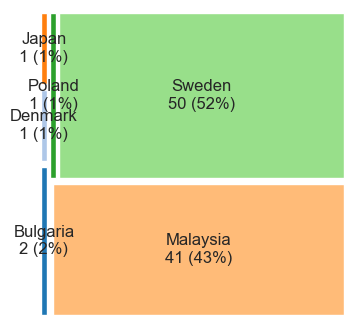

In [ ]:
import matplotlib.pyplot as plt1

plt1.figure(figsize=(4, 4))
print("distribution of ProdTech employees per country") 
squarify.plot(sizes=df_summary['count'], 
              label=df_summary.index.get_level_values('country') + "\n" + df_summary['count'].map(str) + " (" + (df_summary['count'] / df_summary['count'].sum() * 100).map("{:.0f}".format) + "%)",
              color=sns.color_palette("tab20"), pad=1) 


plt1.axis('off')
plt1.show()

# above heatmap is more useful, but to get a pie chart:

#import matplotlib.pyplot as plt
#plot = df_summary.plot.pie(y='count', figsize=(5, 5), 
#                           title="distribution of ProdTech employees", 
#                           legend=False, label="")
#plot = df_summary.plot(kind='pie', y='count', figsize=(5, 5))
#plt.show()




In [ ]:
## A SIMPLER WAY TO GET THE ABOVE RESULTS (but harder to format)
#print("We have ProdTech employees in the following countries: \n")
#display(df_active['country'].value_counts().sort_index())
print("\n\n...and they are attached to the following offices: ")
df_active['city'].value_counts().sort_index()



...and they are attached to the following offices: 


city
Gothenburg       7
Home Office      8
Kuala Lumpur    41
Sofia            2
Stockholm       38
Name: count, dtype: int64

### Secondary locations

#### Home Office

In [ ]:

df_active[df_active.city == "Home Office"][
    ["lname", "fname", "city", "title","contract"]
].sort_values(by=["lname"], ascending=True)

,lname,fname,city,title,contract
164,Dixit,Gaurav,Home Office,"Lead Product Manager, Analytics and Machine Learning",Sub Contractor
140,Eriksson,Emil,Home Office,Head of Products,Permanent
196,Gandhi,Srivenkatesh,Home Office,Software Engineer,Sub Contractor
31,Hansson,Kim,Home Office,Head of Customer Support,Permanent
219,Kumar Sahu,Shashank,Home Office,Software Engineer,Sub Contractor
184,Raam,Kreshnaa,Home Office,Software Engineer,Sub Contractor
47,Talarek,Bartlomiej,Home Office,L3 Support Engineer,Long term Contractor
19,Vojbacke,Magnus,Home Office,SRE Engineer,Employed via partner


#### Östersund

In [ ]:
df_active[df_active.city == 'Östersund'][['lname','fname','city','title','contract']].sort_values(by=['lname'], ascending=True)

,lname,fname,city,title,contract


#### Göteborg

In [ ]:
df_active[df_active.city == 'Gothenburg'][['lname','fname','city','title','contract']].sort_values(by=['lname'], ascending=True)

,lname,fname,city,title,contract
224,Aronsson,Andreas,Gothenburg,Software Engineer,Permanent
203,Edrisameri,Mansour,Gothenburg,Software Engineer,Permanent
27,Lundström,Mattias,Gothenburg,Software Architect,Permanent
194,Majumdar,Abhinav,Gothenburg,Engineering Manager,Permanent
12,Martinsson,Peter,Gothenburg,Software Engineer,Permanent
163,Pereira,Manuel,Gothenburg,QA Engineer,Permanent
5,Sjölin,David,Gothenburg,Software Engineer,Permanent


#### Sofia

In [ ]:
df_active[df_active.city == 'Sofia'][['lname','fname','city','title','contract']].sort_values(by=['lname'], ascending=True)

,lname,fname,city,title,contract
81,Bakalov,Nikolay,Sofia,L3 Support Engineer,Permanent
103,Borisova,Mariya,Sofia,L3 Team Lead,Permanent


## Contractors

In [ ]:
# create a series that captures the count of occurences of each employement type in the 'Type of contract' column
sf = df_active.contract.value_counts().sort_index()
# create a dataframe from it
df_contract_summary = pd.DataFrame({'count':sf})

#print("total employees: ",df_summary["count"].sum())
print("\nDistribution of employees per contract type:")
df_contract_summary['percentage'] = df_contract_summary['count'].astype(float) / (df_contract_summary["count"].sum())

#df_contract_summary[['percentage']] = df_contract_summary[['percentage']].applymap(format_percentages)

display(df_contract_summary
        ##put this under a display(df.
        .style
        .format(format_mapping)
        #.hide(axis='index') 
        #.highlight_max(subset=['count'], color='lightgreen')
        #.highlight_min(color='pink')
        ## more colormaps: https://matplotlib.org/stable/users/explain/colors/colormaps.html#choosing-colormaps   
        #.background_gradient(subset=['sum'], cmap='BuGn')
        #.bar(color='#FFA07A', vmin=100_000, subset=['count'], align='zero')
        ## more colors: https://matplotlib.org/stable/gallery/color/named_colors.html#sphx-glr-gallery-color-named-colors-py
        #.bar(color='thistle', vmin=0, subset=['count'], align='zero')
        #.set_caption('Cost per CC')
)

#display(df_active.isnull().sum())
#display(df_active.isna().sum())

print("\nContractors at ProdTech today:")

display(df_active[df_active.contract.isin(["Contractor", "Long term Contractor", "Employed via partner"])][['fname','lname','contract','start','end']]
        .style
        .hide(axis='index') 
        .format(format_mapping)
)



Distribution of employees per contract type:


,count,percentage
contract,,
Employed via partner,1,1%
Long term Contractor,1,1%
Permanent,90,94%
Sub Contractor,4,4%



Contractors at ProdTech today:


fname,lname,contract,start,end
Magnus,Vojbacke,Employed via partner,2011-10-17,
Bartlomiej,Talarek,Long term Contractor,2017-12-01,


## Overview of ProdTech departments (CTO team areas)

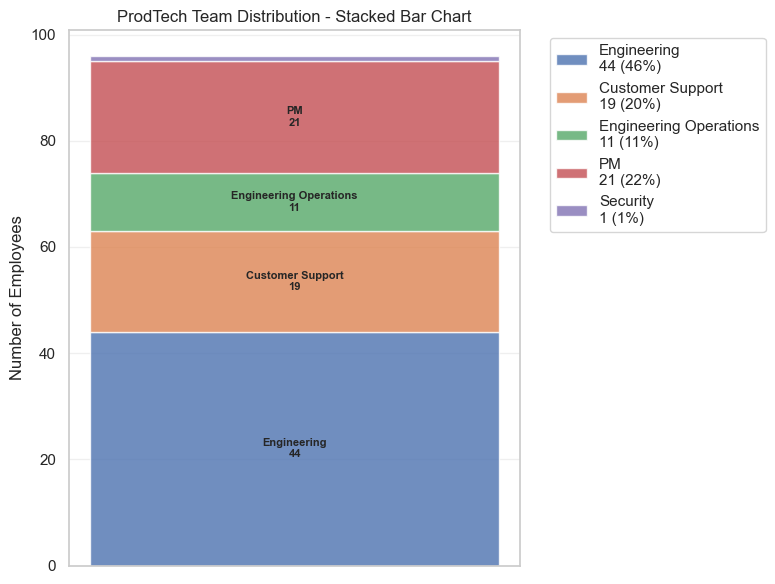

In [ ]:
# First, create the summary by function
sf_function = df_active.function.value_counts().sort_index()
df_summary_function = pd.DataFrame({'function': sf_function.index, 'count': sf_function.values})

# Reorder so Engineering is at the top
engineering_row = df_summary_function[df_summary_function['function'] == 'Engineering']
other_rows = df_summary_function[df_summary_function['function'] != 'Engineering']
df_summary_function = pd.concat([engineering_row, other_rows]).reset_index(drop=True)


# Create a vertical stacked bar chart
plt1.figure(figsize=(8, 6))

colors = sns.color_palette("deep", len(df_summary_function))
bottom = 0

for i, (func, count) in enumerate(zip(df_summary_function['function'], df_summary_function['count'])):
    percentage = (count / df_summary_function['count'].sum() * 100)
    
    # Create vertical bar segment
    plt1.bar(0, count, bottom=bottom, width=0.5, 
             color=colors[i], alpha=0.8, 
             label=f"{func}\n{count} ({percentage:.0f}%)")
    
    # Add text label in the middle of each segment
    if count > df_summary_function['count'].sum() * 0.05:  # Only label segments > 5%
        plt1.text(0, bottom + count/2, f"{func}\n{count}", 
                  ha='center', va='center', fontsize=8, fontweight='bold')
    
    bottom += count

plt1.xticks([])  # Remove x-axis ticks
plt1.ylabel('Number of Employees')
plt1.title('ProdTech Team Distribution - Stacked Bar Chart')
plt1.grid(True, alpha=0.3, axis='y')
plt1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt1.tight_layout()
plt1.show()


distribution of ProdTech employees per CTO area (function in DigiPeople)


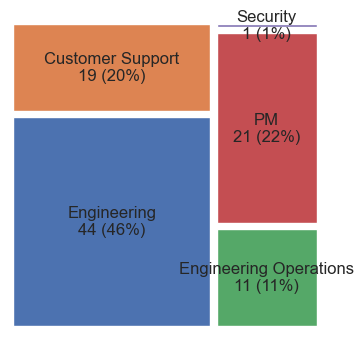


Distribution of employees among ProdTech teams:


function,count,percentage
Engineering,44,46%
Customer Support,19,20%
Engineering Operations,11,11%
PM,21,22%
Security,1,1%
//// TOTAL ////,96,100%


In [ ]:
print("distribution of ProdTech employees per CTO area (function in DigiPeople)") 

#sf_summary_function = df_active.function.value_counts().sort_index()
#display(sf_summary_function)

# convert the series to a dataframe, using the index names as values for first column
#df_summary_function=pd.DataFrame({'function':sf_summary_function.index, 'count':sf_summary_function.values})
#display(df_summary_function)

# plot it
#squarify.plot(sizes=df_summary_function['count'], label=df_summary_function['function'],
#            color=sns.color_palette("tab20"), pad=1) 

plt1.figure(figsize=(4, 4))
#squarify.plot(sizes=df_summary_function['count'], 
#              label=df_summary_function['function'] + "\n" + df_summary_function['count'].map(str),
#              color=sns.color_palette("deep"), pad=1) 

squarify.plot(sizes=df_summary_function['count'], 
              label=df_summary_function['function'] + "\n" + df_summary_function['count'].map(str) + " (" + (df_summary_function['count'] / df_summary_function['count'].sum() * 100).map("{:.0f}".format) + "%)",
              color=sns.color_palette("deep"), pad=1) 

#squarify.plot(sizes=df_summary_function['count'], label=df_summary_function['function'],
#            color=sns.color_palette("tab20"), pad=1, text_kwargs={'fontsize': 18}) 
plt1.axis('off')
plt1.show()


# print("total employees: ",df_summary["count"].sum())
print("\nDistribution of employees among ProdTech teams:")
df_summary_function["percentage"] = (
    df_summary_function["count"].astype(float) / (df_summary_function["count"].sum())
)

#df_summary_function.loc['//// TOTAL ////'] = df_summary_function.sum()
df_summary_function.loc['TOTAL'] = df_summary_function.sum()
df_summary_function.at['TOTAL', 'function'] = '//// TOTAL ////'

display(df_summary_function
                #.sort_values(by=["count"], ascending=False)
                .style
                .format(format_mapping)
                .hide(axis='index')
                .highlight_max(subset=['count'], color='peachfuzz')
                #.highlight_min(color='pink')
                ## more colormaps: https://matplotlib.org/stable/users/explain/colors/colormaps.html#choosing-colormaps   
                #.background_gradient(subset=['percentage'], cmap='BuGn')
                .bar(color='#FFA07A', vmin=100_000, subset=['count'], align='zero')
                ## more colors: https://matplotlib.org/stable/gallery/color/named_colors.html#sphx-glr-gallery-color-named-colors-py
                .bar(color='thistle', vmin=0, subset=['count'], align='zero')
                #.set_caption('Cost per CC')
                )
#        .style
#        .format(format_mapping)
      #  .hide(axis="index") )


In [ ]:
# alternate heatmap viz using Plotly Express - benefit: interactive when hovering
#fig = px.treemap(df_summary_function, path=['function'],values='count', width=800, height=400)
#fig.update_layout (treemapcolorway = colors, #defines the colors in the treemap
#                    margin = dict(t=50, l=25, r=25, b=25))
#fig.data[0].textinfo = 'label+text+value'
#fig.update_traces(root_color="white")
#fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
#fig.show()

In [ ]:
#stacked bar chart alternative view of prior chart
#print("Allocation of employees in ProdTech")
#plot = sns.histplot(df_active, x="country", hue="function", alpha=1, palette="deep", multiple="stack")

ProdTech employees excluding Customer Support and SRE: 45
(Excluded 51 Customer Support and SRE employees)

Distribution of ProdTech employees per Product/Department (excluding Customer Support and SRE):


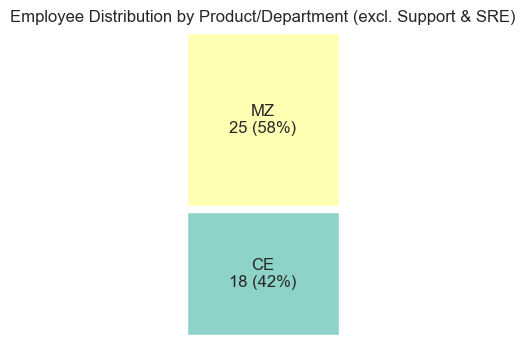

dept,count,percentage
CE,18,42%
MZ,25,58%
//// TOTAL ////,43,100%


In [ ]:
# Filter out Customer Support and Engineering Operations from active employees
df_active_no_support = df_active[~df_active['function'].isin(['Customer Support', 'Site Reliability Engineering', 'Engineering Operations', 'Product Management','PM'])]

print(f"ProdTech employees excluding Customer Support and SRE: {len(df_active_no_support)}")
print(f"(Excluded {len(df_active) - len(df_active_no_support)} Customer Support and SRE employees)")

# Create summary by department/product for filtered employees
sf_dept = df_active_no_support.dept.value_counts().sort_index()
df_summary_dept = pd.DataFrame({'dept': sf_dept.index, 'count': sf_dept.values})

print("\nDistribution of ProdTech employees per Product/Department (excluding Customer Support and SRE):")

# Create treemap visualization
plt1.figure(figsize=(2, 4))
squarify.plot(sizes=df_summary_dept['count'], 
              label=df_summary_dept['dept'] + "\n" + df_summary_dept['count'].map(str) + " (" + (df_summary_dept['count'] / df_summary_dept['count'].sum() * 100).map("{:.0f}".format) + "%)",
              color=sns.color_palette("Set3"), pad=1) 

plt1.axis('off')
plt1.title('Employee Distribution by Product/Department (excl. Support & SRE)')
plt1.show()

# Calculate percentages
df_summary_dept["percentage"] = (
    df_summary_dept["count"].astype(float) / (df_summary_dept["count"].sum())
)

# Add total row
df_summary_dept.loc['TOTAL'] = df_summary_dept.sum()
df_summary_dept.at['TOTAL', 'dept'] = '//// TOTAL ////'

display(df_summary_dept
        .style
        .format(format_mapping)
        .hide(axis='index')
        .highlight_max(subset=['count'], color='peachfuzz')
        .bar(color='lightblue', vmin=0, subset=['count'], align='zero')
        )

# DEMOGRAPHICS

## Gender

In [ ]:
#print(
#    """
#Gender statistics over different categories:
#      \t* count = total number of entries (employees) in the sample
#      \t* unique = number of unique value for gender in the sample
#      \t* top = top value for gender in the sample
#      \t* freq = frequency of top value in the overall sample
#"""
#)

print("\nOverall gender distribution at ProdTech:")

df_gender_summary = df_active.groupby(['gender'])['gender'].size().reset_index(name='count')

df_gender_summary["percentage"] = (
    df_gender_summary["count"].astype(float) / (df_gender_summary["count"].sum())
)

display(df_gender_summary
        .style
        .format(format_mapping)
        .hide(axis='index') 
        #.highlight_max(subset=['count'], color='peachfuzz')
        #.highlight_min(subset=['count'], color='pink')
        ## more colormaps: https://matplotlib.org/stable/users/explain/colors/colormaps.html#choosing-colormaps   
        .background_gradient(subset=['percentage'], cmap='BuGn')
        #.bar(color='#FFA07A', vmin=100_000, subset=['count'], align='zero')
        ## more colors: https://matplotlib.org/stable/gallery/color/named_colors.html#sphx-glr-gallery-color-named-colors-py
        #.bar(color='thistle', vmin=0, subset=['count'], align='zero')
        #.set_caption('Cost per CC')
        )

#df_active["gender"].describe()
#grouped_df = df_active.groupby("country")
#display(grouped_df["gender"].describe())
#grouped_df = df_active.groupby("function")
#display(grouped_df["gender"].describe())



Overall gender distribution at ProdTech:


gender,count,percentage
Female,12,14%
Male,71,85%
Prefer not to say,1,1%


### Gender by country


Gender distribution by country at ProdTech:


country,total,gender,count,percentage
Bulgaria,2,Female,1,50%
Bulgaria,2,Male,1,50%
Denmark,1,Male,1,100%
Japan,1,Male,1,100%
Malaysia,40,Female,4,10%
Malaysia,40,Male,36,90%
Poland,1,Male,1,100%
Sweden,39,Female,7,18%
Sweden,39,Male,31,79%
Sweden,39,Prefer not to say,1,3%


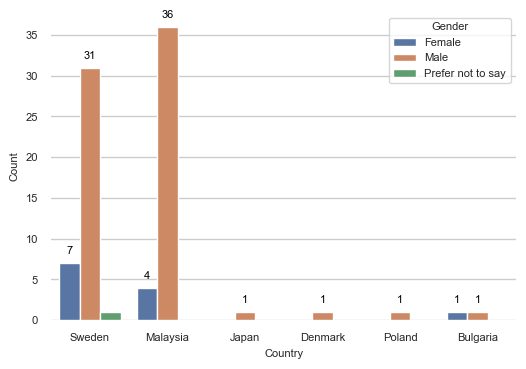

In [ ]:
## Gender stats, per country

df_gender_summary_by_country = df_active.groupby(['country','gender'])['gender'].size().reset_index(name='count')

# Group by "country" and calculate the total count for each country
df_gender_summary_by_country['total'] = df_gender_summary_by_country.groupby('country')['count'].transform('sum')

# Calculate the percentage
df_gender_summary_by_country['percentage'] = (df_gender_summary_by_country['count'] / df_gender_summary_by_country['total'])

print("\nGender distribution by country at ProdTech:")

display(df_gender_summary_by_country[['country','total','gender','count','percentage']]
        .style
        .format(format_mapping)
        .hide(axis='index') 
        .applymap(highlight_female, subset=['gender'])
        #.highlight_max(subset=['count'], color='lightgreen')
        #.highlight_min(subset=['count'], color='pink')
        ## more colormaps: https://matplotlib.org/stable/users/explain/colors/colormaps.html#choosing-colormaps   
        .background_gradient(subset=['count'], cmap='BuGn')
        #.bar(color='#FFA07A', vmin=100_000, subset=['count'], align='zero')
        ## more colors: https://matplotlib.org/stable/gallery/color/named_colors.html#sphx-glr-gallery-color-named-colors-py
        #.bar(color='thistle', vmin=0, subset=['count'], align='zero')
        #.set_caption('Cost per CC')
        )


plt.figure(figsize=(6, 4))
plot = sns.countplot(x="country", data=df_active, hue="gender")
plot.bar_label(
    plot.containers[0],
    label_type="edge",
    color="black",
    rotation=0,
    fontsize=8,
    padding=5,
)
plot.bar_label(
    plot.containers[1],
    label_type="edge",
    color="black",
    rotation=0,
    fontsize=8,
    padding=5,
)
plot.spines["top"].set_visible(False)
plot.spines["right"].set_visible(False)
plot.spines["bottom"].set_visible(False)
plot.spines["left"].set_visible(False)

# Set the font size for all elements: labels, title, and legend
plt.xticks(fontsize=8) # For x-axis tick labels
plt.yticks(fontsize=8) # For y-axis tick labels
plt.xlabel('Country',fontsize=8) # For x-axis label
plt.ylabel('Count', fontsize=8) # For y-axis label
#plt.title('Title of the Plot', fontsize=8) # For plot title
plt.legend(title='Gender', title_fontsize='8', fontsize='8') # For legend

plt.show()

In [ ]:
## Gender stats, per country # excluding all locations with less than 3 people

df_gender_summary_by_country = df_active.groupby(['country','gender'])['gender'].size().reset_index(name='count')

# Group by "country" and calculate the total count for each country
df_gender_summary_by_country['total'] = df_gender_summary_by_country.groupby('country')['count'].transform('sum')

# Calculate the percentage
df_gender_summary_by_country['percentage'] = (df_gender_summary_by_country['count'] / df_gender_summary_by_country['total'])

### print("\nGender distribution by country at ProdTech (only locations with more than 3 persons):")


# Exclude countries with less than 3 rows
df_gender_summary_by_country = df_gender_summary_by_country[df_gender_summary_by_country['total'] >= 3]

### display(df_gender_summary_by_country[['country','total','gender','count','percentage']]
###     .style
###     .format(format_mapping)
###     .hide(axis='index') 
###     .applymap(highlight_female, subset=['gender'])
###     .background_gradient(subset=['count'], cmap='BuGn')
###     )


plt.figure(figsize=(6, 4))
# Filter df_active to exclude countries with less than 3 rows
country_counts = df_active['country'].value_counts()
filtered_df_active = df_active[df_active['country'].isin(country_counts[country_counts >= 3].index)]
plot = sns.countplot(x="country", data=filtered_df_active, hue="gender")
plot.bar_label(
    plot.containers[0],
    label_type="edge",
    color="black",
    rotation=0,
    fontsize=8,
    padding=5,
)
plot.bar_label(
    plot.containers[1],
    label_type="edge",
    color="black",
    rotation=0,
    fontsize=8,
    padding=5,
)
plot.spines["top"].set_visible(False)
plot.spines["right"].set_visible(False)
plot.spines["bottom"].set_visible(False)
plot.spines["left"].set_visible(False)

# Set the font size for all elements: labels, title, and legend
plt.xticks(fontsize=8) # For x-axis tick labels
plt.yticks(fontsize=8) # For y-axis tick labels
plt.xlabel('Country',fontsize=8) # For x-axis label
plt.ylabel('Count', fontsize=8) # For y-axis label
#plt.title('Title of the Plot', fontsize=8) # For plot title
plt.legend(title='Gender', title_fontsize='8', fontsize='8') # For legend

###  plt.show()

### Gender by ProdTech department


Gender distribution by function at ProdTech: (excluding departments with less than 3 people)


function,total,gender,count,percentage
Customer Support,19,Female,2,11%
Customer Support,19,Male,17,89%
Engineering,36,Female,3,8%
Engineering,36,Male,32,89%
Engineering,36,Prefer not to say,1,3%
Engineering Operations,11,Female,2,18%
Engineering Operations,11,Male,9,82%
PM,18,Female,5,28%
PM,18,Male,13,72%


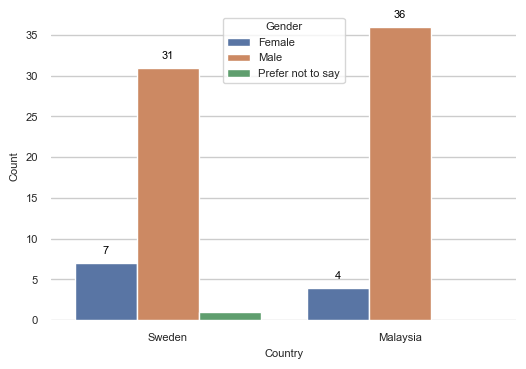

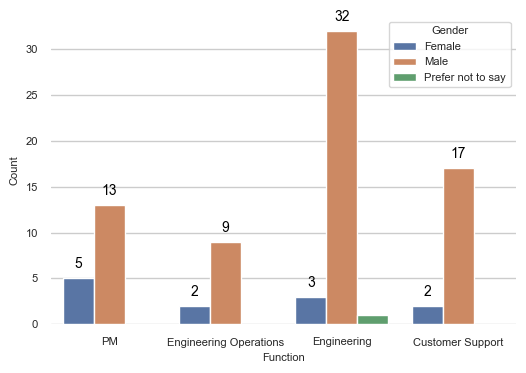

In [ ]:
df_gender_summary_by_function = df_active.groupby(['function','gender'])['gender'].size().reset_index(name='count')

# Group by "function" and calculate the total count for each function
df_gender_summary_by_function['total'] = df_gender_summary_by_function.groupby('function')['count'].transform('sum')

# Calculate the percentage
df_gender_summary_by_function['percentage'] = (df_gender_summary_by_function['count'] / df_gender_summary_by_function['total'])

# Optional: Round the percentage to 0 decimal places
#df_gender_summary_by_function['percentage'] = df_gender_summary_by_function['percentage'].round(2)

# Drop the 'total' column if you don't need it
#df = df.drop('total', axis=1)

print("\nGender distribution by function at ProdTech: (excluding departments with less than 3 people)")


# Exclude functions with less than 3 rows
df_gender_summary_by_function = df_gender_summary_by_function[df_gender_summary_by_function['total'] >= 3]

display(df_gender_summary_by_function[['function','total','gender','count','percentage']]
        .style
        .format(format_mapping)
        .hide(axis='index') 
        .applymap(highlight_female, subset=['gender'])
        )

# Filter df_active to exclude functions with less than 3 rows
function_counts = df_active['function'].value_counts()
filtered_df_active = df_active[df_active['function'].isin(function_counts[function_counts >= 3].index)]

plt.figure(figsize=(6, 4))
plot = sns.countplot(x="function", data=filtered_df_active, hue="gender")
plot.bar_label(
    plot.containers[0],
    label_type="edge",
    color="black",
    rotation=0,
    fontsize=10,
    padding=5,
)
plot.bar_label(
    plot.containers[1],
    label_type="edge",
    color="black",
    rotation=0,
    fontsize=10,
    padding=5,
)
plot.spines["top"].set_visible(False)
plot.spines["right"].set_visible(False)
plot.spines["bottom"].set_visible(False)
plot.spines["left"].set_visible(False)

# Set the font size for all elements: labels, title, and legend
plt.xticks(fontsize=8) # For x-axis tick labels
plt.yticks(fontsize=8) # For y-axis tick labels
plt.xlabel('Function',fontsize=8) # For x-axis label
plt.ylabel('Count', fontsize=8) # For y-axis label
#plt.title('Title of the Plot', fontsize=8) # For plot title
plt.legend(title='Gender', title_fontsize='8', fontsize='8') # For legend

plt.show()

__COMMENT:__

<div class="alert alert-warning">We have an obvious and well-known gender diversity gap in ProdTech (at least outside of PM)</div>


## Age distribution
### Overall age distribution

In [ ]:
     
print("Median age at ProdTech: [", 
      '\033[1m' + '{:,.0f}'.format(df_active['age'].median()) + '\033[0m',
      "years ] \n")

#print("NOTE:\n\
#- 25% is the 25th percentile or 1st quartile, the value under which 25% of the observations fall under.\n\
#- 50% is the median.\n\
#- 75% is the 3rd quartile, the value indicates the value below which 75% of the observations in a dataset fall\n\
#- std is the standard deviation, a measure of how spread the values are: the higher the number, the more dispersion, the fatter the base of the bell curve will be.\n")
 
#df_active['age'].describe()
df_active['age'].describe().apply(lambda x: round(x)).astype(int)

print("\nAge statistics by country:")
grouped_df = df_active.groupby('country')
display(grouped_df['age'].describe()[['count','mean','min','max']])

print("\nAge statistics by function:")
grouped_df = df_active.groupby('function')
display(grouped_df['age'].describe()[['count','mean','min','max']])



Median age at ProdTech: [ 38 years ] 


Age statistics by country:


,count,mean,min,max
country,,,,
Bulgaria,2.00,45.50,38.00,53.00
Denmark,1.00,37.00,37.00,37.00
Japan,1.00,42.00,42.00,42.00
Malaysia,41.00,37.02,25.00,55.00
Poland,1.00,43.00,43.00,43.00
Sweden,46.00,40.52,26.00,63.00



Age statistics by function:


,count,mean,min,max
function,,,,
Customer Support,19.00,38.53,25.00,55.00
Engineering,44.00,37.93,26.00,63.00
Engineering Operations,11.00,38.64,29.00,51.00
PM,17.00,43.18,32.00,61.00
Security,1.00,35.00,35.00,35.00


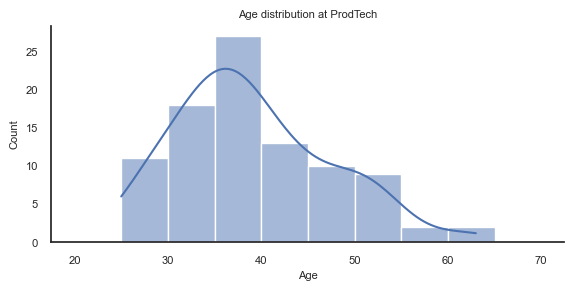

In [ ]:
#import seaborn as sns
#import matplotlib.pyplot as plt
#%matplotlib inline

# need to call set_theme for Seaborn to take over matplotlib
#plt.close()
#plt.figure(figsize=(10, 10))

# Create a figure and axes with the desired size
#fig, ax = plt.subplots(figsize=(10, 6))  # width=10 inches, height=6 inches

sns.set_theme(style="white")

plot = sns.displot(df_active, x="age", bins=[20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70], 
                   kde=True, palette="bright", height=3, aspect=2)
#plot.set(xlabel ="Age", ylabel = "Count", title ='Age distribution at ProdTech')

# Set the font size for all elements: labels, title, and legend
plt.xticks(fontsize=8) # For x-axis tick labels
plt.yticks(fontsize=8) # For y-axis tick labels
plt.xlabel('Age',fontsize=8) # For x-axis label
plt.ylabel('Count', fontsize=8) # For y-axis label
plt.title('Age distribution at ProdTech', fontsize=8) # For plot title
#plt.legend(title='Gender', title_fontsize='8', fontsize='8') # For legend

plt.show()



### Age by country

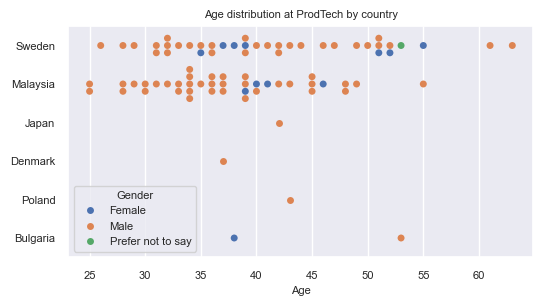

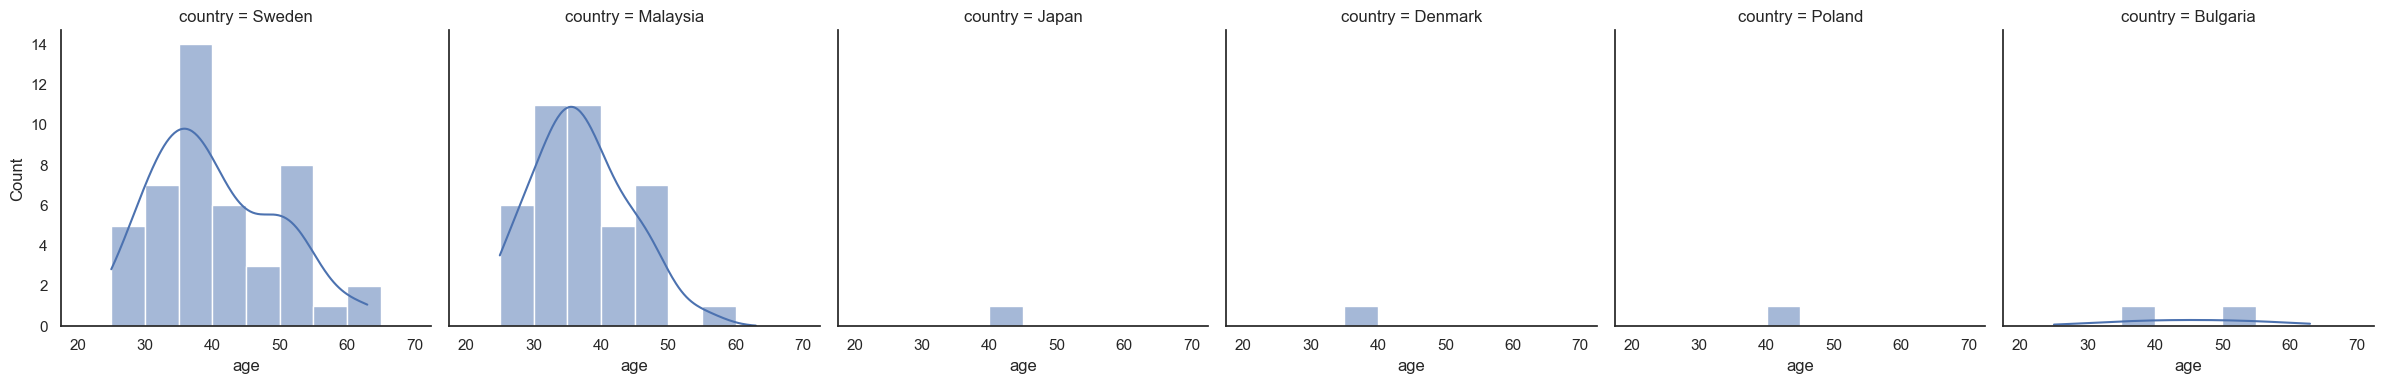

In [ ]:
plt.figure(figsize=(6, 3))
sns.set_theme()
# Draw a categorical scatterplot to show each observation
ax = sns.swarmplot(data=df_active, x="age", y="country", hue="gender")
ax.set(ylabel="")

# Set the font size for all elements: labels, title, and legend
plt.xticks(fontsize=8) # For x-axis tick labels
plt.yticks(fontsize=8) # For y-axis tick labels
plt.xlabel('Age',fontsize=8) # For x-axis label
#plt.ylabel('Count', fontsize=8) # For y-axis label
plt.title('Age distribution at ProdTech by country', fontsize=8) # For plot title
plt.legend(title='Gender', title_fontsize='8', fontsize='8') # For legend

plt.show()

# display age by CTO area
#plt.figure()
sns.set_theme(style="white")
#sns.set_theme(style="whitegrid")
plot = sns.displot(df_active, col="country", x="age", bins=[20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70], 
                   kde=True, palette="bright", facet_kws=dict(margin_titles=True), height=4, aspect=1)
#plot.set(xlabel ="Age", ylabel = "Count", hue="function", title ='Age distribution for ProdTech')
plt.show()


__COMMENT:__

<div class="alert alert-success">While the median age seems a bit high, the distribution is quite uniform and a good sign that there is a path for everyone</div>


In [ ]:
## THESE ARE PRETTY GRAPHS BUT NOT ADDING ANYTHING HERE
# graph age distribution per country

#from matplotlib import cm
#%matplotlib inline

#plt.figure()
#print("Age distribution for ProdTech - per country")
#colors = ["#FDAE61", "#FEE08B", "#FFFFBF", "#E6F598", "#ABDDA4"]
#fig, ax = joypy.joyplot(df_active, by = "country", column = "age", colormap = cm.Pastel1, grid = True, kind = "kde", fade = True)
#plt.show()

### Age by gender

In [ ]:
# nice informative Seaborn view of age distribution per gender
#print("Age distribution for ProdTech - per gender")
#plot = sns.displot(df_active, x="age", col="gender", 
#                   bins=[20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70], 
#                   palette="bright", kde=True)


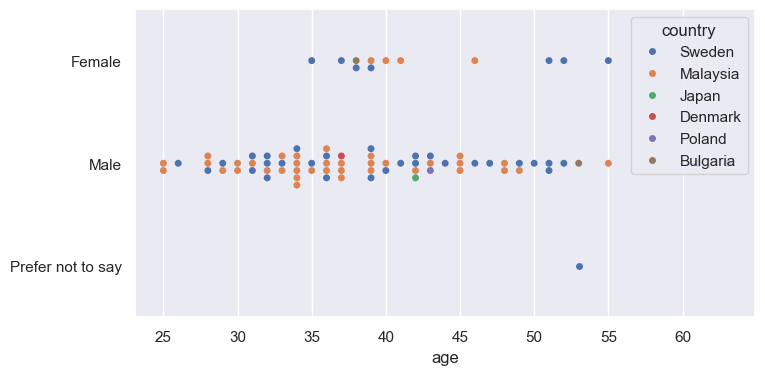

<Figure size 640x480 with 0 Axes>

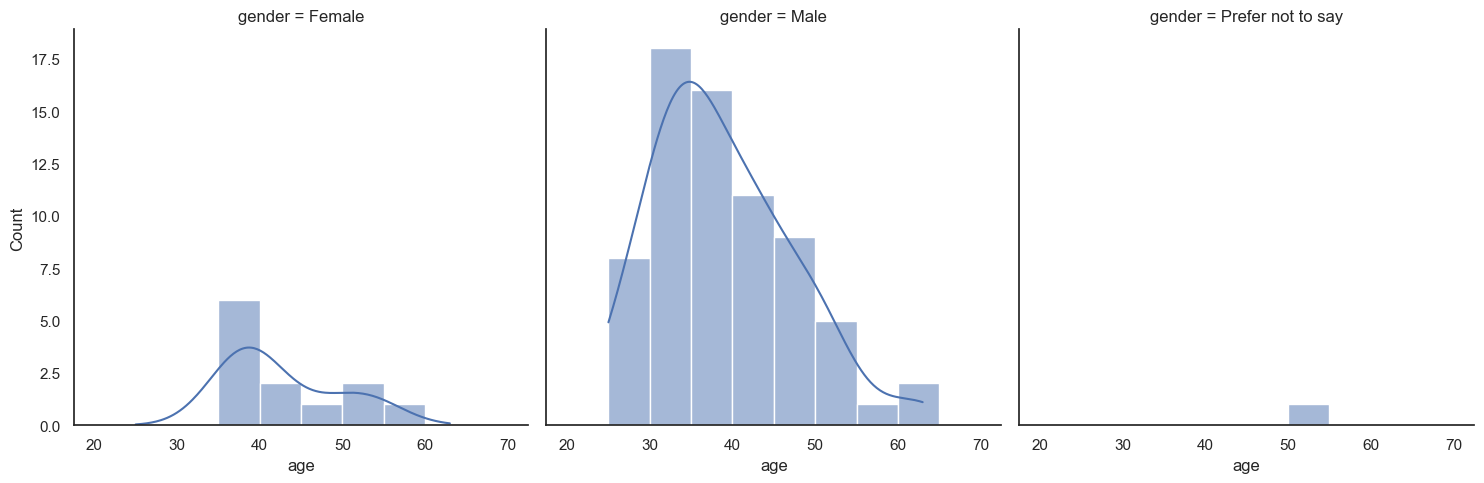

In [ ]:
plt.figure(figsize=(8, 4))
sns.set_theme()
# Draw a categorical scatterplot to show each observation
ax = sns.swarmplot(data=df_active, x="age", y="gender", hue="country")
ax.set(ylabel="")
plt.show()

# display age by CTO area
plt.figure()
sns.set_theme(style="white")
#sns.set_theme(style="whitegrid")
plot = sns.displot(df_active, col="gender", x="age", bins=[20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70], 
                   kde=True, palette="bright", facet_kws=dict(margin_titles=True))
#plot.set(xlabel ="Age", ylabel = "Count", hue="function", title ='Age distribution for ProdTech')
plt.show()



In [ ]:
## THESE ARE PRETTY GRAPHS BUT NOT ADDING ANYTHING HERE

#from matplotlib import cm
#%matplotlib inline
# graph age distribution per gender
#print("Age distribution for ProdTech - per gender")
#plt.figure()
#colors = ["#FDAE61", "#FEE08B", "#FFFFBF", "#E6F598", "#ABDDA4"]
#fig, ax = joypy.joyplot(df_active, by = "gender", column = "age", colormap = cm.Pastel1, grid = True, kind = "kde", fade = True)
#plt.show()

In [ ]:
#print("Age distribution for ProdTech - per country")
#plot = sns.displot(df_active, x="age", col="country", 
#                   bins=[20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70], 
#                   palette="bright", kde=True)

### Age by ProdTech dept

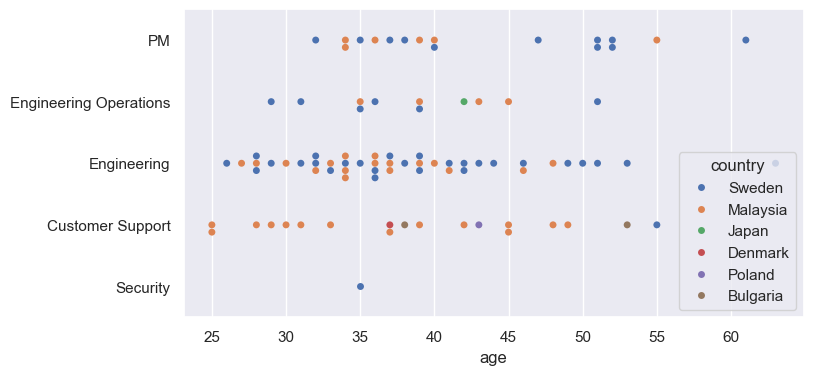

<Figure size 640x480 with 0 Axes>

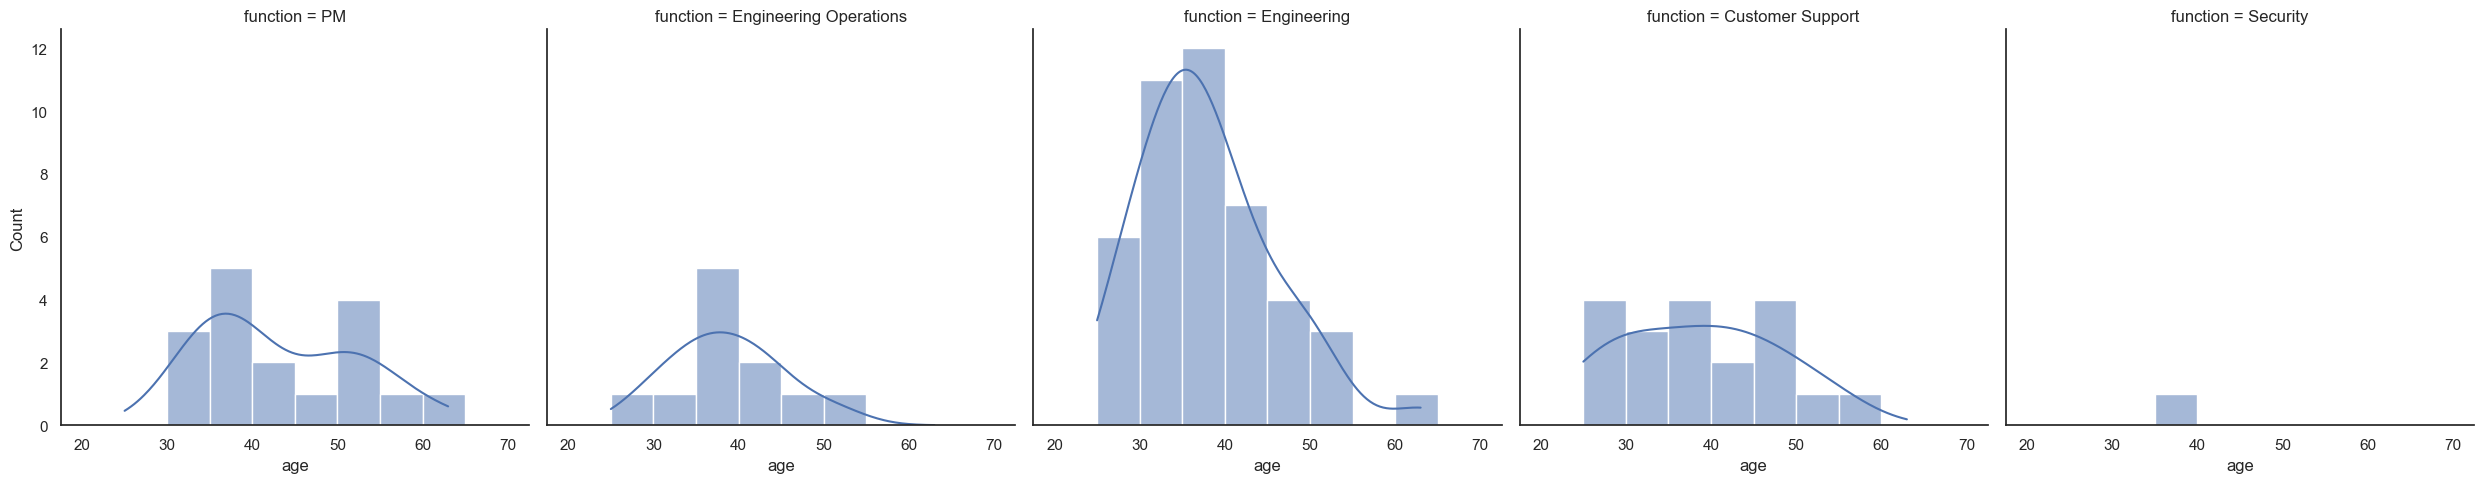

In [ ]:
plt.figure(figsize=(8, 4))
sns.set_theme()
# Draw a categorical scatterplot to show each observation
ax = sns.swarmplot(data=df_active, x="age", y="function", hue="country")
ax.set(ylabel="")
plt.show()

# display age by CTO area
plt.figure()
sns.set_theme(style="white")
#sns.set_theme(style="whitegrid")
plot = sns.displot(df_active, col="function", x="age", bins=[20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70], 
                   kde=True, palette="bright", facet_kws=dict(margin_titles=True))
#plot.set(xlabel ="Age", ylabel = "Count", hue="function", title ='Age distribution for ProdTech')
plt.show()

#plot.set_title("Age distribution") 

In [ ]:
# graph age distribution per CTO area
#from matplotlib import cm
#print("Age distribution for ProdTech - per team")
#plt.figure()
#colors = ["#FDAE61", "#FEE08B", "#FFFFBF", "#E6F598", "#ABDDA4"]
#fig, ax = joypy.joyplot(df_active, by = "function", column = "age", colormap = cm.Pastel1, grid = True, kind = "kde", fade = True)
#plt.show()


## Tenure

Median tenure at ProdTech: [ 3.0 years ] 

Tenure statistics over different categories: 



,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
Bulgaria,2.00,4.50,0.71,4.00,4.25,4.50,4.75,5.00
Denmark,1.00,10.00,NaN,10.00,10.00,10.00,10.00,10.00
Japan,1.00,14.00,NaN,14.00,14.00,14.00,14.00,14.00
Malaysia,41.00,5.85,4.25,0.00,2.00,5.00,8.00,16.00
Poland,1.00,7.00,NaN,7.00,7.00,7.00,7.00,7.00
Sweden,50.00,4.94,6.27,-1.00,1.00,2.00,5.75,23.00


,count,mean,std,min,25%,50%,75%,max
function,,,,,,,,
Customer Support,19.00,6.47,4.73,0.00,3.50,5.00,9.00,17.00
Engineering,44.00,4.48,4.93,-1.00,1.00,3.00,7.25,18.00
Engineering Operations,11.00,6.45,5.77,1.00,2.00,5.00,8.50,19.00
PM,21.00,6.38,6.65,0.00,1.00,3.00,11.00,23.00
Security,1.00,2.00,NaN,2.00,2.00,2.00,2.00,2.00


<Figure size 640x480 with 0 Axes>

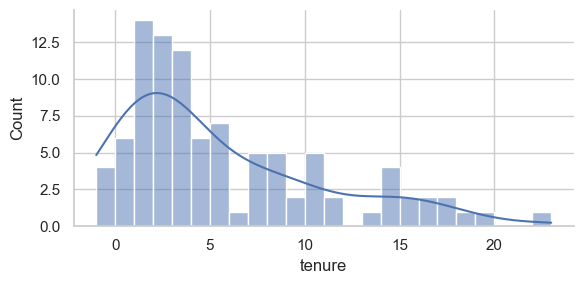

In [ ]:

def tenure(startdate):
    today = pd.to_datetime('today').normalize()
    return today.year - startdate.year - ((today.month, today.day) < (startdate.month, startdate.day))


df_active['tenure'] = df_active.start.apply(tenure)
#display(df_active[['lname','start','tenure']])

print("Median tenure at ProdTech: [", 
      '\033[1m' + '{:,.1f}'.format(df_active['tenure'].median()) + '\033[0m',
      "years ] \n")

print("Tenure statistics over different categories: \n")
df_active['tenure'].describe()
grouped_df = df_active.groupby('country')
display(grouped_df['tenure'].describe())
grouped_df = df_active.groupby('function')
display(grouped_df['tenure'].describe())

# display tenure across ProdTech
plt.figure()
sns.set_theme(style="whitegrid")
plot = sns.displot(df_active, x="tenure", binwidth=1,
                   kde=True, palette="bright", facet_kws=dict(margin_titles=True), height=3, aspect=2)
#plot.set(xlabel ="Tenure (years)", ylabel = "Count", title ='Tenure at ProdTech')
plt.show()


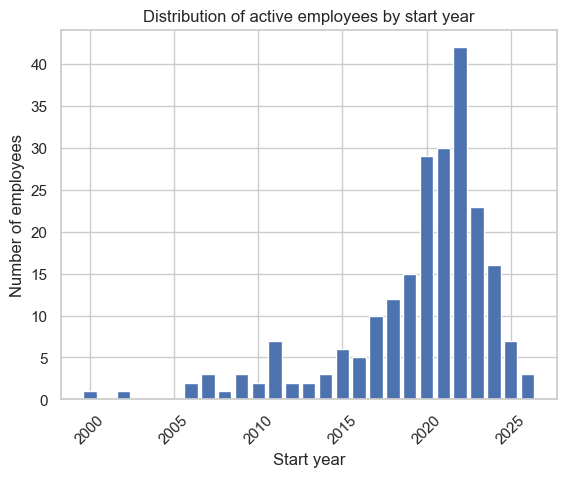

In [ ]:
## DISPLAY A GRAPH SHOWING THE DISTRIBUTION OF ACTIVE EMPLOYEES BY START YEAR
####### HERE!!!!!!

import pandas as pd
import matplotlib.pyplot as plt

# Convert the "start" column to datetime format
df['start'] = pd.to_datetime(df['start'])

# Extract the year from the "start" column
df['start_year'] = df['start'].dt.year

# Group the employees by start year and count the number of employees in each year
start_year_counts = df['start_year'].value_counts().sort_index()

# Create the bar chart
plt.bar(start_year_counts.index, start_year_counts.values)

# Set the labels and title
plt.xlabel('Start year')
plt.ylabel('Number of employees')
plt.title('Distribution of active employees by start year')

# Rotate the x-axis labels if needed

plt.xticks(rotation=45)

# Show the plot
plt.show()


In [ ]:
## USING DESCRIBE() TO GET STATISTICS ABOUT A DATAFRAME
## to describe string fields
#df_active.describe(include = [object])
## to describe numerical fields
#df_active.describe(include = [np.number])
## to describe category fields (i.e. fields with few unique values)
#df_active.describe(include = ['category'])
#df_active.country.describe(include = ['country'])

In [ ]:

#Other Classes available from Jupyter Themes
#Green Background
#<div class="alert alert-success">success</div>
#Blue Background
#<div class="alert alert-info">info</div>
#Yellow Background
#<div class="alert alert-warning">warning</div>
#Red Background
#<div class="alert alert-danger">danger</div>


### Tenure by country (excl. countries with less than 3 people)

<Figure size 640x480 with 0 Axes>

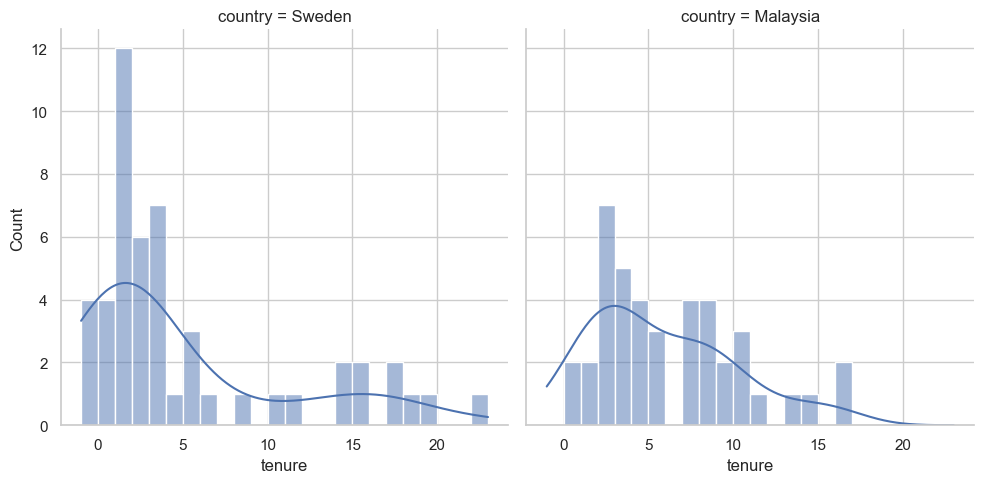

In [ ]:
# display tenure by country, excluding countries with less than 3 people
plt.figure()
sns.set_theme(style="whitegrid")

# Filter df_active to exclude countries with less than 3 people
country_counts = df_active['country'].value_counts()
filtered_df_active = df_active[df_active['country'].isin(country_counts[country_counts >= 3].index)]

plot = sns.displot(filtered_df_active, col="country", x="tenure", binwidth=1,
                   kde=True, palette="bright", facet_kws=dict(margin_titles=True))
#plot.set(xlabel ="Tenure (years)", ylabel = "Count", title ='Tenure at ProdTech')
plt.show()

### Tenure by gender

<Figure size 640x480 with 0 Axes>

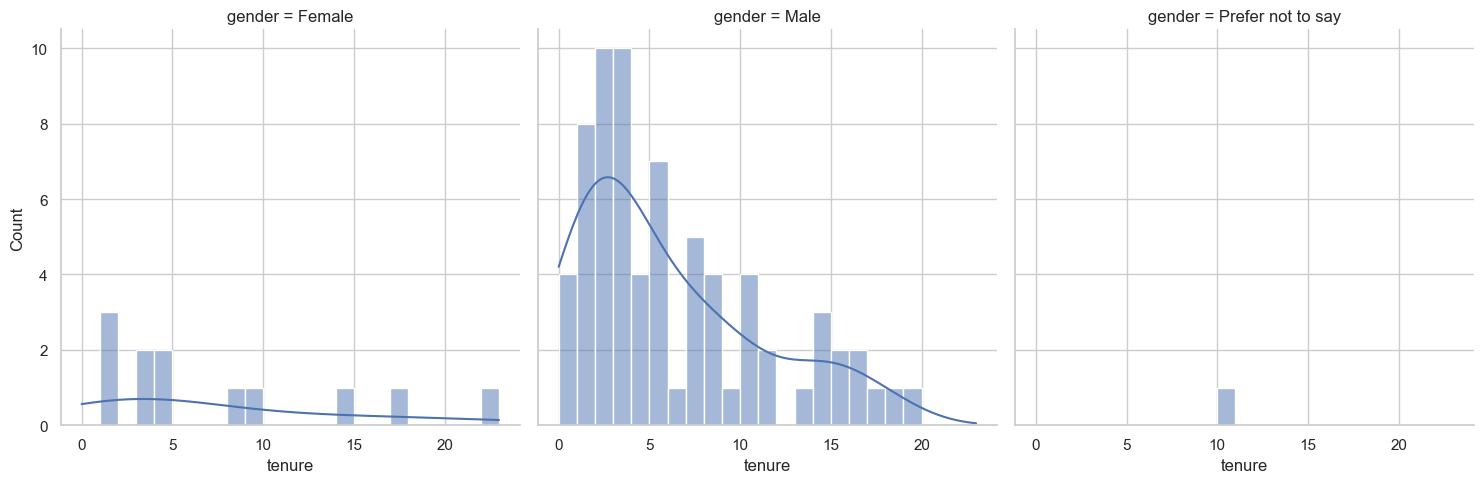

In [ ]:
# display tenure by gender
plt.figure()
sns.set_theme(style="whitegrid")
plot = sns.displot(df_active, col="gender", x="tenure", binwidth=1,
                   kde=True, palette="bright", facet_kws=dict(margin_titles=True))
#plot.set(xlabel ="Tenure (years)", ylabel = "Count", title ='Tenure at ProdTech')
plt.show()

### Tenure by ProdTech department (excl. depts with less than 3 people)

<Figure size 640x480 with 0 Axes>

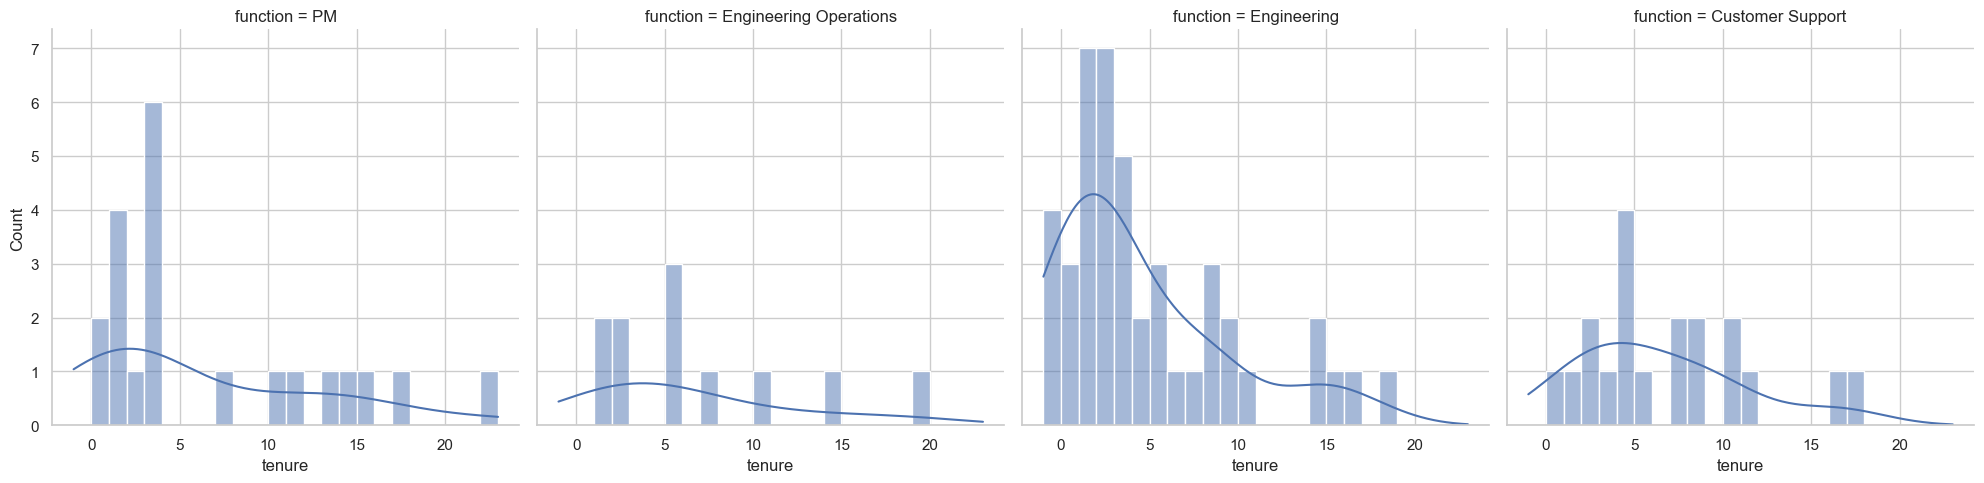

In [ ]:
# Filter df_active to exclude functions with less than 3 people
function_counts = df_active['function'].value_counts()
filtered_df_active = df_active[df_active['function'].isin(function_counts[function_counts >= 3].index)]

# Display tenure by CTO area
plt.figure()
sns.set_theme(style="whitegrid")
plot = sns.displot(filtered_df_active, col="function", x="tenure", binwidth=1,
                   kde=True, palette="bright", facet_kws=dict(margin_titles=True))
#plot.set(xlabel ="Tenure (years)", ylabel = "Count", title ='Tenure at ProdTech')
plt.show()

### Tenure by Scrum team

<Figure size 640x480 with 0 Axes>

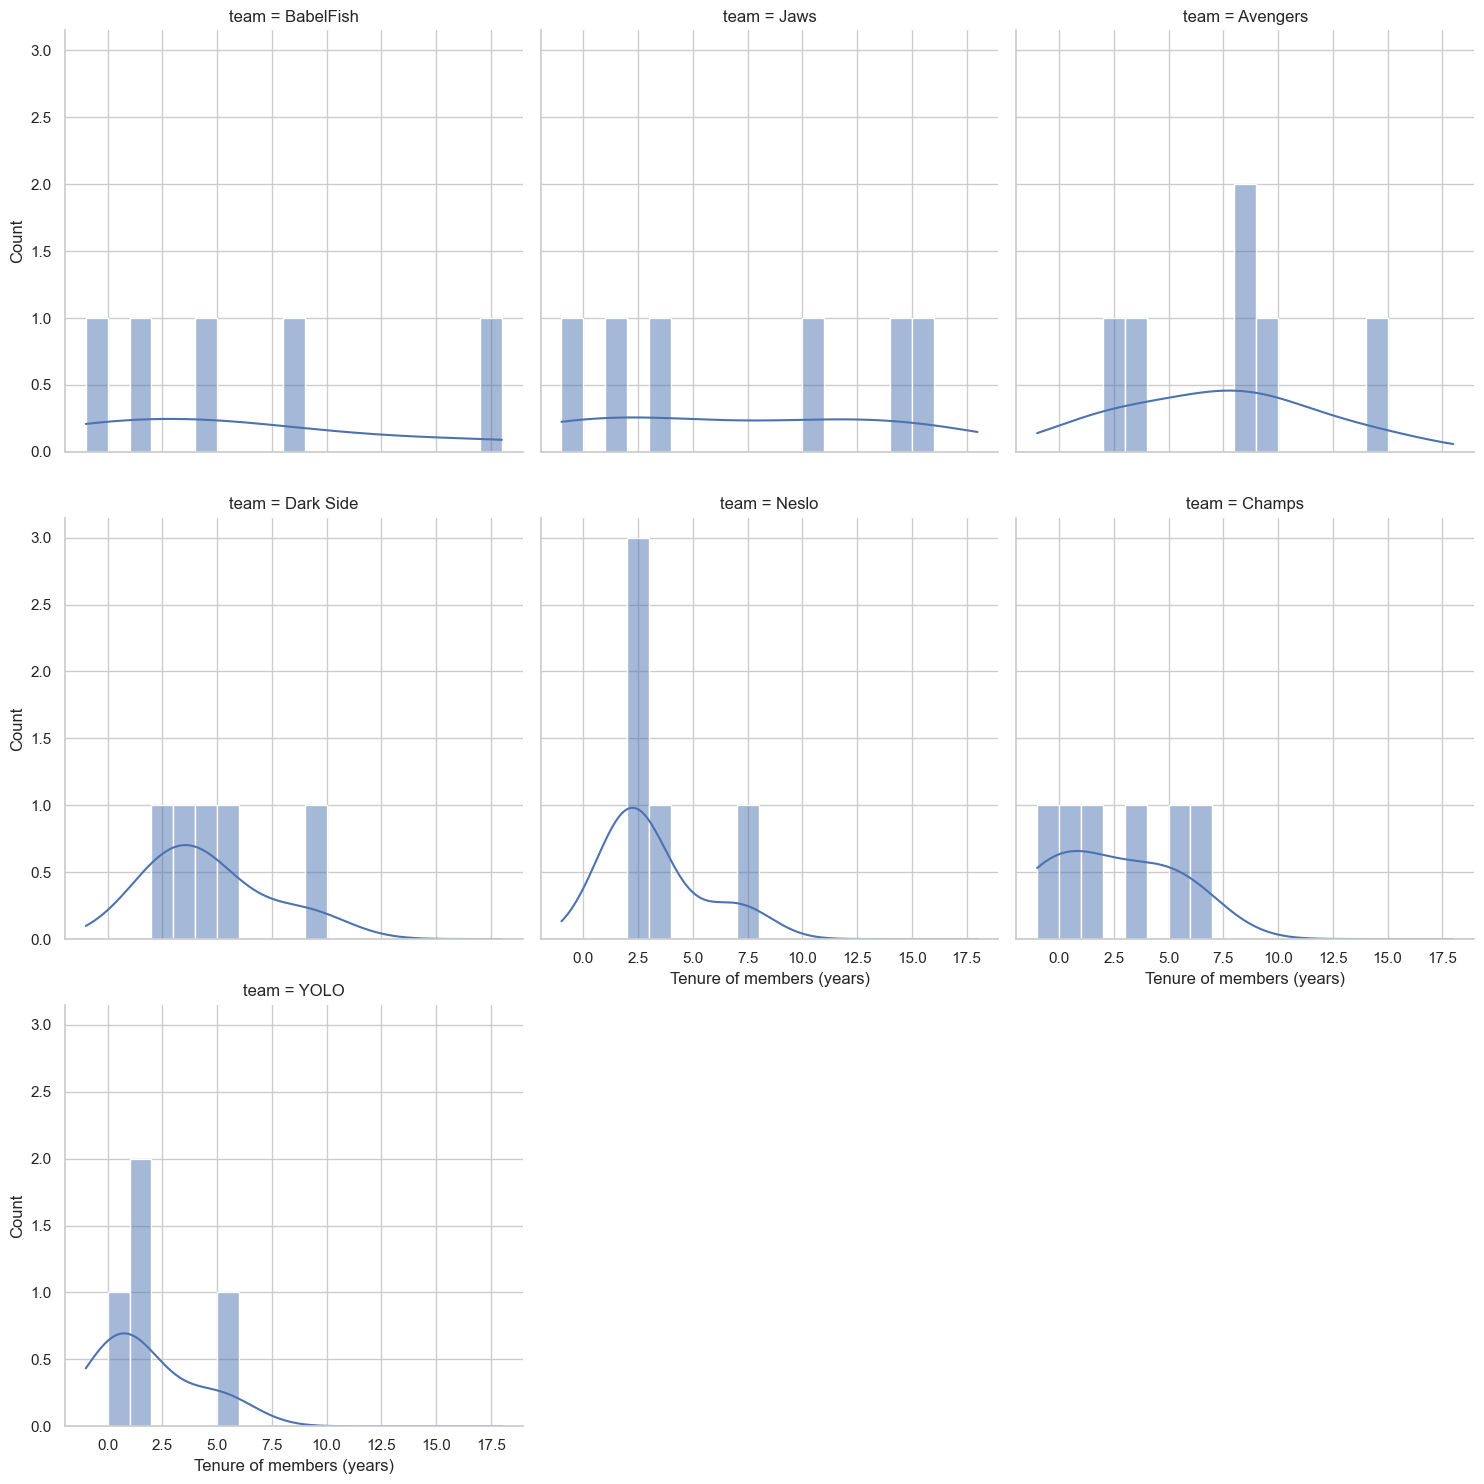

In [ ]:
# display tenure by team
plt.figure()
sns.set_theme(style="whitegrid")
plot = sns.displot(
    df_active,
    col="team",
    x="tenure",
    col_wrap=3,
    binwidth=1,
    kde=True,
    palette="bright",
    facet_kws=dict(margin_titles=True),
)
plot.set(xlabel="Tenure of members (years)", ylabel="Count")
plt.show()

### Shortest and longest tenured employees

In [ ]:
print("\nEmployees with longest tenure (in years):")
display(
    df_active[["fname", "lname", "start", "gender", "tenure"]]
    .sort_values(by=["start"], ascending=True)
    .head(10)
)

print("\nMost recent joiners:")
display(
    df_active[["fname", "lname", "start", "tenure"]]
    .sort_values(by=["start"], ascending=True)
    .tail(10)
)


Employees with longest tenure (in years):


,fname,lname,start,gender,tenure
1,Sandra,Dusic,2002-01-07,Female,23
2,Johan,Olsson,2006-02-20,Male,19
5,David,Sjölin,2007-06-11,Male,18
6,Mia,Myrkheimr,2007-12-12,Female,17
7,Johan,Bjärås,2008-07-15,Male,17
8,Alan Jyh Uei,Chew,2009-09-01,Male,16
9,Hafizzy,Mhod Shubari,2009-09-28,Male,16
11,Lars,Månsson,2010-07-05,Male,15
12,Peter,Martinsson,2010-08-09,Male,15
13,Jenni,Wallin,2011-04-01,Female,14



Most recent joiners:


,fname,lname,start,tenure
214,Pasquale,Ferraro,2024-12-02,0
216,Nirosan,Silvaratnam,2025-02-03,0
217,Andrii,Bezzub,2025-03-24,0
218,Sebastian,Jörgensen,2025-05-05,0
219,Shashank,Kumar Sahu,2025-05-08,0
220,Nimal Paran,Achuthan,2025-07-15,0
221,Aleksandr,Khorev,2025-12-15,-1
222,Najam Shehzad,Butt,2026-01-07,-1
223,Anatolii,Starkov,2026-01-07,-1
224,Andreas,Aronsson,2026-01-12,-1


# MANAGEMENT STRUCTURE

## Departments, functions and teams

In DigiPeople, we have the following fields:
* __function__ = CTO team areas (Engineering, PM, etc)
* __department__ = no consistent use, sometimes products, sometimes others. A mess.
* __team__ = scrum team, not populated for everyone, mostly just used by engineering.

Here are the various values encountered in DigiPeople for these:

In [ ]:
# SOME KIND OF ORG CHART?

#df_active_org = df_active
#df_active_org['fullname']=df_active_org.lname+', '+df_active_org.fname
#df_active_org['value']=1
#display(df_active_org)

#fig = px.sunburst(
#    df_active,
#    names='fullname',
#    parents='manager',
#    values='value',
#)

#fig.show()




In [ ]:
#df_raw.Department.value_counts().sort_index()
df_active.dept.value_counts().sort_values()

dept
Support Quality Management                            1
Product Management Mediation Zone/Private Edition     3
Product Management Cloud Edition                      3
Design                                                3
DOT                                                   5
Doc                                                   5
SRE                                                   5
L2 AMER/EMEA                                          5
L3 EMEA/APAC                                          5
L1 APAC/EMEA                                          7
CE                                                   18
MZ                                                   25
Name: count, dtype: int64

In [ ]:
df_active.function.value_counts().sort_values()

function
Security                   1
Engineering Operations    11
Customer Support          19
PM                        21
Engineering               44
Name: count, dtype: int64

In [ ]:
df_active.team.value_counts().sort_values()

team
YOLO         4
BabelFish    5
Dark Side    5
Neslo        5
Jaws         6
Avengers     6
Champs       6
Name: count, dtype: int64

## Scrum teams composition

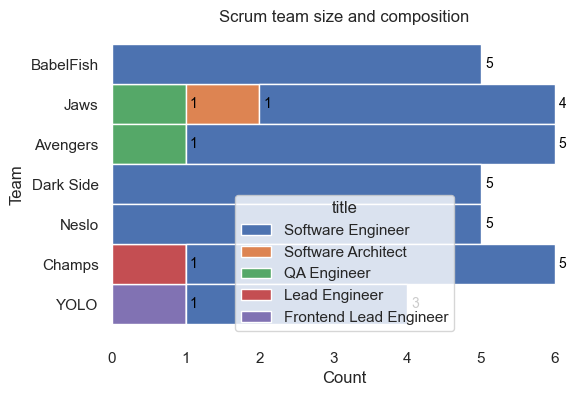

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

dfTT = df_active[df_active.team.notnull()]

plt.figure(figsize=(6, 4))
# stacked bar chart alternative view of prior chart
plot = sns.histplot(
    dfTT, y="team", hue="title", alpha=1, palette="deep", multiple="stack"
)

plot.set(xlabel="Count", ylabel="Team", title="Scrum team size and composition")

# Add total team size as a label to the right of each bar, but only if the value is not zero
for container in plot.containers:
    labels = [f'{int(v.get_width())}' if v.get_width() > 0 else '' for v in container]
    plot.bar_label(container, labels=labels, label_type='edge', padding=3, fontsize=10, color='black')

plot.spines["top"].set_visible(False)
plot.spines["right"].set_visible(False)
plot.spines["bottom"].set_visible(False)
plot.spines["left"].set_visible(False)

# Move legend box further to the right and make it smaller with smaller font
#plot.legend(loc='lower right', fontsize='small', title_fontsize='small')

plt.show()


In [ ]:
print("List of teams and their members \n")
# print the full list of people in each team

# start by looking only at records that have team set
# use this to get the list of active employees with no team info
# display(df_active[['lname','team','function']][df_active.team.isnull()])

# TODO: set a team for all these people in DigiPeople...

#display(dfTT.groupby(['product','team']))

#df_teams_sizes_per_country_function.fillna('', inplace=True)
#df_teams_sizes_per_country_function.style.set_properties(**{'text-align': 'center'})
# Adding a total row
#df_teams_sizes_per_country_function.loc['Total'] = df_teams_sizes_per_country_function.sum()
#display(df_teams_sizes_per_country_function.iloc[:,:4]) # shows all rows (:) but only first 4 columns
#display(df_teams_sizes_per_country_function)

#df_avg_salaries_country_function_year = df_active.groupby(['country','function','start_year'])['salary_sek'].median().unstack()


for x in dfTT.team.unique():
    # dfTT = dfTT[dfTT.team.notnull()]
    df_temp = dfTT[dfTT.team.str.startswith(x)]
    df_temp.style.format(na_rep="")
    #print(x, "- team members", ":", len(df_temp), ", mean tenure: ", df_temp['tenure'].mean(), " years\n")

    print(x, "- team members", ":", len(df_temp), ", mean tenure: ", round(df_temp['tenure'].mean(), 1), " years\n")

    display(df_temp[["lname", "fname", "gender", "title", "city", "country", "tenure"]]
            .style
            .format(format_mapping)
            .hide(axis='index') 
            .applymap(highlight_female, subset=['gender'])
            .highlight_null(subset=['gender'], color='lightgrey')
            #.highlight_max(subset=['tenure'], color='lightgreen')
            #.highlight_min(subset=['tenure'], color='pink')
            ## more colormaps: https://matplotlib.org/stable/users/explain/colors/colormaps.html#choosing-colormaps   
            #.background_gradient(subset=['tenure'], cmap='BuGn')
            #.bar(color='#FFA07A', vmin=100_000, subset=['tenure'], align='zero')
            ## more colors: https://matplotlib.org/stable/gallery/color/named_colors.html#sphx-glr-gallery-color-named-colors-py
            .bar(color='lightgrey', vmin=0, subset=['tenure'], align='zero')
            #.set_caption('Cost per CC')
            )
    # display(dfT[['lname','fname','country']])
    print("\n")

#print("People not attached to a Scrum team (expected for most functions outside of development and QA): ")
#display(df_active[["lname", "fname", "team", "function", "title"]][df_active.team.isnull()].sort_values(by=["function", "title"]))


List of teams and their members 

BabelFish - team members : 5 , mean tenure:  6.0  years



lname,fname,gender,title,city,country,tenure
Sjölin,David,Male,Software Engineer,Gothenburg,Sweden,18
Cholewa,Michal,Male,Software Engineer,Stockholm,Sweden,8
Bangalore,Karthik,Male,Software Engineer,Stockholm,Sweden,4
Kumar,Satyendra,nan,Software Engineer,Stockholm,Sweden,1
Starkov,Anatolii,nan,Software Engineer,Stockholm,Sweden,-1




Jaws - team members : 6 , mean tenure:  7.0  years



lname,fname,gender,title,city,country,tenure
Martinsson,Peter,Male,Software Engineer,Gothenburg,Sweden,15
Eliasson,Anders,Male,Software Engineer,Stockholm,Sweden,14
Lundström,Mattias,Prefer not to say,Software Architect,Gothenburg,Sweden,10
Pereira,Manuel,Male,QA Engineer,Gothenburg,Sweden,3
Edrisameri,Mansour,Male,Software Engineer,Gothenburg,Sweden,1
Aronsson,Andreas,nan,Software Engineer,Gothenburg,Sweden,-1




Avengers - team members : 6 , mean tenure:  7.3  years



lname,fname,gender,title,city,country,tenure
Siow,Wei Siong,Male,Software Engineer,Kuala Lumpur,Malaysia,14
Chong,Chooi San,Female,QA Engineer,Kuala Lumpur,Malaysia,9
Teng,Chee Hove,Male,Software Engineer,Kuala Lumpur,Malaysia,8
Au Yong,Yuri Yude Luan,Female,Software Engineer,Kuala Lumpur,Malaysia,8
Ewe,Andrew Wooi Gan,Male,Software Engineer,Kuala Lumpur,Malaysia,3
Koh,Kevin Wei Keung,Male,Software Engineer,Kuala Lumpur,Malaysia,2




Dark Side - team members : 5 , mean tenure:  4.6  years



lname,fname,gender,title,city,country,tenure
Choy,Kam Heng,Male,Software Engineer,Kuala Lumpur,Malaysia,9
Chin,Eujun,Male,Software Engineer,Kuala Lumpur,Malaysia,5
Leong,Chui Li,Female,Software Engineer,Kuala Lumpur,Malaysia,4
Sulaiman,Hazren Saufi,Male,Software Engineer,Kuala Lumpur,Malaysia,3
Chee,Chem Zing,Male,Software Engineer,Kuala Lumpur,Malaysia,2




Neslo - team members : 5 , mean tenure:  3.2  years



lname,fname,gender,title,city,country,tenure
Tan,Ronnie Kang Leong,Male,Software Engineer,Kuala Lumpur,Malaysia,7
Lam,Jee Meng,Male,Software Engineer,Kuala Lumpur,Malaysia,3
Abdul Latiff,Rizman Hariz,Male,Software Engineer,Kuala Lumpur,Malaysia,2
Phua,Chai Shawn,nan,Software Engineer,Kuala Lumpur,Malaysia,2
Teh,Davion Eng Hoe,Male,Software Engineer,Kuala Lumpur,Malaysia,2




Champs - team members : 6 , mean tenure:  2.3  years



lname,fname,gender,title,city,country,tenure
Brandvik,Jonas,Male,Lead Engineer,Stockholm,Sweden,6
Hallgren,Carl-Axel,Male,Software Engineer,Stockholm,Sweden,5
Gholamzadeh,Babak,Male,Software Engineer,Stockholm,Sweden,3
Ilangakoon Mudiyanselage,Mihindu Pramantha De Ranasinghe,Male,Software Engineer,Stockholm,Sweden,1
Bezzub,Andrii,nan,Software Engineer,Stockholm,Sweden,0
Butt,Najam Shehzad,nan,Software Engineer,Stockholm,Sweden,-1




YOLO - team members : 4 , mean tenure:  1.8  years



lname,fname,gender,title,city,country,tenure
dos Santos Alves,Alex,Male,Software Engineer,Stockholm,Sweden,5
Krishnan,Harish,Male,Software Engineer,Stockholm,Sweden,1
Kaushik,Manu,Male,Frontend Lead Engineer,Stockholm,Sweden,1
Ferraro,Pasquale,Male,Software Engineer,Stockholm,Sweden,0


## Managers and their reports

People managers at ProdTech [  11 ]


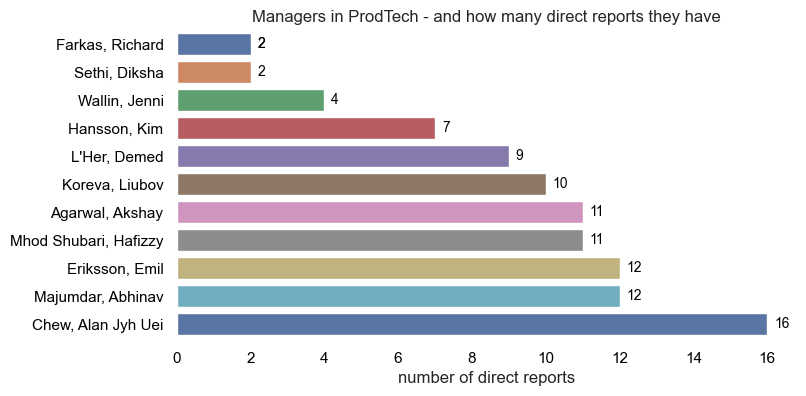

In [ ]:
# find all managers, extract discrete values, count the number of reports and sort the resulting series 
# note: it's not a dataframe but a series!


sf = df_active.manager.value_counts().sort_index()
#display(sf.dtypes)

print("People managers at ProdTech [ ",
      '\033[1m' + str(len(df_active.manager.value_counts())) + '\033[0m',
      "]")

# convert the series to a dataframe, using the index names as values for first column
df_managers=pd.DataFrame({'manager':sf.index, 'count':sf.values})

# sort the dataframe based on count of reports
df_managers = df_managers.sort_values(by=['count'], ascending=True)

plt.figure(figsize=(8, 4)) #creates a figure with width 8 inches and height 6 inches 12.
sns.set_theme(style="white")
plot = sns.barplot(data = df_managers, y="manager", x="count", orient="h", palette="deep")
plot.set(xlabel = "number of direct reports", ylabel="", title ='Managers in ProdTech - and how many direct reports they have')
# the below option is useful for slanted display of long X labels
#plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
plot.bar_label(plot.containers[0], label_type='edge', color='black', rotation=0, fontsize=10, padding=5)
plot.spines['top'].set_visible(False)
plot.spines['right'].set_visible(False)
plot.spines['bottom'].set_visible(False)
plot.spines['left'].set_visible(False)
plot.tick_params(labelcolor='black')
# Add data labels (number of reports) to the end of each data bar
for container in plot.containers:
      plot.bar_label(container, label_type='edge', color='black', fontsize=10, padding=5)

plt.show()


In [ ]:
 
# print the full list of reports for each manager
#for x in df_managers.manager:   
#    dfT = df[df.function.notnull()]
#    dfT = df_active[df_active.manager.str.startswith(x)]
#    dfT.style.format(na_rep='')
#    dfT = dfT.sort_values(by=['country', 'lname', 'fname'], ascending=True)
#    #dfT = dfT.sort_values('lname', ascending=True)
#    print(x,'- direct reports',":",
#      len(dfT),"\n") 
#    display(HTML(dfT[['lname','fname','country']].to_html(index=False)))
    #display(dfT[['lname','fname','country']])
#    print("\n")

# JOB TITLES

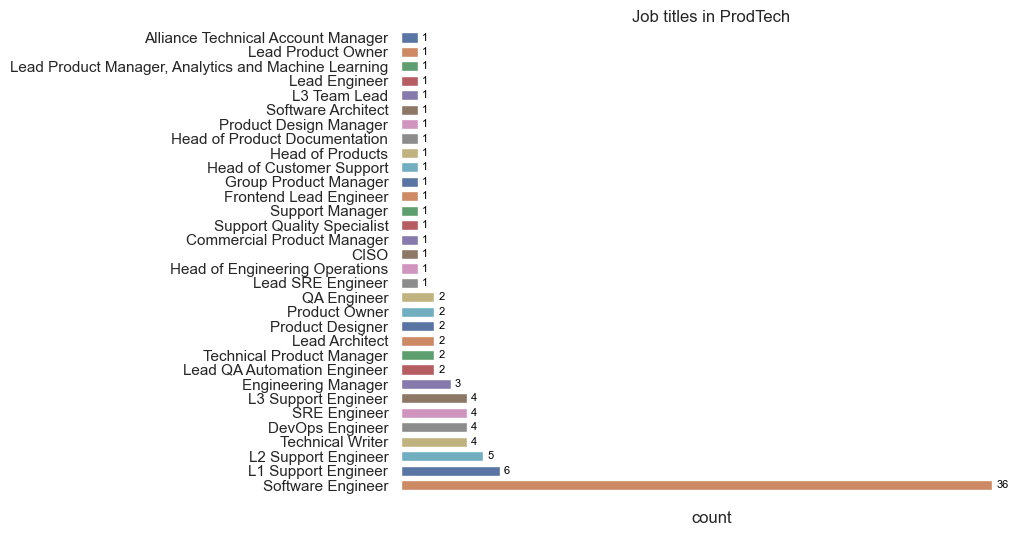

Job titles and counts per CTO function

function = PM
total team members: 21


,count
title,
Technical Writer,4
Software Engineer,3
Product Designer,2
Product Owner,2
Technical Product Manager,2
Alliance Technical Account Manager,1
Commercial Product Manager,1
Group Product Manager,1
Head of Product Documentation,1



Number of discrete job titles in use at ProdTech: 32
Percentage of job titles with only one person: 56.2%
Average number of people per job title: 3.0

Top 5 most common job titles:


,title,count
27,Software Engineer,36
11,L1 Support Engineer,6
12,L2 Support Engineer,5
31,Technical Writer,4
3,DevOps Engineer,4



function = Engineering Operations
total team members: 11


,count
title,
DevOps Engineer,4
SRE Engineer,4
Head of Engineering Operations,1
Lead SRE Engineer,1
Software Engineer,1



Number of discrete job titles in use at ProdTech: 32
Percentage of job titles with only one person: 56.2%
Average number of people per job title: 3.0

Top 5 most common job titles:


,title,count
27,Software Engineer,36
11,L1 Support Engineer,6
12,L2 Support Engineer,5
31,Technical Writer,4
3,DevOps Engineer,4



function = Engineering
total team members: 44


,count
title,
Software Engineer,32
Engineering Manager,3
Lead Architect,2
Lead QA Automation Engineer,2
QA Engineer,2
Frontend Lead Engineer,1
Lead Engineer,1
Software Architect,1



Number of discrete job titles in use at ProdTech: 32
Percentage of job titles with only one person: 56.2%
Average number of people per job title: 3.0

Top 5 most common job titles:


,title,count
27,Software Engineer,36
11,L1 Support Engineer,6
12,L2 Support Engineer,5
31,Technical Writer,4
3,DevOps Engineer,4



function = Customer Support
total team members: 19


,count
title,
L1 Support Engineer,6
L2 Support Engineer,5
L3 Support Engineer,4
Head of Customer Support,1
L3 Team Lead,1
Support Manager,1
Support Quality Specialist,1



Number of discrete job titles in use at ProdTech: 32
Percentage of job titles with only one person: 56.2%
Average number of people per job title: 3.0

Top 5 most common job titles:


,title,count
27,Software Engineer,36
11,L1 Support Engineer,6
12,L2 Support Engineer,5
31,Technical Writer,4
3,DevOps Engineer,4



function = Security
total team members: 1


,count
title,
CISO,1



Number of discrete job titles in use at ProdTech: 32
Percentage of job titles with only one person: 56.2%
Average number of people per job title: 3.0

Top 5 most common job titles:


,title,count
27,Software Engineer,36
11,L1 Support Engineer,6
12,L2 Support Engineer,5
31,Technical Writer,4
3,DevOps Engineer,4


In [ ]:
# create a series of data, counting the number of times a given title is found in the title column
sf_summary_title = df_active.title.value_counts().sort_index()

# convert this series to a dataframe, using the series index names as values for first column
df_summary_title = pd.DataFrame({'title':sf_summary_title.index, 'count':sf_summary_title.values})
# sort the dataframe by the count column
df_summary_title = df_summary_title.sort_values(by=['count'], ascending=True)
# alternatively: sort the df by alphabetical order
#df_summary_title = df_summary_title.sort_values(by=['title'], ascending=True)
# display using HTML so we can suppress the printing of the index column
# display(HTML(df_summary_title.to_html(index=False)))

plt.figure(figsize=(8, 6)) 
sns.set_theme(style="white")
ax = sns.barplot(df_summary_title, y="title", x="count", estimator="sum", errorbar=None, palette="deep", width=0.7)
for container in ax.containers:
    ax.bar_label(container, labels=[f'{int(v.get_width())}' for v in container], label_type='edge', color='black', rotation=0, fontsize=8, padding=3)
ax.set(xlabel = "count", ylabel="", title ='Job titles in ProdTech')
#ax.axis('off')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.get_xaxis().set_ticklabels([])

plt.show()

print("Job titles and counts per CTO function")
for x in df_active.function.unique(): 
    print("\nfunction =",'\033[1m' + x + '\033[0m')
    df_active_temp = df_active[df_active['function'] == x]
    summary_table = df_active_temp.groupby('title').agg({'title': 'count'}).rename(columns={'title': 'count'})
    #summary_table.loc[summary_table['count'] < 2, 'median_salary'] = 0
    summary_table = summary_table.sort_values(by='count', ascending=False)
    total_count = sum(summary_table['count'])
    print("total team members:", total_count)
    display(summary_table)
    
    # Calculate the number of discrete titles in use at ProdTech
    num_discrete_titles = len(df_active.title.unique())
    print("\nNumber of discrete job titles in use at ProdTech:", 
        '\033[1m' + str(num_discrete_titles) + '\033[0m')

    # Calculate percentage of titles that have only one person
    single_person_titles = df_summary_title[df_summary_title['count'] == 1]
    percent_single_person = (len(single_person_titles) / num_discrete_titles) * 100
    print("Percentage of job titles with only one person:", 
        '\033[1m' + '{:.1f}%'.format(percent_single_person) + '\033[0m')

    # Calculate average number of people per title
    avg_people_per_title = df_active.shape[0] / num_discrete_titles
    print("Average number of people per job title:", 
        '\033[1m' + '{:.1f}'.format(avg_people_per_title) + '\033[0m')

    # Show top 5 most common job titles
    print("\nTop 5 most common job titles:")
    top_titles = df_summary_title.sort_values(by=['count'], ascending=False).head(5)
    display(top_titles)

In [ ]:
#plot = sns.histplot(df_active, x="dept", hue="function", alpha=1, palette="deep", multiple="stack")

# FINANCE SECTION

## Assumptions (social charges, etc)

The below table lists the assumptions and simplifications used in our calculations.
* The "social" percentage is a rough estimate of the overhead costs for the company (pension, social, etc.), as a percentage of the base salary.
* the bonus attainment is just a guesstimate as to what our typical bonus attainment is - used to calculate overall TTC for employee and cost to company
* "months" is to take into account the fact that the annual pay in some countries (ex: Malaysia) is not 12 months but 13 months.
* "forex" is the currency exchange rates used by Finance


In [ ]:
display(ref.style.format(format_mapping))

,country,forex,social,bonus_attainment,months
currency,,,,,
BGN,Bulgaria,5.93,12%,89%,12
DKK,Denmark,1.54,45%,89%,12
EUR,Italy,11.55,45%,89%,12
JPY,Japan,0.07,45%,89%,12
MYR,Malaysia,2.44,18%,89%,13
SEK,Sweden,1.00,53%,89%,12
GBP,UK,12.90,32%,89%,12
USD,USA,10.55,23%,89%,12


__COMMENT__: 

<div class="alert alert-warning">I have no idea what social overhead to use for Italy, via Deel. This is just a placeholder for now.</div>

Currencies we pay our employees in

In [ ]:
df_active.currency.value_counts().sort_index()

currency
BGN     2
DKK     1
EUR     1
JPY     1
MYR    41
SEK    46
USD     3
Name: count, dtype: int64

## Salaries and employee costs to DR

In [ ]:
## EXPLAIN HOW THE FIELDS ARE CALCULATED

print(
    """
salary \t\t\t\t= monthly salary (in local currency)
bonus \t\t\t\t= annual bonus (in local currency)
TTC (Total Target Cash) \t= annual compensation the employee can expect (in local currency)
\t\t\t\tIt is calculated as follows:
\t\t\t\tmonthly salary * (months paid each year in the country) + annual bonus * (avg bonus attainment)
salary_sek \t\t\t= salary converted to SEK
TTC_sek \t\t\t= TTC converted to SEK
employee_cost \t\t\t= TTC_sek + social charges, i.e. total yearly cost for company (in SEK)
Note: DigiPeople uses "OTE" (On-Target Earnings) which really means "bonus" in the above definitions.
"""
)

# display(df_active[['country','currency','months','salary','bonus','TTC']].head(10))


salary 				= monthly salary (in local currency)
bonus 				= annual bonus (in local currency)
TTC (Total Target Cash) 	= annual compensation the employee can expect (in local currency)
				It is calculated as follows:
				monthly salary * (months paid each year in the country) + annual bonus * (avg bonus attainment)
salary_sek 			= salary converted to SEK
TTC_sek 			= TTC converted to SEK
employee_cost 			= TTC_sek + social charges, i.e. total yearly cost for company (in SEK)
Note: DigiPeople uses "OTE" (On-Target Earnings) which really means "bonus" in the above definitions.



In [ ]:
## CALCULATE TTC

df_active['TTC'] = np.where(df_active.bonus.notnull(), 
                            df_active.salary * df_active['currency'].map(ref['months']) + df_active.bonus* df_active['currency'].map(ref['bonus_attainment']), 
                            df_active.salary * df_active['currency'].map(ref['months']))


In [ ]:
## Now, let's create all SEK versions of salary, bonus and TTC columns (using the forex info from the ref dataframe). 

df_active['salary_sek'] = df_active['salary'] * df_active['currency'].map(ref['forex'])
df_active['bonus_sek'] = df_active['bonus'] * df_active['currency'].map(ref['forex'])
df_active['TTC_sek'] = df_active['TTC'] * df_active['currency'].map(ref['forex'])
#display(df_active[['country','currency','salary','bonus','TTC','salary_sek','bonus_sek','TTC_sek']].tail(10))

In [ ]:
# annual employee_cost to DR is the total annual salary, in SEK, of a given employee + social overhead percentage

# TODO QUESTIONS: are bonuses and Malaysia's 13th month subject to social overhead?
df_active['employee_cost'] = df_active['TTC_sek'] * (1 + df_active['currency'].map(ref['social']))

## CALCULATE BONUS TO SALARY RATIO (if bonus is not NaN)
df_active['bonus_percentage']=np.where(df_active['bonus'].notna(), df_active['bonus']/(df_active.salary*12 + df_active.bonus), np.nan)

#display(df_active[['country','salary_sek','bonus_sek','bonus_percentage','TTC_sek','employee_cost']].head(50))

In [ ]:
total_employee_cost = df_active["employee_cost"].sum()
total_salary = df_active["salary_sek"].sum()
total_bonus = df_active["bonus_sek"].sum()
avg_bonus_attainment = ref["bonus_attainment"].mean()
bonus_salary_ratio = total_bonus / (total_salary * 12 + total_bonus)

print(
    "Total annual running employee-related cost for ProdTech, assuming a full year with currently active employees (includes salaries, bonuses, social, etc.): \n"
)

print(
    "annual:",
    "\033[1m" + ("{0:,.0f} SEK".format(total_employee_cost)) + "\033[0m"
)

print("monthly:", ("{0:,.0f} SEK".format(total_employee_cost / 12)))

print("\nTotal salaries (not including bonuses) to be paid:\n")
print("annual:", ("{0:,.0f} SEK".format(total_salary * 12)))
print("monthly:", ("{0:,.0f} SEK".format(total_salary)))

print("\nTotal bonuses to be paid:\n")
print("annual, assuming 100% attainment:", ("{0:,.0f} SEK".format(total_bonus)))
print(
    "annual, using average of bonus attainment in assumption table (",
    ("{:.0%}".format(avg_bonus_attainment)),
    "):",
    ("{0:,.0f} SEK".format(total_bonus * avg_bonus_attainment)),
)
print("bonuses represent:", ("{:.0%}".format(bonus_salary_ratio)), "of total salary")
print(
    "number of ProdTech employees with bonuses: ",
    len(df_active[df_active.bonus.notnull()]),
    "(",
    ("{:.0%}".format(len(df_active[df_active.bonus.notnull()]) / len(df_active))),
    " of total)",
)

Total annual running employee-related cost for ProdTech, assuming a full year with currently active employees (includes salaries, bonuses, social, etc.): 

annual: 85,821,291 SEK
monthly: 7,151,774 SEK

Total salaries (not including bonuses) to be paid:

annual: 57,513,366 SEK
monthly: 4,792,780 SEK

Total bonuses to be paid:

annual, assuming 100% attainment: 1,794,752 SEK
annual, using average of bonus attainment in assumption table ( 89% ): 1,597,330 SEK
bonuses represent: 3% of total salary
number of ProdTech employees with bonuses:  17 ( 18%  of total)


## Median salaries

### Pearson Correlation Matrix

this correlation matrix shows correlation between different variables and could reveal, for instance, gender bias in our compensation.
A darker color indicates a stronger correlation.



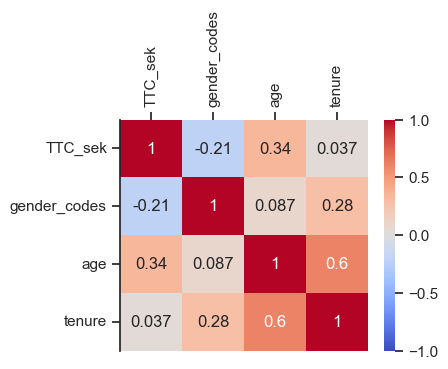

In [ ]:
## PEARSON CORRELATION MATRIX

print("this correlation matrix shows correlation between different variables and could reveal, for instance, gender bias in our compensation.\n\
A darker color indicates a stronger correlation.\n")

# select only the numerical columns
numerical_cols = df_active.select_dtypes(include=['float64', 'int64']).columns

# convert the gender column to a category type
df_active['gender'] = df_active['gender'].astype('category')

# add a new column with the numerical codes
df_active['gender_codes'] = df_active['gender'].cat.codes

# calculate the correlation matrix
#corr_matrix = df_active[numerical_cols].corr()
corr_matrix = df_active[['TTC_sek','gender_codes','age','tenure']].corr()

#mask = np.zeros_like(corr_matrix, dtype=bool)
#mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(4,3))
# create a heatmap of the correlation matrix
plot = sns.heatmap(corr_matrix, 
                   vmin=-1,
                   annot=True,
                   cmap='coolwarm', 
                   fmt='.2g',
                   #mask = mask
                  )

plot.spines['top'].set_visible(False)
plot.spines['right'].set_visible(False)
plot.spines['bottom'].set_visible(False)
plot.spines['left'].set_visible(True)
# set or suppress the y axis labels
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plot.set_yticklabels(plot.get_yticklabels(), rotation=0)
#plot.set(yticklabels=[])
# set or suppress the x and y axis labels
#plot.set_ylabel('')
#plot.set_xlabel('')
# set or suppress title
plot.xaxis.tick_top()
plot.xaxis.set_label_position('top')
plot.yaxis.tick_left()
plot.set_title('')

plt.show()

__COMMENT__: 

<div class="alert alert-success">there seems to be little correlation between gender and total compensation at ProdTech - and that is a good thing!</div>


### By country and gender

In [ ]:
print(
    "Median annual TTC (Total Target Cash) of a ProdTech member (includes bonuses and 13th month in Malaysia) \n"
)
print(
    "\tin Sweden:",
    (
        "{0:,.0f} SEK".format(
            df_active["TTC_sek"][df_active.country == "Sweden"].median()
        )
    ),
    "(monthly: {0:,.0f} SEK)".format(
            df_active["TTC_sek"][df_active.country == "Sweden"].median()/12
        ),       
)
print(
    "\tin Malaysia:",
    "{0:,.0f} SEK".format(
        df_active["TTC_sek"][df_active.country == "Malaysia"].median()
    ),
    "(",
    "{:,.0%}".format(
        df_active["TTC_sek"][df_active.country == "Malaysia"].median()
        / df_active["TTC_sek"][df_active.country == "Sweden"].median()
    ),
    "of Sweden)",
)

Median annual TTC (Total Target Cash) of a ProdTech member (includes bonuses and 13th month in Malaysia) 

	in Sweden: 821,304 SEK (monthly: 68,442 SEK)
	in Malaysia: 375,882 SEK ( 46% of Sweden)


In [ ]:

#display(df_active[(df_active.gender=='Male') & (df_active.country=='Sweden')][['salary_sek']])

print("Median salaries for ProdTech, per country (World = all countries together).",
      "\nRatio is to compare gender median salaries - it is calculated as (median female salary / median male salary).",
      "\nA 100% means complete alignment. Below 100% means female employees are paid less on average. \n")
data = {'country':['World','Sweden', 'Malaysia'],
        'everyone':['','',''],
        'male':['','',''],
        'female':['','',''],
        'ratio':['','','']
       }
df_salary_comp = pd.DataFrame(data)

df_salary_comp['everyone'][df_salary_comp.country=='Sweden'] = df_active['salary_sek'][df_active.country=='Sweden'].median()
df_salary_comp['everyone'][df_salary_comp.country=='Malaysia'] = df_active['salary_sek'][df_active.country=='Malaysia'].median()
df_salary_comp['everyone'][df_salary_comp.country=='World'] = df_active['salary_sek'].median()
df_salary_comp['male'][df_salary_comp.country=='Sweden'] = df_active['salary_sek'][(df_active.country=='Sweden') & (df_active.gender=='Male')].median()
df_salary_comp['male'][df_salary_comp.country=='Malaysia'] = df_active['salary_sek'][(df_active.country=='Malaysia') & (df_active.gender=='Male')].median()
df_salary_comp['male'][df_salary_comp.country=='World'] = df_active['salary_sek'][df_active.gender=='Male'].median()
df_salary_comp['female'][df_salary_comp.country=='Sweden'] = df_active['salary_sek'][(df_active.country=='Sweden') & (df_active.gender=='Female')].median()
df_salary_comp['female'][df_salary_comp.country=='Malaysia'] = df_active['salary_sek'][(df_active.country=='Malaysia') & (df_active.gender=='Female')].median()
df_salary_comp['female'][df_salary_comp.country=='World'] = df_active['salary_sek'][df_active.gender=='Female'].median()
df_salary_comp['ratio']= df_salary_comp.female / df_salary_comp.male

display(df_salary_comp.style.format(format_mapping))

#for x in df_active['country'].unique():
#    print("\n", '**{}**'.format(x.upper()),": \n")
#    print("Median salary: ", ("{0:,.0f} SEK".format(df_active['salary_sek'][df_active.country==x].median())))
#    print("Median female salary: ", ("{0:,.0f} SEK".format(df_active['salary_sek'][(df_active.country==x) & (df_active.gender=='Female')].median())))
#    print("Median male salary: ", ("{0:,.0f} SEK".format(df_active['salary_sek'][(df_active.country==x) & (df_active.gender=='Male')].median())))
#    print("Ratio female/male median salary: ", ("{:.0%}".format(
#        df_active['salary_sek'][(df_active.country==x) & (df_active.gender=='Female')].median() / 
#        df_active['salary_sek'][(df_active.country==x) & (df_active.gender=='Male')].median()
#         )))
    
#for x in df_active['country'].unique():
#    print("\n", x.upper(),": \n")
#    print("Median annual TTC comp: ", ("{0:,.0f} SEK".format(df_active['TTC_sek'][df_active.country==x].median())))
#    print("Median annual female TTC comp: ", ("{0:,.0f} SEK".format(df_active['TTC_sek'][(df_active.country==x) & (df_active.gender=='Female')].median())))
#    print("Median annual male TTC comp: ", ("{0:,.0f} SEK".format(df_active['TTC_sek'][(df_active.country==x) & (df_active.gender=='Male')].median())))
#    print("Ratio annual female/male median TTC comp: ", ("{:.0%}".format(
#        df_active['TTC_sek'][(df_active.country==x) & (df_active.gender=='Female')].median() / 
#        df_active['TTC_sek'][(df_active.country==x) & (df_active.gender=='Male')].median()
#         )))


Median salaries for ProdTech, per country (World = all countries together). 
Ratio is to compare gender median salaries - it is calculated as (median female salary / median male salary). 
A 100% means complete alignment. Below 100% means female employees are paid less on average. 



,country,everyone,male,female,ratio
0,World,"54,700 SEK","49,059 SEK","50,622 SEK",103%
1,Sweden,"68,442 SEK","65,099 SEK","74,737 SEK",115%
2,Malaysia,"28,914 SEK","26,779 SEK","34,038 SEK",127%


__COMMENT__: 

<!---
alert alert-info
alert alert-success
alert alert-warning
alert alert-danger
-->

<div class="alert alert-info">this looks quite balanced</div>


In [ ]:
print(
    "Median annual cost for DR of a ProdTech member (includes crude assumption on pension and social, etc.)\n"
)
print(
    "\tin Sweden:",
    (
        "{0:,.0f} SEK".format(
            df_active["employee_cost"][df_active.country == "Sweden"].median()
        )
    ),
)
print(
    "\tin Malaysia:",
    "{0:,.0f} SEK".format(
        df_active["employee_cost"][df_active.country == "Malaysia"].median()
    ),
    "(",
    "\033[1m",
    "{0:,.0f} %".format(
        df_active["employee_cost"][df_active.country == "Malaysia"].median()
        / df_active["employee_cost"][df_active.country == "Sweden"].median()
        * 100
    ),
    "\033[0m",
    "of Sweden)",
)


Median annual cost for DR of a ProdTech member (includes crude assumption on pension and social, etc.)

	in Sweden: 1,202,543 SEK
	in Malaysia: 443,541 SEK (  37 %  of Sweden)


__COMMENT__: 

<div class="alert alert-info">This is an important number: an employee in Malaysia costs the company 38% of what an employee in Sweden costs.</div>


### By ProdTech department

In [ ]:
# calculate median values per function (CTO area)
avg_salaries = df_active.groupby('function')['salary_sek'].median()
avg_TTC = df_active.groupby('function')['TTC_sek'].median()
avg_employee_cost = df_active.groupby('function')['employee_cost'].median()

# calculate total values per function (CTO area)
total_salaries = df_active.groupby('function')['salary_sek'].sum()
total_TTC = df_active.groupby('function')['TTC_sek'].sum()
total_employee_cost = df_active.groupby('function')['employee_cost'].sum()
#display(avg_salaries)
#display(avg_TTC)
#display(avg_employee_cost)

# concatenate all data series into one dataframe
df_by_function = pd.concat([avg_salaries, avg_TTC, avg_employee_cost, total_salaries, total_TTC, total_employee_cost], 
                            axis=1, keys=['median_salary', 'median_TTC', 'median_cost', 'total_salary', 'total_TTC', 'total_cost'])

# calculate cost of each function as a % of total cost
df_by_function['portion_of_ProdTech'] = df_by_function['total_cost'] / df_active['employee_cost'].sum()
#df_avg_function['salary_vs_ProdTech_median'] = df_avg_function['salary_sek'] / df_active['salary_sek'].median() * 100

#df_by_function = df_by_function[df_by_function['function'] != 'Security']

# drop the Security function before printing (as we have only one entry here - too revealing)
df_by_function = df_by_function.drop('Security')

print("Median and total numbers per CTO team area (median monthly salary and annual TTC - in SEK):")
#display(df_by_function.style.format(format_mapping))

# highlight the key column in bold
styler = df_by_function[['median_salary','median_TTC']].style.map(lambda x: 'font-weight: bold', subset='median_salary')

# display the styled dataframe
styler.format(format_mapping)


## TODO: add the median salary per function and per country


Median and total numbers per CTO team area (median monthly salary and annual TTC - in SEK):


,median_salary,median_TTC
function,,
Customer Support,"24,058","312,759 SEK"
Engineering,"58,906","727,698 SEK"
Engineering Operations,"57,458","693,840 SEK"
PM,"67,134","845,128 SEK"


In [ ]:
# calculate median salaries per start year and location


#### THIS IS BROKEN - NEED TO FIX


## Goal was to try to find out trends in salaries we offer (we know we are \"raising the bar\" on new hires and this has meant offering higher salaries as well.\n \
##      However, the below data is flawed and not helping answer that question

#print("Median salary against start year (this should of course increase over time as this also means longer tenure. \n \
#      Goal was to try to find out trends in salaries we offer (we know we are \"raising the bar\" on new hires and this has meant offering higher salaries as well.\n \
#      However, the below data is flawed and not helping answer that question.\n ")

#df_active['start_year'] = pd.to_datetime(df_active['start']).dt.year
#median_salaries = df.groupby(['year', 'function'])['salary'].median().unstack()

#df_teams_sizes_per_country_function = df_active.groupby(['country','function']).count().unstack()
#df_teams_sizes_per_country_function.fillna('', inplace=True)
#df_teams_sizes_per_country_function.style.set_properties(**{'text-align': 'center'})
# Adding a total row
#df_teams_sizes_per_country_function.loc['Total'] = df_teams_sizes_per_country_function.sum()
#display(df_teams_sizes_per_country_function.iloc[:,:4]) # shows all rows (:) but only first 4 columns
#display(df_teams_sizes_per_country_function)



#df_avg_salaries_country_function_year = df_active.groupby(['country','function','start_year'])['salary_sek'].median().unstack()
#df_avg_salaries_country_function_year = df_avg_salaries_country_function_year.drop('Italy')
#df_avg_salaries_country_function_year = df_avg_salaries_country_function_year.drop('USA')
#display(df_avg_salaries_country_function_year.iloc[:, -5:]) ## show all rows (:), but only 5 last columns
####


# calculate cost of each function as a % of total cost
#df_by_function_year['portion_of_ProdTech'] = df_by_function_year['total_cost'] / df_active_year['employee_cost'].sum()
#df_avg_function['salary_vs_ProdTech_median'] = df_avg_function['salary_sek'] / df_active['salary_sek'].median() * 100

#df_by_function = df_by_function[df_by_function['function'] != 'Security']

# drop the Security function before printing (as we have only one entry here - too revealing)
#df_by_function_year = df_by_function_year.drop('Security')

#display(df_by_function.style.format(format_mapping))

# highlight the key column in bold
#styler = df_avg_salaries_country_function_year[['median_salary','median_TTC']].style.map(lambda x: 'font-weight: bold', subset='median_salary')

# display the styled dataframe
#styler.format(format_mapping)


## People budgets

### By country

In [ ]:
# calculate median values per function (CTO area)
avg_salaries = df_active.groupby("country")["salary_sek"].median()
avg_TTC = df_active.groupby("country")["TTC_sek"].median()
avg_employee_cost = df_active.groupby("country")["employee_cost"].median()

# calculate total values per function (CTO area)
total_salaries = df_active.groupby("country")["salary_sek"].sum()
total_TTC = df_active.groupby("country")["TTC_sek"].sum()
total_employee_cost = df_active.groupby("country")["employee_cost"].sum()

# concatenate all data series into one dataframe
df_by_country = pd.concat(
    [
        avg_salaries,
        avg_TTC,
        avg_employee_cost,
        total_salaries,
        total_TTC,
        total_employee_cost,
    ],
    axis=1,
    keys=[
        "median_salary",
        "median_TTC",
        "median_cost",
        "total_salary",
        "total_TTC",
        "total_cost",
    ],
)

# calculate 3 columns, to compare the numbers of other countries to Sweden
df_by_country["salary_vs_sweden"] = (
    df_by_country["median_salary"] / df_by_country.loc["Sweden", "median_salary"]
)
df_by_country["TTC_vs_sweden"] = (
    df_by_country["median_TTC"] / df_by_country.loc["Sweden", "median_TTC"]
)
df_by_country["employee_cost_vs_sweden"] = (
    df_by_country["median_cost"] / df_by_country.loc["Sweden", "median_cost"]
)

# calculate cost of each function as a % of total cost
df_by_country["portion_of_ProdTech"] = (
    df_by_country["total_cost"] / df_active["employee_cost"].sum()
)

## THIS IS WHEREIAM!!!!!

# create a column with total number of employees per location
#df_by_country["employees"] = df_active[df_active.country==df_by_country.loc[1]].counts()

# group df2 by country and sum the amount column
employees_by_country = df_active.groupby("country")["lname"].count()

# join the sales_by_country series with df1
df_by_country = df_by_country.join(employees_by_country)

# rename the new column to "total_sales"
df_by_country.rename(columns={"lname": "employees"}, inplace=True)

df_by_country["pct_total_employees"] = df_by_country["employees"] / len(df_active)

# drop the USA before printing (as we have only one entry here - too revealing)
#df_by_country = df_by_country.drop('Italy')
#df_by_country = df_by_country.drop("USA")

print(
    "\nTotal annual headcount cost per country + portion of overall ProdTech people cost: \n"
)

# highlight the key column in bold
styler = df_by_country[["total_cost", "portion_of_ProdTech","employees","pct_total_employees"]].style.map(
#styler = df_by_country.style.map(
    lambda x: "font-weight: bold", subset="portion_of_ProdTech"
)

# display the styled dataframe
display(styler.format(format_mapping))

print("Total count:", df_by_country["employees"].sum())

#display(df_by_country.style.format(format_mapping))
#display(df_by_country)

## TODO: not sure this is needed at all...



Total annual headcount cost per country + portion of overall ProdTech people cost: 



,total_cost,portion_of_ProdTech,employees,pct_total_employees
country,,,,
Bulgaria,"1,344,207 SEK",2%,2,2%
Denmark,"1,353,198 SEK",2%,1,1%
Japan,0 SEK,0%,1,1%
Malaysia,"18,615,739 SEK",22%,41,43%
Poland,"1,525,362 SEK",2%,1,1%
Sweden,"62,982,784 SEK",73%,50,52%


Total count: 96


# PEOPLE COST OF EACH OFFICE

In [ ]:
# Calculate annual cost per city
city_costs = df_active.groupby('city')['employee_cost'].sum().sort_values(ascending=False)
print("Annual cost per city (total):")
display(city_costs)

# Create a function to display people in each city with their annual costs
def display_city_employees(city_name):
    city_df = df_active[df_active.city == city_name]
    if len(city_df) > 0:
        total_cost = city_df['employee_cost'].sum()
        percentage = (total_cost / df_active['employee_cost'].sum()) * 100
        print(f"\n{city_name} - Total annual cost: {total_cost:,.0f} SEK ({percentage:.1f}% of total budget)")
        print(f"Number of employees: {len(city_df)}")
        display(city_df[['lname', 'fname', 'title', 'function', 'employee_cost']]
                .sort_values('employee_cost', ascending=False)
                .style
                .format({'employee_cost': '{:,.0f} SEK'})
                .hide(axis='index'))
    else:
        print(f"No employees found in {city_name}")

# Display employees for each important city
for city in ['Stockholm', 'Kuala Lumpur', 'Gothenburg', 'Östersund', 'Sofia', 'Home Office']:
    display_city_employees(city)

# Calculate average cost per employee by city
total_people_cost = df_active['employee_cost'].sum()
avg_costs = df_active.groupby('city').agg(
    total_cost=('employee_cost', 'sum'),
    employee_count=('lname', 'count'),
    avg_cost=('employee_cost', 'mean')
).sort_values('total_cost', ascending=False)

# Add percentage of total cost column
avg_costs['pct_of_total_cost'] = avg_costs['total_cost'] / total_people_cost * 100

print(f"\nAnnual people cost (includes social charges, 13th month, etc.) by city (total people cost: {total_people_cost:,.0f} SEK):")
display(avg_costs.style.format({
    'total_cost': '{:,.0f} SEK', 
    'avg_cost': '{:,.0f} SEK',
    'pct_of_total_cost': '{:.1f}%'
}))

Annual cost per city (total):


city
Stockholm      50,680,765.14
Kuala Lumpur   18,615,739.40
Gothenburg      8,603,330.76
Home Office     6,577,248.54
Sofia           1,344,206.71
Name: employee_cost, dtype: float64


Stockholm - Total annual cost: 50,680,765 SEK (59.1% of total budget)
Number of employees: 38


lname,fname,title,function,employee_cost
Månsson,Lars,Commercial Product Manager,PM,"2,371,433 SEK"
Gasek,Michal,Lead Architect,Engineering,"2,014,627 SEK"
Jörgensen,Sebastian,Lead Architect,Engineering,"1,972,170 SEK"
Koreva,Liubov,Head of Engineering Operations,Engineering Operations,"1,790,574 SEK"
Karim,Yaad,CISO,Security,"1,753,235 SEK"
Agarwal,Akshay,Engineering Manager,Engineering,"1,642,302 SEK"
Sethi,Diksha,Group Product Manager,PM,"1,614,456 SEK"
Smirnov,Ivan,Lead QA Automation Engineer,Engineering,"1,578,960 SEK"
Farkas,Richard,Product Design Manager,PM,"1,546,555 SEK"
Wallin,Jenni,Head of Product Documentation,PM,"1,494,122 SEK"



Kuala Lumpur - Total annual cost: 18,615,739 SEK (21.7% of total budget)
Number of employees: 41


lname,fname,title,function,employee_cost
Chew,Alan Jyh Uei,Engineering Manager,Engineering,"950,309 SEK"
Chooi,Simon Wood Choy,Lead SRE Engineer,Engineering Operations,"842,166 SEK"
Yong,Chee Keong,Technical Product Manager,PM,"782,997 SEK"
Fung,Cheng Kai,SRE Engineer,Engineering Operations,"767,307 SEK"
Teh,Davion Eng Hoe,Software Engineer,Engineering,"714,905 SEK"
Thong Phang Kee,Brian,SRE Engineer,Engineering Operations,"711,162 SEK"
Aleyak,Sheela,Product Owner,PM,"706,446 SEK"
Mhod Shubari,Hafizzy,Support Manager,Customer Support,"598,874 SEK"
Tan,Ronnie Kang Leong,Software Engineer,Engineering,"561,444 SEK"
Chong,Chooi San,QA Engineer,Engineering,"550,215 SEK"



Gothenburg - Total annual cost: 8,603,331 SEK (10.0% of total budget)
Number of employees: 7


lname,fname,title,function,employee_cost
Majumdar,Abhinav,Engineering Manager,Engineering,"1,704,726 SEK"
Lundström,Mattias,Software Architect,Engineering,"1,327,061 SEK"
Martinsson,Peter,Software Engineer,Engineering,"1,283,364 SEK"
Aronsson,Andreas,Software Engineer,Engineering,"1,193,400 SEK"
Edrisameri,Mansour,Software Engineer,Engineering,"1,140,156 SEK"
Sjölin,David,Software Engineer,Engineering,"1,053,901 SEK"
Pereira,Manuel,QA Engineer,Engineering,"900,723 SEK"


No employees found in Östersund

Sofia - Total annual cost: 1,344,207 SEK (1.6% of total budget)
Number of employees: 2


lname,fname,title,function,employee_cost
Borisova,Mariya,L3 Team Lead,Customer Support,"698,803 SEK"
Bakalov,Nikolay,L3 Support Engineer,Customer Support,"645,404 SEK"



Home Office - Total annual cost: 6,577,249 SEK (7.7% of total budget)
Number of employees: 8


lname,fname,title,function,employee_cost
Eriksson,Emil,Head of Products,PM,"2,502,774 SEK"
Talarek,Bartlomiej,L3 Support Engineer,Customer Support,"1,525,362 SEK"
Hansson,Kim,Head of Customer Support,Customer Support,"1,353,198 SEK"
Gandhi,Srivenkatesh,Software Engineer,PM,"1,195,914 SEK"
Vojbacke,Magnus,SRE Engineer,Engineering Operations,nan SEK
Dixit,Gaurav,"Lead Product Manager, Analytics and Machine Learning",PM,nan SEK
Raam,Kreshnaa,Software Engineer,PM,nan SEK
Kumar Sahu,Shashank,Software Engineer,PM,nan SEK



Annual people cost (includes social charges, 13th month, etc.) by city (total people cost: 85,821,291 SEK):


,total_cost,employee_count,avg_cost,pct_of_total_cost
city,,,,
Stockholm,"50,680,765 SEK",38,"1,333,704 SEK",59.1%
Kuala Lumpur,"18,615,739 SEK",41,"454,042 SEK",21.7%
Gothenburg,"8,603,331 SEK",7,"1,229,047 SEK",10.0%
Home Office,"6,577,249 SEK",8,"1,644,312 SEK",7.7%
Sofia,"1,344,207 SEK",2,"672,103 SEK",1.6%


### By ProdTech department

In [ ]:
print("Total annual people cost per ProdTech department + portion of overall ProdTech people cost:\n")
#display(df_by_function.style.format(format_mapping))
    
# highlight the key column in bold
#styler = df_by_function.style.map(lambda x: 'font-weight: bold', subset='median_salary')
styler = df_by_function[['total_cost','portion_of_ProdTech']].style.map(lambda x: 'font-weight: bold', subset='portion_of_ProdTech')

# display the styled dataframe
styler.format(format_mapping)

### TODO: add the total salary per function and per country (not just cost)

Total annual people cost per ProdTech department + portion of overall ProdTech people cost:



,total_cost,portion_of_ProdTech
function,,
Customer Support,"9,529,092 SEK",11%
Engineering,"43,556,332 SEK",51%
Engineering Operations,"10,173,387 SEK",12%
PM,"20,809,245 SEK",24%


## Salary statistics (for hiring and benchmarking)

### Mean salary by job title (unfiltered)

__COMMENT__: 

<div class="alert alert-info">The below info can be used to identify outliers during salary reviews. It can also be used to get an idea of the cost of a new hire (assuming the existing median salaries are aligned with market - which might not be always true)</div>


In [ ]:

print("\nMedian salaries (in local currency and in SEK) for each job title by country")
#print("(NOTE: Rare titles have been excluded to avoid anyone deriving specific people's salaries from this report.)\n")
    
for x in df_active.country.unique(): 

    print("\ncountry =",'\033[1m' + x + '\033[0m')

    #df_active2 = df_active.groupby('title').filter(lambda x: len(x) > 2)
    summary_table = df_active[df_active.country==x].groupby('title').agg({'title': 'count', 'salary': 'median', 'salary_sek': 'median'}).rename(columns={'title': 'count'})
    summary_table = summary_table.sort_values(by='count', ascending=False)
    ## For titles with less than 2 people, set salary to zero to protect privacy
    #summary_table.loc[summary_table['count'] < 2, 'median_salary'] = 0
    #display (summary_table)

    display(summary_table.style.format(format_mapping))

    print("Total count:", summary_table["count"].sum())



Median salaries (in local currency and in SEK) for each job title by country

country = Sweden


,count,salary,salary_sek
title,,,
Software Engineer,20,"63,500","64,350"
DevOps Engineer,4,"57,820","57,820"
Lead QA Automation Engineer,2,"81,500","81,500"
Engineering Manager,2,"86,700","86,700"
Lead Architect,2,"101,800","101,800"
Alliance Technical Account Manager,1,"59,532","59,532"
Technical Product Manager,1,"74,737","74,737"
Support Quality Specialist,1,"49,250","49,250"
Software Architect,1,"72,280","72,280"


Total count: 50

country = Malaysia


,count,salary,salary_sek
title,,,
Software Engineer,16,"12,750","31,110"
L1 Support Engineer,6,"4,750","11,590"
L2 Support Engineer,5,"8,190","19,984"
Technical Writer,3,"10,500","25,620"
L3 Support Engineer,2,"12,670","30,915"
SRE Engineer,2,"19,750","48,190"
Engineering Manager,1,"23,931","58,392"
Lead SRE Engineer,1,"22,500","54,900"
Product Designer,1,"7,461","18,205"


Total count: 41

country = Japan


,count,salary,salary_sek
title,,,
SRE Engineer,1,nan,nan


Total count: 1

country = Denmark


,count,salary,salary_sek
title,,,
Head of Customer Support,1,"50,500","77,770"


Total count: 1

country = Poland


,count,salary,salary_sek
title,,,
L3 Support Engineer,1,"7,590","87,664"


Total count: 1

country = Bulgaria


,count,salary,salary_sek
title,,,
L3 Support Engineer,1,"8,098","48,021"
L3 Team Lead,1,"8,768","51,994"


Total count: 2


In [ ]:
## ### By Job Title (excl. titles with less than 2 people)

## THIS IS THE SAME AS ABOVE BUT FILTERING OUT TITLES WITH TOO FEW PEOPLE (TO AVOID DERIVING INDIVIDUAL INFORMATION FROM THEM)
# print("\nMedian salaries (in SEK) for each job title by country")
#print("(NOTE: Rare titles have been excluded to avoid anyone deriving specific people's salaries from this report.)\n")

#for x in df_active.country.unique(): 
#    print("\ncountry =",'\033[1m' + x + '\033[0m')

#    summary_table = df_active[df_active.country==x].groupby('title').agg({'title': 'count', 'salary_sek': 'median'}).rename(columns={'title': 'count'})
#    summary_table = summary_table.sort_values(by='count', ascending=False)
    
    # Filter out titles with less than 2 people
#    filtered_summary_table = summary_table[summary_table['count'] >= 2]
    
#    display(filtered_summary_table.style.format(format_mapping))

#    print("Total count:", summary_table["count"].sum())


## Salary range per job title

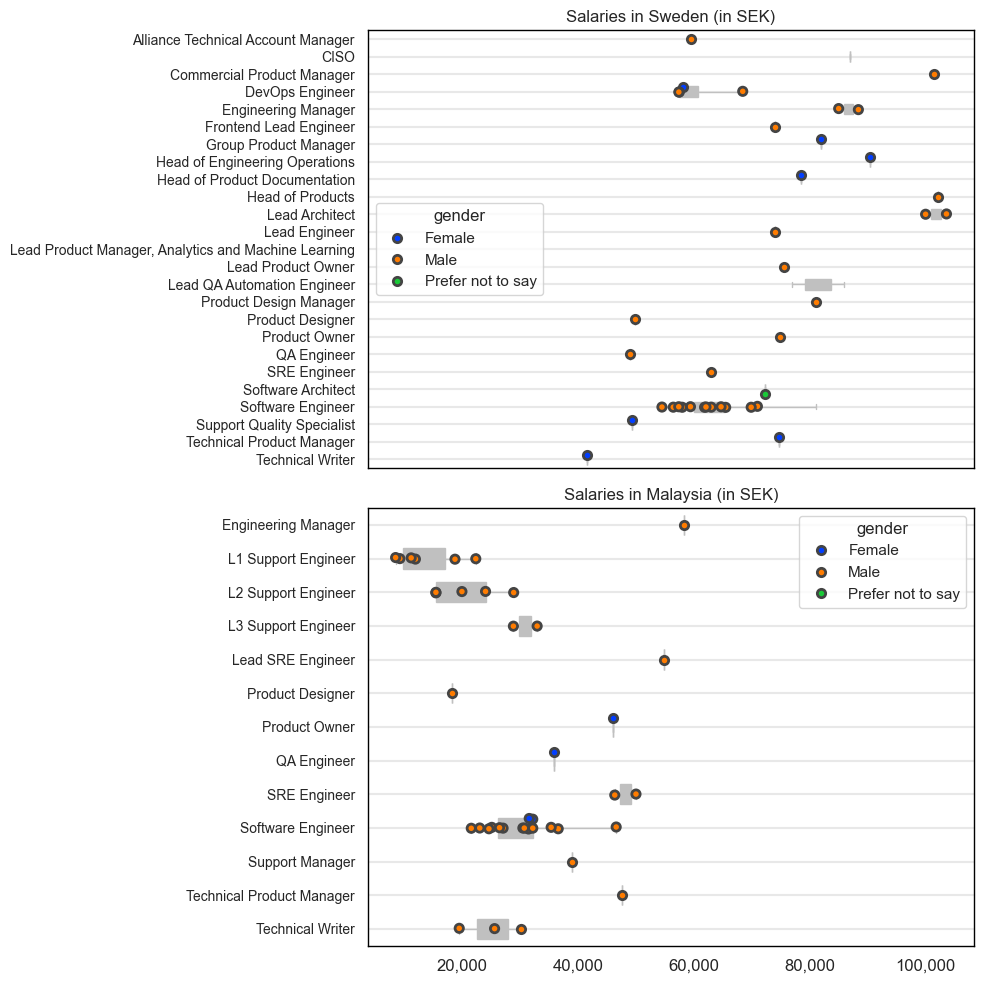

In [ ]:
# Filter the DataFrame to include only titles with 3 or more employees
common_titles = df_active.groupby('title').filter(lambda x: len(x) >= 0)

# Get the list of countries with more than 3 employees
countries = df_active['country'].value_counts()
countries = countries[countries > 3].index.tolist()

# Create subplots
fig, axes = plt.subplots(nrows=len(countries), ncols=1, figsize=(10, len(countries) * 5), sharex=True)

# Draw a boxplot for each country
for ax, country in zip(axes, countries):
    country_data = common_titles[common_titles['country'] == country].sort_values(by='title')
    sns.boxplot(
        data=country_data,
        y="title",
        x="salary_sek",
        whis=[0, 100],
        width=0.6,
        color="silver",
        boxprops=dict(color="silver"),
        whiskerprops=dict(color="silver"),
        capprops=dict(color="silver"),
        medianprops=dict(color="silver"),
        ax=ax
    )
    
    # Add horizontal grid lines with improved visibility
    ax.grid(axis='y', linestyle='-', alpha=0.3, color='gray')
    
    # Add more prominent horizontal lines at each y-tick
    for y in ax.get_yticks():
        ax.axhline(y=y, color='lightgray', linestyle='-', alpha=0.5, zorder=0)
    
    stripplot = sns.stripplot(
        data=country_data,
        y="title",
        x="salary_sek",
        hue="gender",
        palette="bright",
        legend=True,
        size=6,
        dodge=True,
        linewidth=2,
        ax=ax
    )
    ax.set_title(f"Salaries in {country} (in SEK)")
    ax.set_xlabel("")
    ax.set_ylabel("")
    
    # Make all spines visible to create a box around the canvas
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_color('black')
        spine.set_linewidth(1.0)
    
    xlabels = ["{:,.0f}".format(x) for x in ax.get_xticks()]
    ax.set_xticklabels(xlabels, fontsize=12)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)

# Adjust layout
plt.tight_layout()

plt.show()



### TO DO: chart in local currency (ex: MYR)

## Cost centers

In [ ]:
#print("Cost centers at ProdTech and the number of people attached to each one: ")
#df_active[['CC','CC_name']].value_counts().sort_values(ascending=False)


# List all CCs found in DigiPeople
print("Cost centers found in DigiPeople for ProdTech")
df_cc_summary = df_active.groupby(['CC','CC_name','function'])['CC'].size().reset_index(name='count')

df_cc_summary["pct_headcount"] = df_cc_summary["count"].astype(float) / (
    df_active["lname"].count()
)
display(df_cc_summary.sort_values(by=['CC'], ascending=True)
        .style
        .format(format_mapping)
        .hide(axis="index") )

# Display the sum of all values in the "count" column
print("Sum of all values in the 'count' column:", df_cc_summary["count"].sum())

print("\nMapping of cost centers to product (from external table)")
display(ref_cc
        .style
        .format(format_mapping)
        .hide(axis="index") )

Cost centers found in DigiPeople for ProdTech


CC,CC_name,function,count,pct_headcount
1230,CTO,PM,2,2%
1230,CTO,Security,1,1%
1320,Documentation MZ,PM,2,2%
1321,Documentation CE,PM,2,2%
1330,Engineering MZ,Engineering,26,27%
1340,Product Management MZ,PM,6,6%
1341,Product Management CE,PM,5,5%
1342,Product Management Usage Intelligence,PM,4,4%
1360,Engineering CE,Engineering,18,19%
1370,Enablement MZ,Engineering Operations,4,4%


Sum of all values in the 'count' column: 96

Mapping of cost centers to product (from external table)


CC,CC_name,product
1230,CTO,no specific prod
1320,Documentation MZ,MZ
1321,Documentation CE,CE
1330,Engineering MZ,MZ
1340,Product Management MZ,MZ
1341,Product Management CE,CE
1342,Product Management Usage Intelligence,Usage Intelligence
1350,Engineering Usage Intelligence,Usage Intelligence
1360,Engineering CE,CE
1370,Enablement MZ,MZ


In [ ]:
## LIST OF ACTIVE EMPLOYEES WITHOUT A COST CENTER SET

# display(df_active[['lname','CC']])
# no_cost_center_employees = df_active[df_active.CC.isnull()]]
# no_cost_center_employees = df_active[df_active.CC.isna()]
no_cost_center_employees = df_active[df_active.CC == "<NA>"]

print(
    f"Employees without a cost center: \033[1m {len(no_cost_center_employees)} \033[0m \n"
)

if len(no_cost_center_employees) > 0:
    display(no_cost_center_employees[["lname", "fname", "CC", "CC_name"]])



Employees without a cost center:  0  



In [ ]:
display(df_active[["lname", "fname", "CC", "CC_name"]].sort_values(by=['lname'], ascending=True))

,lname,fname,CC,CC_name
44,Abas,Rosli,1415,Support and Operations L2
188,Abdul Latiff,Rizman Hariz,1360,Engineering CE
220,Achuthan,Nimal Paran,1414,Support and Operations L1
204,Agarwal,Akshay,1360,Engineering CE
118,Ahmad Zaki,Fadhil,1415,Support and Operations L2
151,Akbarnejad,Navid,1341,Product Management CE
150,Aleyak,Sheela,1341,Product Management CE
224,Aronsson,Andreas,1330,Engineering MZ
41,Au Yong,Yuri Yude Luan,1330,Engineering MZ
81,Bakalov,Nikolay,1416,Support and Operations L3


In [ ]:
## NOTE THAT IF YOU RUN THIS MULTIPLE TIMES THE JOIN WILL FAIL! "RUN ALL" TO AVOID THIS
## lots of weird behavior. Might have to "restart" and then "run all" if anything not working

print("List of cost centers and total people budget associated with each of them: \n")

## THIS IS MISSING DATA!!!!!! IF YOU ADD UP THE COUNT OF EMPLOYEES PER CC IT'S ONLY 88!!!!!!!
## HERE - NEED TO FIX

## Let's calculate the associated employee_cost per CC

## calculate the cost by CC as a series
cost_by_CC = df_active.groupby("CC")["employee_cost"].sum()

#display(cost_by_CC)

## join the series with our main dataframe
df_cc_summary = df_cc_summary.join(cost_by_CC, on="CC", how='left', lsuffix="_left", rsuffix="_right")

#display(df_cc_summary)

## calculate percentage of CC cost relative to total cost
df_cc_summary["pct_cost"] = df_cc_summary["employee_cost"].astype(float) / (
    df_active["employee_cost"].sum()
)

## to be able to calculate the cost per product we are going to get the association CC to product from the sidecar ref_cc file
df_cc_summary = df_cc_summary.join(ref_cc.set_index('CC'), on='CC', how='left', lsuffix="_left", rsuffix="_right")
del(df_cc_summary['CC_name_right'])
df_cc_summary.rename(columns={'CC_name_left':'CC_name'}, inplace=True)

# this is useful to troubleshoot join issues
#df_cc_summary = df_cc_summary.join(cost_by_CC, on="CC", how='left', lsuffix='_left', rsuffix='_right')

#display(df_cc_summary)
display(df_cc_summary[["CC", "CC_name", "product", "count", "pct_headcount", "employee_cost", "pct_cost"]]
    .style
    .format(format_mapping)
    .hide(axis='index') 
    #.highlight_max(subset=['count'], color='lightgreen')
    #.highlight_min(color='pink')
    .background_gradient(subset=['pct_headcount'], cmap='BuPu')
    .background_gradient(subset=['pct_cost'], cmap='BuGn')
    #.bar(color='#FFA07A', vmin=100_000, subset=['count'], align='zero')
    .bar(color='thistle', vmin=0, subset=['count'], align='zero')
    #.set_caption('Cost per CC')
)

print("Sum of all values in the 'count' column:", df_cc_summary["count"].sum())

List of cost centers and total people budget associated with each of them: 



CC,CC_name,product,count,pct_headcount,employee_cost,pct_cost
1230,CTO,no specific prod,2,2%,"5,750,131 SEK",7%
1230,CTO,no specific prod,1,1%,"5,750,131 SEK",7%
1320,Documentation MZ,MZ,2,2%,"763,564 SEK",1%
1321,Documentation CE,CE,2,2%,"1,154,951 SEK",1%
1330,Engineering MZ,MZ,26,27%,"24,120,731 SEK",28%
1340,Product Management MZ,MZ,6,6%,"6,670,146 SEK",8%
1341,Product Management CE,CE,5,5%,"7,027,773 SEK",8%
1342,Product Management Usage Intelligence,Usage Intelligence,4,4%,"1,195,914 SEK",1%
1360,Engineering CE,CE,18,19%,"19,435,601 SEK",23%
1370,Enablement MZ,MZ,4,4%,"3,838,047 SEK",4%


Sum of all values in the 'count' column: 96


In [ ]:
print("list of people belonging to each CC: ")
people_per_cc = df_active.groupby(['CC','CC_name','title','lname','fname']).agg({'lname': ['count']})
display(people_per_cc)

print("Sum of all values in the 'count' column:", people_per_cc[('lname', 'count')].sum())

list of people belonging to each CC: 


lname
                                                                                                                                                         count
CC   CC_name                               title                                                lname                    fname                                
1230 CTO                                   CISO                                                 Karim                    Yaad                                1
                                           Head of Product Documentation                        Wallin                   Jenni                               1
                                           Head of Products                                     Eriksson                 Emil                                1
1320 Documentation MZ                      Technical Writer                                     Silvaratnam              Nirosan                             1
                                                                                                Wu                       Kevin Jia Ping                      1
1321 Documentation CE                      Technical Writer                                     Borrelli                 Felicity                            1
                                                                                                Han                      Casey Lee                           1
1330 Engineering MZ                        Engineering Manager                                  Chew                     Alan Jyh Uei                        1
                                                                                                Majumdar                 Abhinav                             1
                                           Lead Architect                                       Jörgensen                Sebastian                           1
                                           Lead QA Automation Engineer                          Khorev                   Aleksandr                           1
                                           QA Engineer                                          Chong                    Chooi San                           1
                                                                                                Pereira                  Manuel                              1
                                           Software Architect                                   Lundström                Mattias                             1
                                           Software Engineer                                    Aronsson                 Andreas                             1
                                                                                                Au Yong                  Yuri Yude Luan                      1
                                                                                                Bangalore                Karthik                             1
                                                                                                Chee                     Chem Zing                           1
                                                                                                Chin                     Eujun                               1
                                                                                                Cholewa                  Michal                              1
                                                                                                Choy                     Kam Heng                            1
                                                                                                Edrisameri               Mansour                             1
                                                                                                Eliasson                 Anders                              1
                   

Sum of all values in the 'count' column: 96


## DigiPeople structure: function and department

In [ ]:
print("list of people belonging to each function and department: ")
people_per_dept = df_active.groupby(['function','dept','title','lname','fname']).agg({'lname': ['count']})
display(people_per_dept)
people_per_dept = df_active.groupby(['function','dept','title']).agg({'title': ['count']})
display(people_per_dept)

list of people belonging to each function and department: 


lname
                                                                                                                                                                count
function               dept                                              title                         lname                    fname                                
Customer Support       L1 APAC/EMEA                                      L1 Support Engineer           Achuthan                 Nimal Paran                         1
                                                                                                       Faisal                   Ahmad Imran                         1
                                                                                                       Hamzah                   Muhammad Ariff                      1
                                                                                                       Hasan                    Mohd Faizal                         1
                                                                                                       Lee                      Khai Wen                            1
                                                                                                       Shaadin                  Muhammad Saifullah                  1
                                                                         Support Manager               Mhod Shubari             Hafizzy                             1
                       L2 AMER/EMEA                                      L2 Support Engineer           Abas                     Rosli                               1
                                                                                                       Ahmad Zaki               Fadhil                              1
                                                                                                       Ismail                   Ridhuan                             1
                                                                                                       Mustaphy                 Muhammad Muhaimi                    1
                                                                                                       Sereedaren               Kishok                              1
                       L3 EMEA/APAC                                      L3 Support Engineer           Bakalov                  Nikolay                             1
                                                                                                       Chew                     Thiam Hoi                           1
                                                                                                       Kerk                     Chze Perng                          1
                                                                                                       Talarek                  Bartlomiej                          1
                                                                         L3 Team Lead                  Borisova                 Mariya                              1
                       Support Quality Management                        Support Quality Specialist    Myrkheimr                Mia                                 1
Engineering            CE                                                Engineering Manager           Agarwal                  Akshay                              1
                                                                         Frontend Lead Engineer        Kaushik                  Manu                                1
                                                                         Lead Architect                Gasek                    Michal                              1
                                                                         Lead Engineer                 Brandvik                 Jonas                               1
          

title
                                                                                                       count
function               dept                                              title                              
Customer Support       L1 APAC/EMEA                                      L1 Support Engineer               6
                                                                         Support Manager                   1
                       L2 AMER/EMEA                                      L2 Support Engineer               5
                       L3 EMEA/APAC                                      L3 Support Engineer               4
                                                                         L3 Team Lead                      1
                       Support Quality Management                        Support Quality Specialist        1
Engineering            CE                                                Engineering Manager               1
                                                                         Frontend Lead Engineer            1
                                                                         Lead Architect                    1
                                                                         Lead Engineer                     1
                                                                         Lead QA Automation Engineer       1
                                                                         Software Engineer                13
                       MZ                                                Engineering Manager               1
                                                                         Lead Architect                    1
                                                                         Lead QA Automation Engineer       1
                                                                         QA Engineer                       2
                                                                         Software Architect                1
                                                                         Software Engineer                19
Engineering Operations DOT                                               DevOps Engineer                   4
                                                                         Software Engineer                 1
                       SRE                                               Lead SRE Engineer                 1
                                                                         SRE Engineer                      4
PM                     Design                                            Product Design Manager            1
                                                                         Product Designer                  2
                       Doc                                               Head of Product Documentation     1
                                                                         Technical Writer                  4
                       Product Management Cloud Edition                  Group Product Manager             1
                                                                         Product Owner                     2
                       Product Management Mediation Zone/Private Edition Lead Product Owner                1
                                                                         Technical Product Manager         2

## People budget per product

In [ ]:
## PROBLEM: total percentages of cost > 100%...

#df_cc_summary.groupby("product").sum("employee_cost")
display(df_cc_summary.groupby("product").sum("pct_headcount").sort_values(by=['count'], ascending=False)
        [["count", "pct_headcount"]]
    .style
    .format(format_mapping)
    #.hide(axis='index') 
    #.highlight_max(subset=['count'], color='lightgreen')
    #.highlight_min(color='pink')
    #.background_gradient(subset=['employee_cost'], cmap='BuPu')
    #.background_gradient(subset=['pct_cost'], cmap='BuGn')
    #.bar(color='#FFA07A', vmin=100_000, subset=['count'], align='zero')
    #.bar(color='thistle', vmin=20, subset=['count'], align='zero')
    #.set_caption('Cost per CC')
)

print("to compare apples to apples with earlier report, here are the numbers focusing on Engineering (excluding Support, SRE, etc)")

display(df_cc_summary[~df_cc_summary['CC'].isin(['1370', '1371', '1410', '1414', '1415', '1416', '1420'])]
    .groupby("product")
    .sum("pct_headcount")
    .sort_values(by=['count'], ascending=False)
    [["count", "pct_headcount"]]
    .style
    .format(format_mapping)
)

### !!!!!!! THIS IS WHERE I AM !!!!!!!!
### Problem with Support people not being assigned to a product. And product is not set to "no specific prod" but is NaN

df_cc_summary_sorted = df_cc_summary.sort_values(by='product')
df_cc_summary_sorted['subtotal_count'] = df_cc_summary_sorted.groupby('product')['count'].transform('sum')

display(df_cc_summary_sorted[["CC", "CC_name","count","pct_headcount","pct_cost","product", "subtotal_count"]]
    .style
    .format(format_mapping)
    .background_gradient(subset=['pct_cost'], cmap='BuGn')
    .background_gradient(subset=['pct_headcount'], cmap='BuGn')
)
print("Total count:", df_cc_summary_sorted["count"].sum())
#print("Total count:", df_cc_summary["count"].sum())


,count,pct_headcount
product,,
MZ,48,50%
CE,32,33%
no specific prod,12,12%
Usage Intelligence,4,4%


to compare apples to apples with earlier report, here are the numbers focusing on Engineering (excluding Support, SRE, etc)


,count,pct_headcount
product,,
MZ,34,35%
CE,25,26%
Usage Intelligence,4,4%
no specific prod,3,3%


,CC,CC_name,count,pct_headcount,pct_cost,product,subtotal_count
3,1321,Documentation CE,2,2%,1%,CE,32
6,1341,Product Management CE,5,5%,8%,CE,32
8,1360,Engineering CE,18,19%,23%,CE,32
10,1371,Enablement CE,1,1%,1%,CE,32
15,1420,SRE Global,6,6%,6%,CE,32
2,1320,Documentation MZ,2,2%,1%,MZ,48
4,1330,Engineering MZ,26,27%,28%,MZ,48
5,1340,Product Management MZ,6,6%,8%,MZ,48
9,1370,Enablement MZ,4,4%,4%,MZ,48
13,1415,Support and Operations L2,5,5%,2%,MZ,48


Total count: 96


In [ ]:
#df_cc_summary.groupby("product").sum("employee_cost")
print("People cost per product: \n")
display(df_cc_summary.groupby("product").sum("employee_cost").sort_values(by=['employee_cost'], ascending=False)
    .style
    .format(format_mapping)
    #.hide(axis='index') 
    #.highlight_max(subset=['count'], color='lightgreen')
    #.highlight_min(color='pink')
    .background_gradient(subset=['employee_cost'], cmap='BuPu')
    .background_gradient(subset=['pct_cost'], cmap='BuGn')
    .background_gradient(subset=['pct_headcount'], cmap='BuGn')
    #.bar(color='#FFA07A', vmin=100_000, subset=['count'], align='zero')
    #.bar(color='thistle', vmin=20, subset=['count'], align='zero')
    #.set_caption('Cost per CC')
)

print("Total count:", df_cc_summary["count"].sum())
print("Total people budget: {:,.0f} SEK".format(df_cc_summary["employee_cost"].sum()))

print("\n\n\nResults excluding SRE and Support: \n")

df_filtered = df_cc_summary[~df_cc_summary['function'].isin(['Customer Support', 'Site Reliability Engineering'])]

display(df_filtered
    .groupby("product")
    .sum()
    .sort_values(by=['employee_cost'], ascending=False)
    [['count', 'pct_headcount', 'employee_cost', 'pct_cost']]
    .style
    .format(format_mapping)
    .background_gradient(subset=['employee_cost'], cmap='BuPu')
    .background_gradient(subset=['pct_cost'], cmap='BuGn')
    .background_gradient(subset=['pct_headcount'], cmap='BuGn')
)

print("Total count (excl. SRE & Support):", df_filtered["count"].sum())
print("Total people budget (excl. SRE & Support): {:,.0f} SEK".format(df_filtered["employee_cost"].sum()))

People cost per product: 



,count,pct_headcount,employee_cost,pct_cost
product,,,,
MZ,48,50%,"40,805,024 SEK",48%
CE,32,33%,"33,953,665 SEK",40%
no specific prod,12,12%,"15,616,818 SEK",18%
Usage Intelligence,4,4%,"1,195,914 SEK",1%


Total count: 96
Total people budget: 91,571,422 SEK



Results excluding SRE and Support: 



,count,pct_headcount,employee_cost,pct_cost
product,,,,
MZ,38,40%,"35,392,488 SEK",41%
CE,32,33%,"33,953,665 SEK",40%
no specific prod,3,3%,"11,500,262 SEK",13%
Usage Intelligence,4,4%,"1,195,914 SEK",1%


Total count (excl. SRE & Support): 77
Total people budget (excl. SRE & Support): 82,042,329 SEK


__COMMENT__: 


<div class="alert alert-warning">The above numbers might seem a bit surprising: CE investment is now on par with MZ at 45% each - despite the fact that we have fewer dev teams for CE. The main difference that explains this? The SRE team budget.</div>


In [ ]:
### THIS NEEDS WORK!!!!!! Create a new "product" column for each employee in df_active.
## (main goal: get a list of employees working on specific product, and more specifically who is not attached to any given product)
## LIST OF ACTIVE EMPLOYEES NOT ASSOCIATED TO A SPECIFIC PRODUCT

#display(df_active[["lname", "fname", "product", "CC", "CC_name"]])

#no_specific_product_employees = df_active[df_active.product == ""]

#print(
#    f"Employees not attached to a specific product: \033[1m {len(no_specific_product_employees)} \033[0m \n"
#)

#if len(no_specific_product_employees) > 0:
#    display(no_specific_product_employees[["lname", "fname", "product", "CC", "CC_name"]])



In [ ]:
#print(df_cc_summary.sum(numeric_only = True))

In [ ]:

## One more elegant and efficient way (but cannot figure out how to style nicely):

#summary_table = df_active.groupby(['CC_name', 'title']).agg({'employee_cost': ['count', 'sum']})
#salary_total = summary_table['employee_cost']['sum'].agg({'sum': ['sum']})
#salary_total = summary_table['sum'].sum()
#salary_total = 1
#summary_table.loc[('Total', ''), 'employee_cost'] = ('', salary_total)
#display(summary_table)




# Employee cost ranking - ProdTech

In [ ]:
# note that if you plot using the last name for each bar then you will run
# into problems for non-unique last names: plotted value will be an average?
# ax = sns.barplot(df_active2, x="employee_cost", y="lname", errorbar=None, orient="h", order=df_active2['lname']
# to this effect we will create a new column, fullname
df_active["fullname"] = df_active["lname"] + ", " + df_active["fname"]
df_active["fullname2"] = df_active["fname"] + " " + df_active["lname"]
df_active = df_active.sort_values(by=["employee_cost"], ascending=True)

# This is how to use different formats for each column when displaying a dataframe
format_percentages = "{:,.0f}%".format
format_SEK = "{0:,.0f} SEK".format

# let's look at employees with bonuses
df_bonus = df_active[df_active.bonus.notnull()]

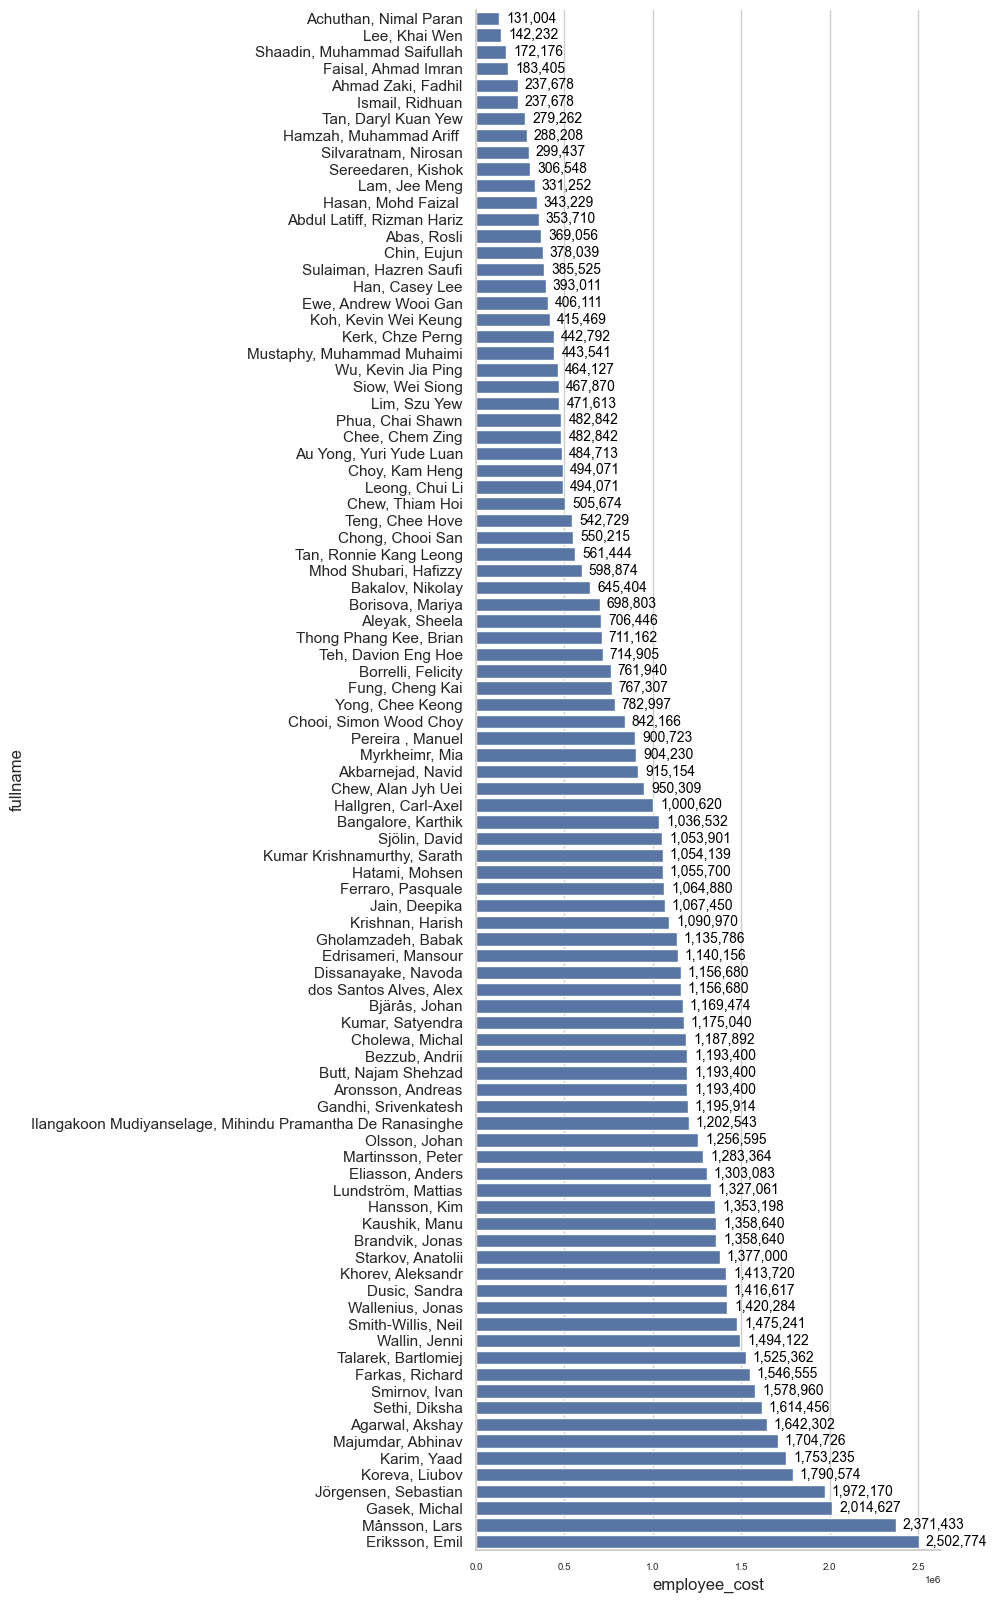

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# if this works, move up to top of notebook
# good answer on topic of barchart legibility https://stackoverflow.com/questions/42528921/how-to-prevent-overlapping-x-axis-labels-in-sns-countplot
plt.rcParams["figure.figsize"] = (20, 20) # width, height
plt.rcParams["xtick.labelsize"] = 7
pd.options.display.float_format = '{:,.0f}'.format
plt.figure(figsize=(6, 20)) # width, height

## Exclude employees with employee_cost = NaN (since contractors do not have a salary, employee_cost can not calculated and is NaN)
df_active_temp = df_active.dropna(subset=['employee_cost'])

ax = sns.barplot(df_active_temp, x="employee_cost", y="fullname", errorbar=None, orient="h")
#ax = sns.barplot(df_active_temp, x="employee_cost", y="fullname", errorbar=None, orient="h", palette="coolwarm")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

labels = df_active_temp['employee_cost']
xlabels = [format(labels, ',.0f') for labels in labels]

ax.bar_label(ax.containers[0], labels=xlabels, label_type='edge', color='black', rotation=0, fontsize=10, padding=5)

plt.show()

Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.


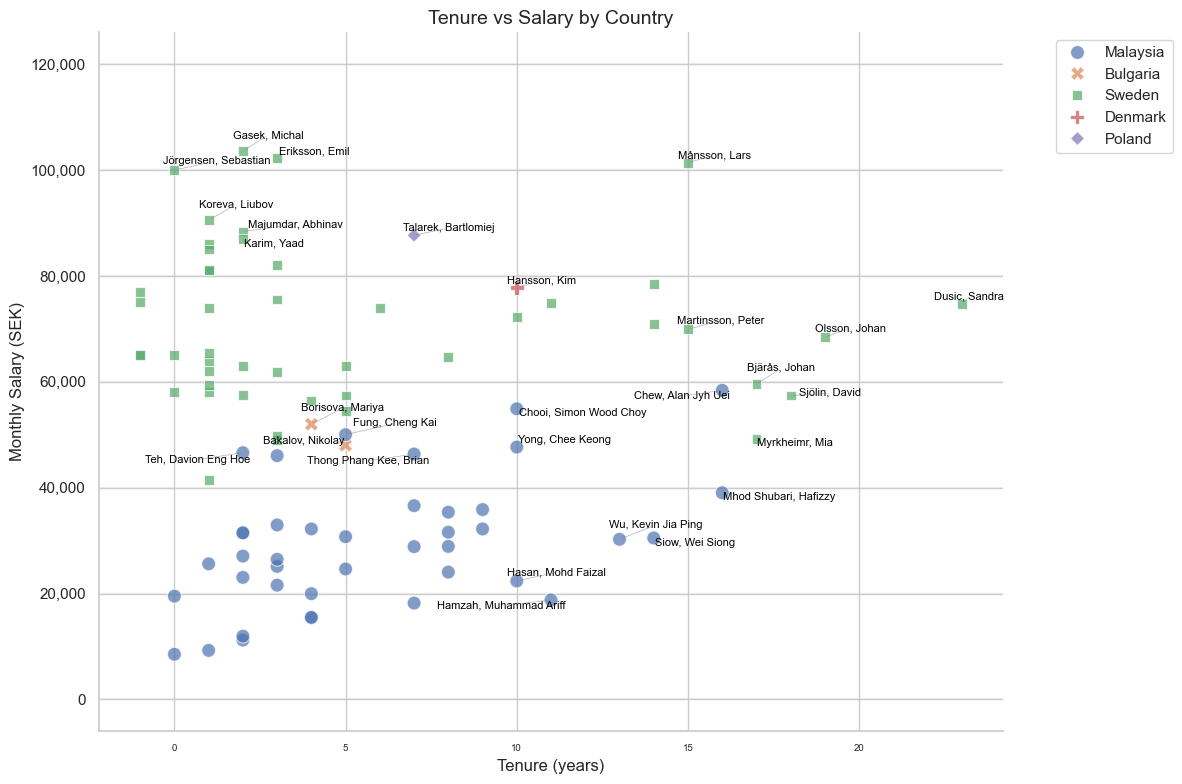

In [ ]:
from adjustText import adjust_text
import matplotlib.ticker as ticker

# Display tenure against salary and/or age, per country, and identify outliers
plt.figure(figsize=(12, 8))
plt.title('Tenure vs Salary by Country', fontsize=14)

# Create the scatter plot with inverted axes
scatter = sns.scatterplot(
    data=df_active_temp, 
    x='tenure',  # Now tenure is on x-axis
    y='salary_sek',  # Now salary is on y-axis
    hue='country', 
    style='country', 
    s=100,
    alpha=0.7
)

# Format the y-axis to show thousands separator (for salary)
scatter.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Add horizontal grid lines for every major Y-axis tick
for ytick in scatter.get_yticks():
    plt.axhline(y=ytick, color='lightgrey', linestyle='-', alpha=0.3, zorder=0)

# Improve labels (switched)
plt.xlabel('Tenure (years)', fontsize=12)
plt.ylabel('Monthly Salary (SEK)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotate outliers in both dimensions - salary and tenure
texts = []
for country in df_active_temp['country'].unique():
    country_data = df_active_temp[df_active_temp['country'] == country]
    
    # Top tenure employees (15%)
    top_percent_tenure = max(1, int(len(country_data) * 0.15))
    top_tenure = country_data.nlargest(top_percent_tenure, 'tenure')
    
    # Top salary employees (15%)
    top_percent_salary = max(1, int(len(country_data) * 0.15))
    top_salary = country_data.nlargest(top_percent_salary, 'salary_sek')
    
    # Combine both sets and remove duplicates
    combined_outliers = pd.concat([top_tenure, top_salary]).drop_duplicates()
    
    for _, employee in combined_outliers.iterrows():
        texts.append(plt.text(
            employee['tenure'],  # Now tenure is x coordinate
            employee['salary_sek'],  # Now salary is y coordinate
            f"{employee['lname']}, {employee['fname']}", 
            fontsize=8,
            color='black',
            ha='center'
        ))

# Adjust text to avoid overlapping
adjust_text(
    texts, 
    arrowprops=dict(arrowstyle='-', color='grey', alpha=0.6, lw=0.5),
    expand_points=(2, 5),
    force_text=(0.5, 1),
    force_points=(0.5, 0.5)
)

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


# People eligible for bonus / have a variable component to their compensation

In [ ]:
## list people currently eligible for bonus
## display a filtered list of active employees - all entries with non null bonus value

print("People with bonuses/variable pay at ProdTech (ordered by bonus % of total comp) [ ",
      '\033[1m' + str(len(df_active.bonus.value_counts())) + '\033[0m',
      "]")

display(df_active[df_active['bonus'].notnull()][[
    "lname",
    "fname",
    "title",
    "gender",
    "age",
    "salary_sek",
    "bonus_sek",
    "TTC_sek",
    "bonus_percentage",
    "employee_cost",
    "country",
    "tenure",
    ]]
    .sort_values(by='bonus_percentage', ascending=False)
    .style
    .format(format_mapping)
    .hide(axis='index') 
    .highlight_max(subset=['bonus_percentage'], color='peachfuzz')
    .highlight_min(subset=['bonus_percentage'], color='peachfuzz')
    # silver grey for total employee cost to company
    .bar(color='silver', vmin=10000, subset=['employee_cost'], align='left')
    # green for compensation numbers
    .bar(color='#3CB371', vmin=100000, subset=['TTC_sek'], align='zero')  # Medium Sea Green
    .bar(color='#98FB98', vmin=15000, subset=['salary_sek'], align='zero')  # Pale Green
    .bar(color='#90EE90', vmin=15000, subset=['bonus_sek'], align='zero')  # Light Green
    # light purple for tenure
    .bar(color='thistle', vmin=0, subset=['tenure'], align='zero')
    # blue for bonus %
    .bar(color='#4682B4', vmin=0, subset=['bonus_percentage'], align='zero')
    .applymap(highlight_female, subset=["gender"])
)
print("\n")


People with bonuses/variable pay at ProdTech (ordered by bonus % of total comp) [  16 ]


lname,fname,title,gender,age,salary_sek,bonus_sek,TTC_sek,bonus_percentage,employee_cost,country,tenure
Eriksson,Emil,Head of Products,Male,40,"102,200","460,000","1,635,800",27%,"2,502,774 SEK",Sweden,3
Månsson,Lars,Commercial Product Manager,Male,47,"101,395","374,400","1,549,956",24%,"2,371,433 SEK",Sweden,15
Karim,Yaad,CISO,nan,35,"87,000","114,500","1,145,905",10%,"1,753,235 SEK",Sweden,2
Koreva,Liubov,Head of Engineering Operations,Female,39,"90,480","95,000","1,170,310",8%,"1,790,574 SEK",Sweden,1
Yong,Chee Keong,Technical Product Manager,Male,55,"47,675","49,190","663,557",8%,"782,997 SEK",Malaysia,10
Jörgensen,Sebastian,Lead Architect,Male,49,"100,000","100,000","1,289,000",8%,"1,972,170 SEK",Sweden,0
Sethi,Diksha,Group Product Manager,Female,38,"82,000","80,000","1,055,200",8%,"1,614,456 SEK",Sweden,3
Bjärås,Johan,Alliance Technical Account Manager,Male,61,"59,532","56,155","764,362",7%,"1,169,474 SEK",Sweden,17
Chew,Alan Jyh Uei,Engineering Manager,Male,36,"58,392","51,972","805,346",7%,"950,309 SEK",Malaysia,16
Smith-Willis,Neil,Lead Product Owner,Male,52,"75,530","65,000","964,210",7%,"1,475,241 SEK",Sweden,3


## Salary listing by country and job title (with quartiles)

To answer the question: "who are the top 25% software engineers (or other function) in a given country by pay level?"

In [ ]:
## SEGMENTATION AND STATISTICAL ANALYSIS, BY COUNTRY FIRST, THEN BY JOB TITLE

def color_quartile(val):
    color = 'white'
    if val == '0-25%':
        color = 'lightcoral'
    elif val == '25-50%':
        color = 'orange'
    elif val == '50-75%':
        color = 'yellow'
    elif val == '75-100%':
        color = 'lightyellow'
    return 'background-color: %s' % color


## Iterate through countries
for x in df_active.country.unique():
    print("COUNTRY=", x)
    # df_temp = df_active[df_active.country.str.startswith(x)]
    df_temp = df_active[df_active.country == x]
    df_temp = df_temp.groupby("title").filter(lambda x: len(x) > 2)
    # display(df_temp)
    ## Iterate through job titles
    for t in df_temp.title.unique():
        if pd.notna(t):
            print("TITLE=", t)
            df_temp2 = df_temp[df_temp.title == t]
            ## CALCULATE WHAT QUARTILE THE EMPLOYEE IS IN (BASED ON TTC_SEK)
            # calculate the quartiles - need to handle the case where there are too few distinct values
            try:
                quartiles = pd.qcut(
                    df_temp2["TTC_sek"],
                    q=[0, 0.25, 0.5, 0.75, 1],
                    labels=["0-25%", "25-50%", "50-75%", "75-100%"],
                    duplicates="drop"
                )
            except ValueError:
                # If we can't create 4 quartiles (e.g., not enough distinct values),
                # use rank-based approach to assign quartiles more evenly
                rank_pct = df_temp2["TTC_sek"].rank(pct=True)
                bins = [0, 0.25, 0.5, 0.75, 1.0]
                quartile_labels = ["0-25%", "25-50%", "50-75%", "75-100%"]
                quartiles = pd.cut(rank_pct, bins=bins, labels=quartile_labels, include_lowest=True)
            # quartiles = pd.qcut(df_temp2['TTC_sek'], q=[0, 0.25, 0.5, 0.75, 1],duplicates='drop')
            # add the quartiles to the DataFrame
            df_temp2["quartile_for_job_title"] = quartiles
            # sort by quartile
            df_temp2 = df_temp2.sort_values(
                by=["quartile_for_job_title", "TTC_sek"], ascending=True
            )
            display(df_temp2[[
                        "lname",
                        "fname",
                        "gender",
                        "age",
                        "title",
                        "salary_sek",
                        "bonus_sek",
                        #"bonus_percentage",
                        "TTC_sek",
                        "employee_cost",
                        "quartile_for_job_title",
                        "country",
                        "tenure",
                        #"ismanager",
                    ]]
                    .style
                    .format(format_mapping)
                    .hide(axis='index') 
                    .highlight_max(subset=['age'], color='peachfuzz')
                    .highlight_min(subset=['age'], color='peachfuzz')
                    # silver grey for total employee cost to company
                    .bar(color='silver', vmin=10000, subset=['employee_cost'], align='left')
                    # green for compensation numbers
                    .bar(color='#3CB371', vmin=100000, subset=['TTC_sek'], align='zero')  # Medium Sea Green
                    .bar(color='#98FB98', vmin=15000, subset=['salary_sek'], align='zero')  # Pale Green
                    .bar(color='#90EE90', vmin=15000, subset=['bonus_sek'], align='zero')  # Light Green
                    # light purple for tenure
                    .bar(color='thistle', vmin=0, subset=['tenure'], align='zero')
                    # blue for bonus %
                    #.bar(color='#4682B4', vmin=0, subset=['bonus_percentage'], align='zero')
                    .applymap(highlight_female, subset=["gender"])
                    .applymap(color_quartile, subset=['quartile_for_job_title'])
            )
            print("\n")

COUNTRY= Malaysia
TITLE= L1 Support Engineer


lname,fname,gender,age,title,salary_sek,bonus_sek,TTC_sek,employee_cost,quartile_for_job_title,country,tenure
Achuthan,Nimal Paran,Male,25,L1 Support Engineer,"8,540",,"111,020","131,004 SEK",0-25%,Malaysia,0
Lee,Khai Wen,Male,25,L1 Support Engineer,"9,272",,"120,536","142,232 SEK",0-25%,Malaysia,1
Shaadin,Muhammad Saifullah,Male,30,L1 Support Engineer,"11,224",,"145,912","172,176 SEK",25-50%,Malaysia,2
Faisal,Ahmad Imran,Male,28,L1 Support Engineer,"11,956",,"155,428","183,405 SEK",50-75%,Malaysia,2
Hamzah,Muhammad Ariff,Male,39,L1 Support Engineer,"18,788",,"244,244","288,208 SEK",75-100%,Malaysia,11
Hasan,Mohd Faizal,Male,48,L1 Support Engineer,"22,375",,"290,872","343,229 SEK",75-100%,Malaysia,10




TITLE= L2 Support Engineer


lname,fname,gender,age,title,salary_sek,bonus_sek,TTC_sek,employee_cost,quartile_for_job_title,country,tenure
Ahmad Zaki,Fadhil,Male,31,L2 Support Engineer,"15,494",,"201,422","237,678 SEK",25-50%,Malaysia,4
Ismail,Ridhuan,Male,29,L2 Support Engineer,"15,494",,"201,422","237,678 SEK",25-50%,Malaysia,4
Sereedaren,Kishok,Male,33,L2 Support Engineer,"19,984",,"259,787","306,548 SEK",50-75%,Malaysia,4
Abas,Rosli,Male,49,L2 Support Engineer,"24,058",,"312,759","369,056 SEK",75-100%,Malaysia,8
Mustaphy,Muhammad Muhaimi,Male,42,L2 Support Engineer,"28,914",,"375,882","443,541 SEK",75-100%,Malaysia,8




TITLE= Technical Writer


lname,fname,gender,age,title,salary_sek,bonus_sek,TTC_sek,employee_cost,quartile_for_job_title,country,tenure
Silvaratnam,Nirosan,Male,34,Technical Writer,"19,520",,"253,760","299,437 SEK",0-25%,Malaysia,0
Han,Casey Lee,Male,39,Technical Writer,"25,620",,"333,060","393,011 SEK",25-50%,Malaysia,1
Wu,Kevin Jia Ping,Male,36,Technical Writer,"30,256",,"393,328","464,127 SEK",75-100%,Malaysia,13




TITLE= Software Engineer


lname,fname,gender,age,title,salary_sek,bonus_sek,TTC_sek,employee_cost,quartile_for_job_title,country,tenure
Lam,Jee Meng,Male,28,Software Engineer,"21,594",,"280,722","331,252 SEK",0-25%,Malaysia,3
Abdul Latiff,Rizman Hariz,Male,34,Software Engineer,"23,058",,"299,754","353,710 SEK",0-25%,Malaysia,2
Chin,Eujun,Male,30,Software Engineer,"24,644",,"320,372","378,039 SEK",0-25%,Malaysia,5
Sulaiman,Hazren Saufi,Male,37,Software Engineer,"25,132",,"326,716","385,525 SEK",0-25%,Malaysia,3
Ewe,Andrew Wooi Gan,Male,37,Software Engineer,"26,474",,"344,162","406,111 SEK",25-50%,Malaysia,3
Koh,Kevin Wei Keung,Male,34,Software Engineer,"27,084",,"352,092","415,469 SEK",25-50%,Malaysia,2
Siow,Wei Siong,Male,36,Software Engineer,"30,500",,"396,500","467,870 SEK",25-50%,Malaysia,14
Lim,Szu Yew,Male,35,Software Engineer,"30,744",,"399,672","471,613 SEK",25-50%,Malaysia,5
Phua,Chai Shawn,nan,27,Software Engineer,"31,476",,"409,188","482,842 SEK",50-75%,Malaysia,2
Chee,Chem Zing,Male,33,Software Engineer,"31,476",,"409,188","482,842 SEK",50-75%,Malaysia,2




COUNTRY= Bulgaria
COUNTRY= Sweden
TITLE= Software Engineer


lname,fname,gender,age,title,salary_sek,bonus_sek,TTC_sek,employee_cost,quartile_for_job_title,country,tenure
Hallgren,Carl-Axel,Male,34,Software Engineer,"54,500",,"654,000","1,000,620 SEK",0-25%,Sweden,5
Bangalore,Karthik,Male,32,Software Engineer,"56,456",,"677,472","1,036,532 SEK",0-25%,Sweden,4
Sjölin,David,Male,46,Software Engineer,"57,402",,"688,824","1,053,901 SEK",0-25%,Sweden,18
Ferraro,Pasquale,Male,26,Software Engineer,"58,000",,"696,000","1,064,880 SEK",0-25%,Sweden,0
Krishnan,Harish,Male,32,Software Engineer,"59,421",,"713,052","1,090,970 SEK",0-25%,Sweden,1
Gholamzadeh,Babak,Male,33,Software Engineer,"61,862",,"742,344","1,135,786 SEK",25-50%,Sweden,3
Edrisameri,Mansour,Male,44,Software Engineer,"62,100",,"745,200","1,140,156 SEK",25-50%,Sweden,1
dos Santos Alves,Alex,Male,43,Software Engineer,"63,000",,"756,000","1,156,680 SEK",25-50%,Sweden,5
Kumar,Satyendra,nan,35,Software Engineer,"64,000",,"768,000","1,175,040 SEK",25-50%,Sweden,1
Cholewa,Michal,Male,39,Software Engineer,"64,700",,"776,400","1,187,892 SEK",50-75%,Sweden,8




TITLE= DevOps Engineer


lname,fname,gender,age,title,salary_sek,bonus_sek,TTC_sek,employee_cost,quartile_for_job_title,country,tenure
Kumar Krishnamurthy,Sarath,Male,31,DevOps Engineer,"57,415",,"688,980","1,054,139 SEK",0-25%,Sweden,5
Hatami,Mohsen,Male,29,DevOps Engineer,"57,500",,"690,000","1,055,700 SEK",25-50%,Sweden,2
Jain,Deepika,Female,35,DevOps Engineer,"58,140",,"697,680","1,067,450 SEK",50-75%,Sweden,1
Olsson,Johan,Male,51,DevOps Engineer,"68,442",,"821,304","1,256,595 SEK",75-100%,Sweden,19




COUNTRY= Denmark
COUNTRY= Poland
COUNTRY= Japan


## Salary listing by country with quartiles

To answer the question: "who are the top 25% employees (by salary) in each country?"

In [ ]:
## SEGMENTATION AND STATISTICAL ANALYSIS, BY COUNTRY FIRST, THEN BY FUNCTION
   
## Iterate through countries
for x in df_active.country.unique():
    df_temp = df_active[df_active.country == x]
    
    # Check if there are fewer than 2 people in the country
    if len(df_temp) < 2:
        print(f"fewer than 2 people in {x} - skipping")
        continue
    
    quartiles = pd.qcut(
        df_temp["TTC_sek"],
        q=[0, 0.25, 0.5, 0.75, 1],
        labels=["0-25%", "25-50%", "50-75%", "75-100%"],
        duplicates="drop",
    )
    
    # add the quartiles to the DataFrame
    df_temp["quartile_for_country"] = quartiles
    # sort by quartile
    df_temp = df_temp.sort_values(
        by=["quartile_for_country", "TTC_sek"], ascending=True
    )
    display(df_temp[[
                "lname",
                "fname",
                "gender",
                "age",
                "title",
                "salary_sek",
                "bonus_sek",
                #"bonus_percentage",
                "TTC_sek",
                "employee_cost",
                "quartile_for_country",
                "country",
                "tenure",
                #"ismanager",
            ]]
            .style
            .format(format_mapping)
            .hide(axis='index') 
            .highlight_max(subset=['age'], color='peachfuzz')
            .highlight_min(subset=['age'], color='peachfuzz')
            # silver grey for total employee cost to company
            .bar(color='silver', vmin=10000, subset=['employee_cost'], align='left')
            # green for compensation numbers
            .bar(color='#3CB371', vmin=100000, subset=['TTC_sek'], align='zero')  # Medium Sea Green
            .bar(color='#98FB98', vmin=15000, subset=['salary_sek'], align='zero')  # Pale Green
            .bar(color='#90EE90', vmin=15000, subset=['bonus_sek'], align='zero')  # Light Green
            # light purple for tenure
            .bar(color='thistle', vmin=0, subset=['tenure'], align='zero')
            # blue for bonus %
            #.bar(color='#4682B4', vmin=0, subset=['bonus_percentage'], align='zero')
            .applymap(highlight_female, subset=["gender"])
            .applymap(color_quartile, subset=['quartile_for_country'])
    )
    print("\n")
            

lname,fname,gender,age,title,salary_sek,bonus_sek,TTC_sek,employee_cost,quartile_for_country,country,tenure
Achuthan,Nimal Paran,Male,25,L1 Support Engineer,"8,540",,"111,020","131,004 SEK",0-25%,Malaysia,0
Lee,Khai Wen,Male,25,L1 Support Engineer,"9,272",,"120,536","142,232 SEK",0-25%,Malaysia,1
Shaadin,Muhammad Saifullah,Male,30,L1 Support Engineer,"11,224",,"145,912","172,176 SEK",0-25%,Malaysia,2
Faisal,Ahmad Imran,Male,28,L1 Support Engineer,"11,956",,"155,428","183,405 SEK",0-25%,Malaysia,2
Ahmad Zaki,Fadhil,Male,31,L2 Support Engineer,"15,494",,"201,422","237,678 SEK",0-25%,Malaysia,4
Ismail,Ridhuan,Male,29,L2 Support Engineer,"15,494",,"201,422","237,678 SEK",0-25%,Malaysia,4
Tan,Daryl Kuan Yew,Male,34,Product Designer,"18,205",,"236,663","279,262 SEK",0-25%,Malaysia,7
Hamzah,Muhammad Ariff,Male,39,L1 Support Engineer,"18,788",,"244,244","288,208 SEK",0-25%,Malaysia,11
Silvaratnam,Nirosan,Male,34,Technical Writer,"19,520",,"253,760","299,437 SEK",0-25%,Malaysia,0
Sereedaren,Kishok,Male,33,L2 Support Engineer,"19,984",,"259,787","306,548 SEK",0-25%,Malaysia,4


lname,fname,gender,age,title,salary_sek,bonus_sek,TTC_sek,employee_cost,quartile_for_country,country,tenure
Bakalov,Nikolay,Male,53,L3 Support Engineer,"48,021",,"576,254","645,404 SEK",0-25%,Bulgaria,5
Borisova,Mariya,Female,38,L3 Team Lead,"51,994",,"623,931","698,803 SEK",75-100%,Bulgaria,4


lname,fname,gender,age,title,salary_sek,bonus_sek,TTC_sek,employee_cost,quartile_for_country,country,tenure
Borrelli,Felicity,Female,37,Technical Writer,"41,500",,"498,000","761,940 SEK",0-25%,Sweden,1
Pereira,Manuel,Male,31,QA Engineer,"49,059",,"588,708","900,723 SEK",0-25%,Sweden,3
Myrkheimr,Mia,Female,55,Support Quality Specialist,"49,250",,"591,000","904,230 SEK",0-25%,Sweden,17
Akbarnejad,Navid,Male,32,Product Designer,"49,845",,"598,140","915,154 SEK",0-25%,Sweden,3
Hallgren,Carl-Axel,Male,34,Software Engineer,"54,500",,"654,000","1,000,620 SEK",0-25%,Sweden,5
Bangalore,Karthik,Male,32,Software Engineer,"56,456",,"677,472","1,036,532 SEK",0-25%,Sweden,4
Sjölin,David,Male,46,Software Engineer,"57,402",,"688,824","1,053,901 SEK",0-25%,Sweden,18
Kumar Krishnamurthy,Sarath,Male,31,DevOps Engineer,"57,415",,"688,980","1,054,139 SEK",0-25%,Sweden,5
Hatami,Mohsen,Male,29,DevOps Engineer,"57,500",,"690,000","1,055,700 SEK",0-25%,Sweden,2
Ferraro,Pasquale,Male,26,Software Engineer,"58,000",,"696,000","1,064,880 SEK",0-25%,Sweden,0




fewer than 2 people in Denmark - skipping
fewer than 2 people in Poland - skipping
fewer than 2 people in Japan - skipping


# MY TEAM

In [ ]:
df_temp = df_active[df_active.manager == "L'Her, Demed"]
#display(df_temp)
display(df_temp[[
            "lname",
            "fname",
            "gender",
            "age",
            "title",
            "salary_sek",
            "bonus_sek",
            "TTC_sek",
            "bonus_percentage",
            "employee_cost",
            "country",
            "tenure"
        ]]
        .style
        .format(format_mapping)
        .hide(axis='index') 
        .highlight_max(subset=['age'], color='peachfuzz')
        .highlight_min(subset=['age'], color='peachfuzz')
        .highlight_null(subset=['gender'], color='lightgrey')
        #.background_gradient(subset=['quartile_for_job_title'], cmap='BuGn')
        # silver grey for total employee cost to company
        .bar(color='silver', vmin=10000, subset=['employee_cost'], align='left')
        # green for compensation numbers
        .bar(color='#3CB371', vmin=100000, subset=['TTC_sek'], align='zero')  # Medium Sea Green
        .bar(color='#98FB98', vmin=15000, subset=['salary_sek'], align='zero')  # Pale Green
        .bar(color='#90EE90', vmin=15000, subset=['bonus_sek'], align='zero')  # Light Green
        # light purple for tenure
        .bar(color='thistle', vmin=0, subset=['tenure'], align='zero')
        # blue for bonus %
        .bar(color='#4682B4', vmin=0, subset=['bonus_percentage'], align='zero')
        #.set_caption('Cost per CC')
)
print("\n")

lname,fname,gender,age,title,salary_sek,bonus_sek,TTC_sek,bonus_percentage,employee_cost,country,tenure
Chew,Alan Jyh Uei,Male,36,Engineering Manager,"58,392","51,972","805,346",7%,"950,309 SEK",Malaysia,16
Hansson,Kim,Male,37,Head of Customer Support,"77,770",,"933,240",,"1,353,198 SEK",Denmark,10
Agarwal,Akshay,Male,42,Engineering Manager,"85,000","60,000","1,073,400",6%,"1,642,302 SEK",Sweden,1
Majumdar,Abhinav,Male,42,Engineering Manager,"88,400","60,000","1,114,200",5%,"1,704,726 SEK",Sweden,2
Karim,Yaad,nan,35,CISO,"87,000","114,500","1,145,905",10%,"1,753,235 SEK",Sweden,2
Koreva,Liubov,Female,39,Head of Engineering Operations,"90,480","95,000","1,170,310",8%,"1,790,574 SEK",Sweden,1
Jörgensen,Sebastian,Male,49,Lead Architect,"100,000","100,000","1,289,000",8%,"1,972,170 SEK",Sweden,0
Gasek,Michal,Male,41,Lead Architect,"103,600","82,640","1,316,750",6%,"2,014,627 SEK",Sweden,2
Eriksson,Emil,Male,40,Head of Products,"102,200","460,000","1,635,800",27%,"2,502,774 SEK",Sweden,3


In [ ]:
## FOR GRO REPORTING

# Filter out Customer Support function from df_active
r_and_d_team = df_active[df_active.function != "Customer Support"]

# Calculate total number of active R&D members
total_r_and_d = len(r_and_d_team)

# Calculate total annual cost
total_r_and_d_cost = r_and_d_team["employee_cost"].sum()

# Display the results
print(f"Total ProdTech staff: {len(df_active)}")
print(f"Total R&D staff (excluding Support): {total_r_and_d}")
print(f"Percentage of R&D staff: {total_r_and_d / len(df_active):.1%}")
print(f"Total annual R&D cost: {total_r_and_d_cost:,.0f} SEK")
print(f"Average annual cost per R&D member: {total_r_and_d_cost / total_r_and_d:,.0f} SEK")

# Show breakdown by function
function_counts = r_and_d_team.function.value_counts().sort_values(ascending=False)
print("\nR&D staff breakdown by function:")
for function, count in function_counts.items():
    print(f"{function}: {count} ({count/total_r_and_d:.1%})")
    

# Calculate R&D Management
# Define management roles
management_roles = ['Team Manager', 'Product Owner', 'Product Manager', 'Lead Product Manager', 
                    'Engineering Manager', 'Head of']

# Find R&D management staff (excluding Product Documentation and SRE)
r_and_d_management = r_and_d_team[
    (r_and_d_team['title'].str.contains('|'.join(management_roles), case=False, na=False)) &
    (~r_and_d_team['function'].isin(['Site Reliability Engineering'])) &
    (~r_and_d_team['dept'].isin(['Doc']))
]

# Count and print
print(f"\nR&D Management count: {len(r_and_d_management)} ({len(r_and_d_management)/total_r_and_d:.1%} of R&D)")

# Break down by role type
engineering_managers = r_and_d_management[r_and_d_management['title'].str.contains('Engineering Manager|Team Manager|Head of Engineering', case=False)]
product_managers = r_and_d_management[r_and_d_management['title'].str.contains('Product Manager|Head of Product', case=False) & ~r_and_d_management['title'].str.contains('Owner', case=False)]
product_owners = r_and_d_management[r_and_d_management['title'].str.contains('Product Owner', case=False)]

# Print breakdown by role type
print("\nBreakdown by role type:")
print(f"Engineering Managers: {len(engineering_managers)} ({len(engineering_managers)/len(r_and_d_management):.1%})")
print(f"Product Managers: {len(product_managers)} ({len(product_managers)/len(r_and_d_management):.1%})")
print(f"Product Owners: {len(product_owners)} ({len(product_owners)/len(r_and_d_management):.1%})")

# List the R&D management staff by category
print("\nEngineering Management staff:")
for index, row in engineering_managers.sort_values('title').iterrows():
    print(f"- {row['fname']} {row['lname']}: {row['title']}")

print("\nProduct Management staff:")
for index, row in product_managers.sort_values('title').iterrows():
    print(f"- {row['fname']} {row['lname']}: {row['title']}")

print("\nProduct Owners:")
for index, row in product_owners.sort_values('title').iterrows():
    print(f"- {row['fname']} {row['lname']}: {row['title']}")

Total ProdTech staff: 96
Total R&D staff (excluding Support): 77
Percentage of R&D staff: 80.2%
Total annual R&D cost: 76,292,198 SEK
Average annual cost per R&D member: 990,808 SEK

R&D staff breakdown by function:
Engineering: 44 (57.1%)
PM: 21 (27.3%)
Engineering Operations: 11 (14.3%)
Security: 1 (1.3%)

R&D Management count: 13 (16.9% of R&D)

Breakdown by role type:
Engineering Managers: 4 (30.8%)
Product Managers: 6 (46.2%)
Product Owners: 3 (23.1%)

Engineering Management staff:
- Alan Jyh Uei Chew: Engineering Manager
- Akshay Agarwal: Engineering Manager
- Abhinav Majumdar: Engineering Manager
- Liubov Koreva: Head of Engineering Operations

Product Management staff:
- Lars Månsson: Commercial Product Manager
- Diksha Sethi: Group Product Manager
- Emil Eriksson: Head of Products
- Gaurav Dixit: Lead Product Manager, Analytics and Machine Learning
- Chee Keong Yong: Technical Product Manager
- Sandra Dusic: Technical Product Manager

Product Owners:
- Neil Smith-Willis: Lead 

In [ ]:
# Find employees with "Architect" in their title
architects = r_and_d_team[r_and_d_team['title'].str.contains('Architect', case=False, na=False)]

# Count and display information about architects
print(f"Number of architects at ProdTech: {len(architects)}")
print("\nArchitects by function:")
print(architects.groupby('function').size())

print("\nArchitects by type:")
architect_types = architects.groupby('title').size().sort_values(ascending=False)
print(architect_types)

# Calculate average salary of architects
avg_salary = architects['salary_sek'].mean()
print(f"\nAverage monthly salary for architects: {avg_salary:,.0f} SEK")

# Display more detailed information about architects
print("\nArchitects details:")
display(architects[['lname', 'fname', 'title', 'function', 'country', 'salary_sek']].sort_values(by='title'))

Number of architects at ProdTech: 3

Architects by function:
function
Engineering    3
dtype: int64

Architects by type:
title
Lead Architect        2
Software Architect    1
dtype: int64

Average monthly salary for architects: 91,960 SEK

Architects details:


,lname,fname,title,function,country,salary_sek
218,Jörgensen,Sebastian,Lead Architect,Engineering,Sweden,"100,000"
190,Gasek,Michal,Lead Architect,Engineering,Sweden,"103,600"
27,Lundström,Mattias,Software Architect,Engineering,Sweden,"72,280"


In [ ]:
# Calculate total annual cost and headcount by country and function
cost_by_country_function = df_active.pivot_table(
    values='employee_cost', 
    index='country', 
    columns='function', 
    aggfunc='sum',
    fill_value=0
)

# Calculate headcount by country and function
headcount_by_country_function = df_active.pivot_table(
    values='lname', 
    index='country', 
    columns='function', 
    aggfunc='count',
    fill_value=0
)

# Add a row with totals by function for cost
cost_by_country_function.loc['Total'] = cost_by_country_function.sum()

# Add a column with totals by country for cost
cost_by_country_function['Total'] = cost_by_country_function.sum(axis=1)

# Calculate percentage of total cost for each country
total_cost = cost_by_country_function.loc['Total', 'Total']
cost_by_country_function['% of Total'] = cost_by_country_function['Total'] / total_cost * 100

# Add a row with totals by function for headcount
headcount_by_country_function.loc['Total'] = headcount_by_country_function.sum()

# Add a column with totals by country for headcount
headcount_by_country_function['Total'] = headcount_by_country_function.sum(axis=1)

# Calculate percentage of total headcount for each country
total_headcount = headcount_by_country_function.loc['Total', 'Total']
headcount_by_country_function['% of Total'] = headcount_by_country_function['Total'] / total_headcount * 100

# Sort by total cost descending
cost_by_country_function = cost_by_country_function.sort_values('Total', ascending=False)
headcount_by_country_function = headcount_by_country_function.reindex(cost_by_country_function.index)

# Display cost table
print("Annual cost by country and function (SEK):")
display(cost_by_country_function.style
        .format({
            'Customer Support': '{:,.0f}',
            'Engineering': '{:,.0f}',
            'PM': '{:,.0f}',
            'Site Reliability Engineering': '{:,.0f}',
            'Enablement': '{:,.0f}',
            'Security': '{:,.0f}',
            'Total': '{:,.0f}',
            '% of Total': '{:.1f}%'
        })
        .background_gradient(subset=['Total'], cmap='Blues')
        .background_gradient(subset=['% of Total'], cmap='Greens')
)

# Display headcount table
print("\nHeadcount by country and function:")
display(headcount_by_country_function.style
        .format({
            'Total': '{:,.0f}',
            '% of Total': '{:.1f}%'
        })
        .background_gradient(subset=['Total'], cmap='Blues')
        .background_gradient(subset=['% of Total'], cmap='Greens')
)


# Calculate average cost per employee globally and by country
average_cost = total_people_cost / total_headcount
average_cost_by_country = df_active.groupby('country')['employee_cost'].sum() / df_active.groupby('country').size()

print(f"\nAverage annual cost per employee globally: {average_cost:,.0f} SEK")
print("\nAverage annual cost per employee by country:")
for country, avg in average_cost_by_country.sort_values(ascending=False).items():
    print(f"{country}: {avg:,.0f} SEK")

# Create tables for each function
print("\n\n--- BREAKDOWN BY FUNCTION ---\n")

for function_name in df_active['function'].unique():
    # Filter data for current function
    function_data = df_active[df_active['function'] == function_name]
    
    # Calculate metrics by country
    function_by_country = function_data.groupby('country').agg({
        'lname': 'count',
        'employee_cost': 'sum'
    }).reset_index()
    
    # Calculate total metrics for this function
    total_count = function_by_country['lname'].sum()
    total_cost = function_by_country['employee_cost'].sum()
    
    # Add percentage columns
    function_by_country['percent_headcount'] = function_by_country['lname'] / total_count * 100
    function_by_country['percent_cost'] = function_by_country['employee_cost'] / total_cost * 100
    
    # Sort by headcount in descending order
    function_by_country = function_by_country.sort_values('lname', ascending=False)
    
    # Add a total row
    total_row = pd.DataFrame({
        'country': ['Total'],
        'lname': [total_count],
        'percent_headcount': [100],
        'employee_cost': [total_cost],
        'percent_cost': [100]
    })
    function_table = pd.concat([function_by_country, total_row], ignore_index=True)
    
    # Display the table with nice formatting and columns in the requested order
    print(f"\n{function_name} Team by Country:")
    display(function_table.rename(columns={
        'lname': 'Headcount',
        'percent_headcount': '% of Headcount',
        'employee_cost': 'Annual Cost (SEK)',
        'percent_cost': '% of Cost'
    })[['country', 'Headcount', '% of Headcount', 'Annual Cost (SEK)', '% of Cost']].style
    .format({
        'Annual Cost (SEK)': '{:,.0f}',
        '% of Headcount': '{:.0f}%',
        '% of Cost': '{:.0f}%'
    })
    .background_gradient(subset=['Headcount', '% of Headcount'], cmap='Blues')
    .background_gradient(subset=['Annual Cost (SEK)', '% of Cost'], cmap='Greens'))
    
    # Calculate average cost per employee for this function by country
    print(f"\nAverage annual cost per {function_name} employee by country:")
    for country, group in function_data.groupby('country'):
        avg = group['employee_cost'].mean()
        print(f"{country}: {avg:,.0f} SEK")
    
    # Calculate overall average for this function
    avg_cost = total_cost / total_count
    print(f"\nOverall average annual cost per {function_name} employee: {avg_cost:,.0f} SEK")

Annual cost by country and function (SEK):


function,Customer Support,Engineering,Engineering Operations,PM,Security,Total,% of Total
country,,,,,,,
Total,"9,529,092","43,556,332",10173387.380000,"20,809,245","1,753,235","85,821,291",100.0%
Sweden,"904,230","35,060,216",7381139.220000,"17,883,965","1,753,235","62,982,784",73.4%
Malaysia,"4,402,095","8,496,116",2792248.160000,"2,925,280",0,"18,615,739",21.7%
Poland,"1,525,362",0,0.000000,0,0,"1,525,362",1.8%
Denmark,"1,353,198",0,0.000000,0,0,"1,353,198",1.6%
Bulgaria,"1,344,207",0,0.000000,0,0,"1,344,207",1.6%
Japan,0,0,0.000000,0,0,0,0.0%



Headcount by country and function:


function,Customer Support,Engineering,Engineering Operations,PM,Security,Total,% of Total
country,,,,,,,
Total,19,44,11,21,1,96,100.0%
Sweden,1,27,6,15,1,50,52.1%
Malaysia,14,17,4,6,0,41,42.7%
Poland,1,0,0,0,0,1,1.0%
Denmark,1,0,0,0,0,1,1.0%
Bulgaria,2,0,0,0,0,2,2.1%
Japan,0,0,1,0,0,1,1.0%



Average annual cost per employee globally: 893,972 SEK

Average annual cost per employee by country:
Poland: 1,525,362 SEK
Denmark: 1,353,198 SEK
Sweden: 1,259,656 SEK
Bulgaria: 672,103 SEK
Malaysia: 454,042 SEK
Japan: 0 SEK


--- BREAKDOWN BY FUNCTION ---


Customer Support Team by Country:


,country,Headcount,% of Headcount,Annual Cost (SEK),% of Cost
0,Malaysia,14,74%,"4,402,095",46%
1,Bulgaria,2,11%,"1,344,207",14%
2,Denmark,1,5%,"1,353,198",14%
3,Poland,1,5%,"1,525,362",16%
4,Sweden,1,5%,"904,230",9%
5,Total,19,100%,"9,529,092",100%



Average annual cost per Customer Support employee by country:
Bulgaria: 672,103 SEK
Denmark: 1,353,198 SEK
Malaysia: 314,435 SEK
Poland: 1,525,362 SEK
Sweden: 904,230 SEK

Overall average annual cost per Customer Support employee: 501,531 SEK

PM Team by Country:


,country,Headcount,% of Headcount,Annual Cost (SEK),% of Cost
0,Sweden,15,71%,"17,883,965",86%
1,Malaysia,6,29%,"2,925,280",14%
2,Total,21,100%,"20,809,245",100%



Average annual cost per PM employee by country:
Malaysia: 487,547 SEK
Sweden: 1,490,330 SEK

Overall average annual cost per PM employee: 990,916 SEK

Engineering Team by Country:


,country,Headcount,% of Headcount,Annual Cost (SEK),% of Cost
0,Sweden,27,61%,"35,060,216",80%
1,Malaysia,17,39%,"8,496,116",20%
2,Total,44,100%,"43,556,332",100%



Average annual cost per Engineering employee by country:
Malaysia: 499,772 SEK
Sweden: 1,298,527 SEK

Overall average annual cost per Engineering employee: 989,917 SEK

Engineering Operations Team by Country:


,country,Headcount,% of Headcount,Annual Cost (SEK),% of Cost
0,Sweden,6,55%,"7,381,139",73%
1,Malaysia,4,36%,"2,792,248",27%
2,Japan,1,9%,0,0%
3,Total,11,100%,"10,173,387",100%



Average annual cost per Engineering Operations employee by country:
Japan: nan SEK
Malaysia: 698,062 SEK
Sweden: 1,230,190 SEK

Overall average annual cost per Engineering Operations employee: 924,853 SEK

Security Team by Country:


,country,Headcount,% of Headcount,Annual Cost (SEK),% of Cost
0,Sweden,1,100%,"1,753,235",100%
1,Total,1,100%,"1,753,235",100%



Average annual cost per Security employee by country:
Sweden: 1,753,235 SEK

Overall average annual cost per Security employee: 1,753,235 SEK


# THINGS TO IMPLEMENT

* Want to know, for each product:
    * how many devs
    * how many PMs
    * etc.
* create managers only section, with average salaries etc
* switch from date-based notion of "current" employee to "active employment" field in DigiPeople
* is there a good chart type to visualize 3 dimensions: gender, tenure, salary
* some org chart view
* city info once I can find a reliable field in DigiPeople

Interesting metrics for DEI:

* employee retention numbers. Then segment these data according to age, race, gender, skills, and experience.
* gender ratio in retention, i.e. % gender in leavers, vs average in company
* plot the dots for individual pay above min/median/max but also one dimension of gender (and/or tenure)
* median salary by gender for given job title. Calculate gender pay gap.



In [ ]:
def create_org_chart(df):
    # Create a column with the employee's full name
    #df['fullname'] = df['lname'] + ', ' + df['fname']
    
    # Find the top-level manager (CTO)
    cto_candidates = df[df['manager'].isna()]
    
    if len(cto_candidates) > 0:
        cto = cto_candidates.iloc[0]['fullname']
        cto_title = cto_candidates.iloc[0]['title']
    else:
        # If we can't find anyone without a manager, look for someone with "CTO" in their title
        cto_candidates = df[df['title'].str.contains('CTO|Chief', case=False, na=False)]
        if len(cto_candidates) > 0:
            cto = cto_candidates.iloc[0]['fullname']
            cto_title = cto_candidates.iloc[0]['title']
        else:
            # Last resort: just pick the first person
            cto = df.iloc[0]['fullname']
            cto_title = df.iloc[0]['title']
    
    # Create the org chart as a hierarchical table
    org_data = []
    
    # Add the CTO (Level 1)
    org_data.append({
        'Level 1': f"{cto} ({cto_title})",
        'Level 2': '',
        'Level 3': '',
        'Level 4': '',
        'Level 5': ''
    })
    
    # Add Level 2 (direct reports to CTO)
    level2 = df[df['manager'] == cto].sort_values('lname')
    for _, emp2 in level2.iterrows():
        org_data.append({
            'Level 1': '',
            'Level 2': f"{emp2['fullname']} ({emp2['title']})",
            'Level 3': '',
            'Level 4': '',
            'Level 5': ''
        })
        
        # Add Level 3 (reports to Level 2)
        level3 = df[df['manager'] == emp2['fullname']].sort_values('lname')
        for _, emp3 in level3.iterrows():
            org_data.append({
                'Level 1': '',
                'Level 2': '',
                'Level 3': f"{emp3['fullname']} ({emp3['title']})",
                'Level 4': '',
                'Level 5': ''
            })
            
            # Add Level 4 (reports to Level 3)
            level4 = df[df['manager'] == emp3['fullname']].sort_values('lname')
            for _, emp4 in level4.iterrows():
                org_data.append({
                    'Level 1': '',
                    'Level 2': '',
                    'Level 3': '',
                    'Level 4': f"{emp4['fullname']} ({emp4['title']})",
                    'Level 5': ''
                })
                
                # Add Level 5 (reports to Level 4)
                level5 = df[df['manager'] == emp4['fullname']].sort_values('lname')
                for _, emp5 in level5.iterrows():
                    org_data.append({
                        'Level 1': '',
                        'Level 2': '',
                        'Level 3': '',
                        'Level 4': '',
                        'Level 5': f"{emp5['fullname']} ({emp5['title']})"
                    })
    
    # Convert to DataFrame
    org_chart = pd.DataFrame(org_data)
    
    return org_chart


# Generate the org chart
org_chart = create_org_chart(df_active)

# Display the org chart
display(org_chart)

,Level 1,Level 2,Level 3,Level 4,Level 5
0,"Achuthan, Nimal Paran (L1 Support Engineer)",,,,


In [ ]:
import pandas as pd

def build_org_chart_table(df):
    """
    Build an org chart table with hierarchy levels as columns
    Handles multiple top-level managers
    """
    # Find all top-level managers (those with no manager or manager not in dataset)
    top_managers = df[df['manager'].isna() | 
                     (df['manager'] == '') | 
                     ~df['manager'].isin(df['fullname'])]['fullname'].tolist()
    
    print(f"Found {len(top_managers)} top-level managers: {top_managers}")
    
    # Create a dictionary to store the org chart structure
    org_chart = []
    
    def get_reports(manager_name, level=0, management_chain=None):
        """Recursively get all reports for a manager"""
        if management_chain is None:
            management_chain = []
        
        reports = df[df['manager'] == manager_name]
        
        for _, employee in reports.iterrows():
            # Create a row for this employee
            row = {'Level_' + str(i): '' for i in range(10)}  # Max 10 levels
            row['Level_' + str(level)] = f"{employee['fullname']} ({employee['title']})"
            
            # Fill in the management chain above this employee
            for i, manager_info in enumerate(management_chain):
                row['Level_' + str(i)] = manager_info
            
            org_chart.append(row)
            
            # Recursively get reports of this employee
            new_chain = management_chain + [f"{employee['fullname']} ({employee['title']})"]
            get_reports(employee['fullname'], level + 1, new_chain)
    
    # Process each top manager separately
    for top_manager in top_managers:
        top_info = df[df['fullname'] == top_manager].iloc[0]
        root_row = {'Level_' + str(i): '' for i in range(10)}
        root_row['Level_0'] = f"{top_manager} ({top_info['title']})"
        org_chart.append(root_row)
        
        # Get all reports under this top manager
        get_reports(top_manager, 1, [f"{top_manager} ({top_info['title']})"])
    
    # Convert to DataFrame and clean up empty columns
    org_df = pd.DataFrame(org_chart)
    
    # Remove empty columns
    non_empty_cols = [col for col in org_df.columns if org_df[col].ne('').any()]
    org_df = org_df[non_empty_cols] if non_empty_cols else org_df[['Level_0']]
    
    return org_df

# Example usage
org_chart_table = build_org_chart_table(df_active)
print(org_chart_table)


Found 9 top-level managers: ['Chew, Alan Jyh Uei', 'Hansson, Kim', 'Agarwal, Akshay', 'Majumdar, Abhinav', 'Karim, Yaad', 'Koreva, Liubov', 'Jörgensen, Sebastian', 'Gasek, Michal', 'Eriksson, Emil']
                                            Level_0                                                                        Level_1                                            Level_2
0          Chew, Alan Jyh Uei (Engineering Manager)                                                                                                                                  
1          Chew, Alan Jyh Uei (Engineering Manager)                                              Lam, Jee Meng (Software Engineer)                                                   
2          Chew, Alan Jyh Uei (Engineering Manager)                                 Abdul Latiff, Rizman Hariz (Software Engineer)                                                   
3          Chew, Alan Jyh Uei (Engineering Manager)                      

In [ ]:
def create_reporting_structure(df):
    """
    Create a simplified org chart showing direct reports
    Handles multiple top-level managers
    """
    # Find top-level managers
    top_managers = df[df['manager'].isna() | 
                     (df['manager'] == '') | 
                     ~df['manager'].isin(df['fullname'])]['fullname'].tolist()
    
    reporting_structure = []
    
    # Add top-level managers first
    for top_manager in top_managers:
        manager_info = df[df['fullname'] == top_manager].iloc[0]
        reporting_structure.append({
            'Manager': 'TOP LEVEL',
            'Direct_Report': f"{top_manager} ({manager_info['title']})",
            'Report_Level': 0,
            'Org_Tree': top_manager
        })
    
    # Group by manager to show direct reports
    managers = df['manager'].dropna().unique()
    managers = [m for m in managers if m in df['fullname'].values]  # Only valid managers
    
    for manager in managers:
        reports = df[df['manager'] == manager]
        manager_info = df[df['fullname'] == manager]
        
        if not manager_info.empty:
            manager_title = manager_info.iloc[0]['title']
            # Find which org tree this manager belongs to
            org_tree = find_org_tree(df, manager, top_managers)
        else:
            manager_title = 'Unknown'
            org_tree = 'Unknown'
        
        for _, report in reports.iterrows():
            reporting_structure.append({
                'Manager': f"{manager} ({manager_title})",
                'Direct_Report': f"{report['fullname']} ({report['title']})",
                'Report_Level': get_level(df, report['fullname']),
                'Org_Tree': org_tree
            })
    
    return pd.DataFrame(reporting_structure)

def find_org_tree(df, employee_name, top_managers):
    """Find which top-level manager this employee ultimately reports to"""
    current = employee_name
    visited = set()
    
    while current and current not in top_managers and current not in visited:
        visited.add(current)
        employee_info = df[df['fullname'] == current]
        if employee_info.empty:
            break
        manager = employee_info.iloc[0]['manager']
        if pd.isna(manager) or manager == '':
            break
        current = manager
    
    return current if current in top_managers else 'Unknown'

def get_level(df, employee_name, level=0):
    """Get the hierarchical level of an employee"""
    employee = df[df['fullname'] == employee_name]
    
    if employee.empty or pd.isna(employee.iloc[0]['manager']) or employee.iloc[0]['manager'] == '':
        return level
    
    manager = employee.iloc[0]['manager']
    if manager not in df['fullname'].values:
        return level
    
    return get_level(df, manager, level + 1)

reporting_df = create_reporting_structure(df_active)
print(reporting_df.sort_values(['Org_Tree', 'Report_Level']))


                                            Manager                                                                  Direct_Report  Report_Level              Org_Tree
2                                         TOP LEVEL                                          Agarwal, Akshay (Engineering Manager)             0       Agarwal, Akshay
85            Agarwal, Akshay (Engineering Manager)                                        Hallgren, Carl-Axel (Software Engineer)             1       Agarwal, Akshay
86            Agarwal, Akshay (Engineering Manager)                                          Ferraro, Pasquale (Software Engineer)             1       Agarwal, Akshay
87            Agarwal, Akshay (Engineering Manager)                                           Krishnan, Harish (Software Engineer)             1       Agarwal, Akshay
88            Agarwal, Akshay (Engineering Manager)                                         Gholamzadeh, Babak (Software Engineer)             1       Agarwal, Aksha

In [ ]:
def display_org_trees(df):
    """
    Display multiple org charts as tree structures
    """
    # Find all top-level managers
    top_managers = df[df['manager'].isna() | 
                     (df['manager'] == '') | 
                     ~df['manager'].isin(df['fullname'])]['fullname'].tolist()
    
    print(f"Found {len(top_managers)} organizational trees:")
    print("=" * 60)
    
    for i, top_manager in enumerate(top_managers, 1):
        print(f"\nORGANIZATION TREE {i}:")
        print("-" * 30)
        display_single_tree(df, top_manager)

def display_single_tree(df, manager, level=0, visited=None):
    """
    Display a single org chart as a tree structure
    """
    if visited is None:
        visited = set()
    
    if manager in visited:
        return  # Prevent infinite loops
    
    visited.add(manager)
    
    # Get manager info
    manager_info = df[df['fullname'] == manager]
    if not manager_info.empty:
        title = manager_info.iloc[0]['title']
        indent = "  " * level
        print(f"{indent}{'└── ' if level > 0 else ''}{manager} ({title})")
        
        # Get direct reports
        reports = df[df['manager'] == manager]
        for _, report in reports.iterrows():
            display_single_tree(df, report['fullname'], level + 1, visited.copy())

# Display all org charts
display_org_trees(df_active)


Found 9 organizational trees:

ORGANIZATION TREE 1:
------------------------------
Chew, Alan Jyh Uei (Engineering Manager)
  └── Lam, Jee Meng (Software Engineer)
  └── Abdul Latiff, Rizman Hariz (Software Engineer)
  └── Chin, Eujun (Software Engineer)
  └── Sulaiman, Hazren Saufi (Software Engineer)
  └── Ewe, Andrew Wooi Gan (Software Engineer)
  └── Koh, Kevin Wei Keung (Software Engineer)
  └── Siow, Wei Siong (Software Engineer)
  └── Phua, Chai Shawn (Software Engineer)
  └── Chee, Chem Zing (Software Engineer)
  └── Au Yong, Yuri Yude Luan (Software Engineer)
  └── Choy, Kam Heng (Software Engineer)
  └── Leong, Chui Li (Software Engineer)
  └── Teng, Chee Hove (Software Engineer)
  └── Chong, Chooi San (QA Engineer)
  └── Tan, Ronnie Kang Leong (Software Engineer)
  └── Teh, Davion Eng Hoe (Software Engineer)

ORGANIZATION TREE 2:
------------------------------
Hansson, Kim (Head of Customer Support)
  └── Kerk, Chze Perng (L3 Support Engineer)
  └── Chew, Thiam Hoi (L3 Suppo

In [ ]:
def display_org_trees(df):
    """
    Display multiple org charts as tree structures with number of direct reports
    """
    # Find all top-level managers
    top_managers = df[df['manager'].isna() | 
                     (df['manager'] == '') | 
                     ~df['manager'].isin(df['fullname'])]['fullname'].tolist()
    
    print(f"Found {len(top_managers)} organizational trees:")
    print("=" * 60)
    
    for i, top_manager in enumerate(top_managers, 1):
        print(f"\nORGANIZATION TREE {i}:")
        print("-" * 30)
        display_single_tree(df, top_manager)

def display_single_tree(df, manager, level=0, visited=None):
    """
    Display a single org chart as a tree structure
    Shows fullname2 and includes the number of direct reports in parentheses
    Doesn't display individual contributor names at the lowest level
    """
    if visited is None:
        visited = set()
    
    if manager in visited:
        return  # Prevent infinite loops
    
    visited.add(manager)
    
    # Get manager info
    manager_info = df[df['fullname'] == manager]
    if not manager_info.empty:
        # Get the fullname2 version for display (first name + last name)
        fullname2 = manager_info.iloc[0]['fullname2']
        title = manager_info.iloc[0]['title']
        
        # Count direct reports
        direct_reports = df[df['manager'] == manager]
        num_direct_reports = len(direct_reports)
        
        # Check if this person manages other managers
        # Get the direct reports' fullnames
        direct_report_names = direct_reports['fullname'].tolist()
        # Check if any of these names appear as managers in the df
        has_manager_reports = False
        if direct_report_names:
            has_manager_reports = len(df[df['manager'].isin(direct_report_names)]) > 0
        
        # Display with direct reports count
        indent = "  " * level
        # Count total reports (direct and indirect)
        total_reports = len(df[df['manager'] == manager]) 
        if total_reports > 0:
            # Count indirect reports (people who report to direct reports)
            indirect_reports = 0
            for direct_report in direct_reports['fullname']:
                indirect_reports += len(df[df['manager'] == direct_report])
            
            # Determine total team size (direct + indirect)
            total_team_size = num_direct_reports + indirect_reports
            
            # Display with both direct reports and total team size
            print(f"{indent}{'  └── ' if level > 0 else ''}{fullname2} ({title}) - team size: {total_team_size}, direct reports: {num_direct_reports}")
        else:
            print(f"{indent}{'  └── ' if level > 0 else ''}{fullname2} ({title})")
        
        # If this person doesn't manage other managers and has direct reports, just show count
        if not has_manager_reports and num_direct_reports > 0:
            indent_next = "  " * (level + 1)
            print(f"{indent_next}  └── [{num_direct_reports} individual contributors]")
        else:
            # Get direct reports
            for _, report in direct_reports.iterrows():
                display_single_tree(df, report['fullname'], level + 1, visited.copy())

# Display all org charts
display_org_trees(df_active)


Found 9 organizational trees:

ORGANIZATION TREE 1:
------------------------------
Alan Jyh Uei Chew (Engineering Manager) - team size: 16, direct reports: 16
    └── [16 individual contributors]

ORGANIZATION TREE 2:
------------------------------
Kim Hansson (Head of Customer Support) - team size: 18, direct reports: 7
    └── Chze Perng Kerk (L3 Support Engineer)
    └── Thiam Hoi Chew (L3 Support Engineer)
    └── Hafizzy Mhod Shubari (Support Manager) - team size: 11, direct reports: 11
      └── [11 individual contributors]
    └── Nikolay Bakalov (L3 Support Engineer)
    └── Mariya Borisova (L3 Team Lead)
    └── Mia Myrkheimr (Support Quality Specialist)
    └── Bartlomiej Talarek (L3 Support Engineer)

ORGANIZATION TREE 3:
------------------------------
Akshay Agarwal (Engineering Manager) - team size: 11, direct reports: 11
    └── [11 individual contributors]

ORGANIZATION TREE 4:
------------------------------
Abhinav Majumdar (Engineering Manager) - team size: 12, direct 

In [ ]:
def create_multiindex_org_chart(df):
    """
    Create a MultiIndex DataFrame for hierarchical analysis
    Handles multiple top-level managers
    """
    # Find top-level managers
    top_managers = df[df['manager'].isna() | 
                     (df['manager'] == '') | 
                     ~df['manager'].isin(df['fullname'])]['fullname'].tolist()
    
    hierarchy_data = []
    
    for _, employee in df.iterrows():
        # Build the management chain
        chain = []
        current = employee['fullname']
        visited = set()
        
        while current and current in df['fullname'].values and current not in visited:
            visited.add(current)
            emp_info = df[df['fullname'] == current].iloc[0]
            chain.append((current, emp_info['title']))
            
            manager = emp_info['manager']
            if pd.isna(manager) or manager == '' or manager not in df['fullname'].values:
                break
            current = manager
        
        # Reverse to get top-down hierarchy
        chain.reverse()
        
        # Find which org tree this belongs to
        org_tree = chain[0][0] if chain else 'Unknown'
        
        # Pad the chain to ensure consistent levels
        max_levels = 6  # Assume max 6 levels
        while len(chain) < max_levels:
            chain.append(('', ''))
        
        hierarchy_data.append({
            'Employee': employee['fullname'],
            'Title': employee['title'],
            'Org_Tree': org_tree,
            'Level_0': chain[0][0] if len(chain) > 0 else '',
            'Level_1': chain[1][0] if len(chain) > 1 else '',
            'Level_2': chain[2][0] if len(chain) > 2 else '',
            'Level_3': chain[3][0] if len(chain) > 3 else '',
            'Level_4': chain[4][0] if len(chain) > 4 else '',
            'Level_5': chain[5][0] if len(chain) > 5 else ''
        })
    
    hierarchy_df = pd.DataFrame(hierarchy_data)
    
    # Remove empty level columns
    level_cols = [col for col in hierarchy_df.columns if col.startswith('Level_')]
    non_empty_levels = [col for col in level_cols if hierarchy_df[col].ne('').any()]
    
    result_cols = ['Employee', 'Title', 'Org_Tree'] + non_empty_levels
    return hierarchy_df[result_cols]

# Create the org chart
multi_org_chart = create_multiindex_org_chart(df_active)

# Display by organization tree
for org_tree in multi_org_chart['Org_Tree'].unique():
    print(f"\nOrganization Tree: {org_tree}")
    print("=" * 50)
    tree_data = multi_org_chart[multi_org_chart['Org_Tree'] == org_tree]
    print(tree_data.drop('Org_Tree', axis=1))



Organization Tree: Hansson, Kim
                       Employee                       Title       Level_0                Level_1                      Level_2
0         Achuthan, Nimal Paran         L1 Support Engineer  Hansson, Kim  Mhod Shubari, Hafizzy        Achuthan, Nimal Paran
1                 Lee, Khai Wen         L1 Support Engineer  Hansson, Kim  Mhod Shubari, Hafizzy                Lee, Khai Wen
2   Shaadin, Muhammad Saifullah         L1 Support Engineer  Hansson, Kim  Mhod Shubari, Hafizzy  Shaadin, Muhammad Saifullah
3           Faisal, Ahmad Imran         L1 Support Engineer  Hansson, Kim  Mhod Shubari, Hafizzy          Faisal, Ahmad Imran
4            Ahmad Zaki, Fadhil         L2 Support Engineer  Hansson, Kim  Mhod Shubari, Hafizzy           Ahmad Zaki, Fadhil
5               Ismail, Ridhuan         L2 Support Engineer  Hansson, Kim  Mhod Shubari, Hafizzy              Ismail, Ridhuan
7       Hamzah, Muhammad Ariff          L1 Support Engineer  Hansson, Kim  Mhod Shuba

In [ ]:
def analyze_org_structure(df):
    """
    Provide summary statistics about the organizational structure
    """
    # Find top-level managers
    top_managers = df[df['manager'].isna() | 
                     (df['manager'] == '') | 
                     ~df['manager'].isin(df['fullname'])]['fullname'].tolist()
    
    print("ORGANIZATIONAL STRUCTURE ANALYSIS")
    print("=" * 40)
    print(f"Total Employees: {len(df)}")
    print(f"Number of Top-Level Managers: {len(top_managers)}")
    print(f"Top-Level Managers: {', '.join(top_managers)}")
    
    # Analyze each org tree
    for top_manager in top_managers:
        tree_employees = get_tree_employees(df, top_manager)
        max_depth = max([get_level(df, emp) for emp in tree_employees])
        
        # Get manager info to display full name
        manager_info = df[df['fullname'] == top_manager].iloc[0]
        print(f"\nTeam under {top_manager} ({manager_info['title']}):")
        print(f"  - Total employees in team: {len(tree_employees)}")
        print(f"  - Management levels: {max_depth}")
        print(f"  - Direct reports: {len(df[df['manager'] == top_manager])}")

def get_tree_employees(df, top_manager):
    """Get all employees under a specific top manager"""
    employees = set()
    
    def collect_reports(manager):
        reports = df[df['manager'] == manager]['fullname'].tolist()
        for report in reports:
            if report not in employees:
                employees.add(report)
                collect_reports(report)
    
    employees.add(top_manager)
    collect_reports(top_manager)
    return list(employees)

# Run the analysis
analyze_org_structure(df_active)


ORGANIZATIONAL STRUCTURE ANALYSIS
Total Employees: 96
Number of Top-Level Managers: 9
Top-Level Managers: Chew, Alan Jyh Uei, Hansson, Kim, Agarwal, Akshay, Majumdar, Abhinav, Karim, Yaad, Koreva, Liubov, Jörgensen, Sebastian, Gasek, Michal, Eriksson, Emil

Team under Chew, Alan Jyh Uei (Engineering Manager):
  - Total employees in team: 17
  - Management levels: 1
  - Direct reports: 16

Team under Hansson, Kim (Head of Customer Support):
  - Total employees in team: 19
  - Management levels: 2
  - Direct reports: 7

Team under Agarwal, Akshay (Engineering Manager):
  - Total employees in team: 12
  - Management levels: 1
  - Direct reports: 11

Team under Majumdar, Abhinav (Engineering Manager):
  - Total employees in team: 13
  - Management levels: 1
  - Direct reports: 12

Team under Karim, Yaad (CISO):
  - Total employees in team: 1
  - Management levels: 0
  - Direct reports: 0

Team under Koreva, Liubov (Head of Engineering Operations):
  - Total employees in team: 11
  - Manage

In [ ]:
import plotly.graph_objects as go
import plotly.express as px
import networkx as nx
import pandas as pd
from math import pi, cos, sin

def create_interactive_org_chart(df):
    """
    Create an interactive organizational chart using Plotly
    """
    # Find top-level managers
    top_managers = df[df['manager'].isna() | 
                     (df['manager'] == '') | 
                     ~df['manager'].isin(df['fullname'])]['fullname'].tolist()
    
    # Create NetworkX graph
    G = nx.DiGraph()
    
    # Add nodes with attributes
    for _, employee in df.iterrows():
        G.add_node(employee['fullname'], 
                  title=employee['title'],
                  level=get_level(df, employee['fullname']))
    
    # Add edges (manager -> employee relationships)
    for _, employee in df.iterrows():
        if pd.notna(employee['manager']) and employee['manager'] in df['fullname'].values:
            G.add_edge(employee['manager'], employee['fullname'])
    
    # Create separate layouts for each org tree
    fig = go.Figure()
    colors = px.colors.qualitative.Set3
    
    for i, top_manager in enumerate(top_managers):
        # Get subgraph for this org tree
        tree_nodes = get_tree_employees(df, top_manager)
        subgraph = G.subgraph(tree_nodes)
        
        # Use hierarchical layout
        pos = nx.nx_agraph.graphviz_layout(subgraph, prog='dot') if tree_nodes else {}
        
        # If graphviz not available, use spring layout with hierarchy
        if not pos:
            pos = create_hierarchical_layout(df, subgraph, top_manager)
        
        # Offset each org tree horizontally
        offset_x = i * 800
        for node in pos:
            pos[node] = (pos[node][0] + offset_x, pos[node][1])
        
        # Add edges for this tree
        edge_x, edge_y = [], []
        for edge in subgraph.edges():
            x0, y0 = pos[edge[0]]
            x1, y1 = pos[edge[1]]
            edge_x.extend([x0, x1, None])
            edge_y.extend([y0, y1, None])
        
        fig.add_trace(go.Scatter(
            x=edge_x, y=edge_y,
            line=dict(width=2, color=colors[i % len(colors)]),
            hoverinfo='none',
            mode='lines',
            showlegend=False
        ))
        
        # Add nodes for this tree
        node_x = [pos[node][0] for node in subgraph.nodes()]
        node_y = [pos[node][1] for node in subgraph.nodes()]
        node_text = [f"{node}<br>{G.nodes[node]['title']}" for node in subgraph.nodes()]
        node_colors = [G.nodes[node]['level'] for node in subgraph.nodes()]
        
        fig.add_trace(go.Scatter(
            x=node_x, y=node_y,
            mode='markers+text',
            hoverinfo='text',
            hovertext=node_text,
            text=[node.split()[0] for node in subgraph.nodes()],  # First name only
            textposition="middle center",
            marker=dict(
                size=30,
                color=node_colors,
                colorscale='Viridis',
                line=dict(width=2, color='white'),
                colorbar=dict(title="Hierarchy Level") if i == 0 else None
            ),
            name=f"Org Tree: {top_manager}",
            showlegend=True
        ))
    
    # Update layout
    fig.update_layout(
        title=dict(
            text="Interactive Organizational Chart",
            font=dict(size=16)
        ),
        showlegend=True,
        hovermode='closest',
        margin=dict(b=20,l=5,r=5,t=40),
        annotations=[ 
            dict(
                text="Hover over nodes for details. Different colors represent hierarchy levels.",
                showarrow=False,
                xref="paper", yref="paper",
                x=0.005, y=-0.002,
                xanchor='left', yanchor='bottom',
                font=dict(color="grey", size=12)
            )
        ],
        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        plot_bgcolor='white'
    )
    
    return fig

def create_hierarchical_layout(df, graph, top_manager):
    """
    Create a hierarchical layout when graphviz is not available
    """
    pos = {}
    levels = {}
    
    # Assign levels
    def assign_levels(node, level=0):
        if node in levels:
            return
        levels[node] = level
        successors = list(graph.successors(node))
        for successor in successors:
            assign_levels(successor, level + 1)
    
    assign_levels(top_manager)
    
    # Group nodes by level
    level_groups = {}
    for node, level in levels.items():
        if level not in level_groups:
            level_groups[level] = []
        level_groups[level].append(node)
    
    # Position nodes
    for level, nodes in level_groups.items():
        y = -level * 100  # Vertical spacing
        for i, node in enumerate(nodes):
            x = (i - len(nodes)/2) * 150  # Horizontal spacing
            pos[node] = (x, y)
    
    return pos

def get_level(df, employee_name, level=0):
    """Get the hierarchical level of an employee"""
    employee = df[df['fullname'] == employee_name]
    
    if employee.empty or pd.isna(employee.iloc[0]['manager']) or employee.iloc[0]['manager'] == '':
        return level
    
    manager = employee.iloc[0]['manager']
    if manager not in df['fullname'].values:
        return level
    
    return get_level(df, manager, level + 1)

def get_tree_employees(df, top_manager):
    """Get all employees under a specific top manager"""
    employees = set()
    
    def collect_reports(manager):
        reports = df[df['manager'] == manager]['fullname'].tolist()
        for report in reports:
            if report not in employees:
                employees.add(report)
                collect_reports(report)
    
    employees.add(top_manager)
    collect_reports(top_manager)
    return list(employees)

# Create and display the chart
fig = create_interactive_org_chart(df_active)
fig.show()


In [ ]:
def create_org_treemap(df):
    """
    Create a treemap with proper handling of missing values
    """
    # Clean the data first
    df_clean = df.copy()
    
    # Handle missing managers - replace with empty string for top-level
    df_clean['manager'] = df_clean['manager'].fillna('')
    
    # Remove any employees whose manager is not in the dataset
    valid_managers = set(df_clean['fullname'].tolist() + [''])
    df_clean = df_clean[df_clean['manager'].isin(valid_managers)]
    
    # Prepare treemap data
    treemap_data = []
    
    for _, employee in df_clean.iterrows():
        treemap_data.append({
            'ids': employee['fullname'],
            'labels': f"{employee['fullname']}<br>({employee['title']})",
            'parents': employee['manager'] if employee['manager'] != '' else "",
            'values': 1
        })
    
    df_treemap = pd.DataFrame(treemap_data)
    
    # Create the treemap
    fig = go.Figure(go.Treemap(
        ids=df_treemap['ids'],
        labels=df_treemap['labels'],
        parents=df_treemap['parents'],
        values=df_treemap['values'],
        branchvalues="total",
        hovertemplate='<b>%{label}</b><br>Reports to: %{parent}<extra></extra>',
        maxdepth=4,
    ))
    
    fig.update_layout(
        title="Organizational Chart - Treemap View",
        font_size=10,
        margin=dict(t=50, l=25, r=25, b=25)
    )
    
    return fig


# Create treemap
treemap_fig = create_org_treemap(df_active)
treemap_fig.show()


In [ ]:
import plotly.graph_objects as go
import pandas as pd

def create_org_sunburst(df):
    """
    Create a sunburst chart visualization of the org chart
    """
    # Clean the data
    df_clean = df.copy()
    
    # Check if the column is 'full_name' or 'fullname'
    name_col = 'full_name' if 'full_name' in df_clean.columns else 'fullname'
    
    df_clean['manager'] = df_clean['manager'].fillna('')
    
    # Remove invalid manager references
    valid_managers = set(df_clean[name_col].tolist())
    df_clean = df_clean[df_clean['manager'].isin(valid_managers.union({''}))]
    
    # Prepare data for sunburst
    labels = []
    parents = []
    values = []
    customdata = []
    colors = []
    
    # Calculate hierarchy levels for color coding
    level_map = {}
    
    # First, determine the hierarchy level for each employee
    for _, row in df_clean.iterrows():
        employee = row[name_col]
        level = get_employee_level(df_clean, employee)
        level_map[employee] = level
    
    # Add all employees
    for _, row in df_clean.iterrows():
        labels.append(row[name_col])
        parents.append(row['manager'] if row['manager'] != '' else '')
        values.append(1)  # Equal weight for all employees
        customdata.append({
            'title': row['title'],
            'manager': row['manager'] if row['manager'] != '' else 'Top Level',
            'level': level_map[row[name_col]]
        })
    fig = go.Figure(go.Sunburst(
        labels=labels,
        parents=parents,
        values=values,
        branchvalues='total',
        hovertemplate='<b>%{label}</b><br>' +
                     'Title: %{customdata.title}<br>' +
                     'Reports to: %{customdata.manager}<br>' +
                     'Level: %{customdata.level}<extra></extra>',
        customdata=customdata,
        marker=dict(
            colorscale='Viridis',
            colors=colors,
            colorbar=dict(title="Hierarchy Level"),
            line=dict(color="white", width=2)
        )
    ))
    
    fig.update_layout(
        title={
            'text': 'Organizational Chart - Sunburst View',
            'x': 0.5,
            'xanchor': 'center'
        },
        margin=dict(t=60, l=20, r=20, b=20),
        font_size=12,
        width=800,
        height=800
    )
    
    return fig

def get_employee_level(df, employee_name, level=0, visited=None):
    """
    Calculate the hierarchical level of an employee
    """
    if visited is None:
        visited = set()
    
    if employee_name in visited:
        return level  # Prevent infinite loops
    
    visited.add(employee_name)
    
    # Check if the column is 'full_name' or 'fullname'
    name_col = 'full_name' if 'full_name' in df.columns else 'fullname'
    
    employee = df[df[name_col] == employee_name]
    if employee.empty:
        return level
    
    manager_name = employee.iloc[0]['manager']
    
    if pd.isna(manager_name) or manager_name == '':
        return level
    
    return get_employee_level(df, manager_name, level + 1, visited)

def create_enhanced_sunburst(df):
    """
    Create an enhanced sunburst chart that handles multiple org trees
    """
    # Check if the column is 'full_name' or 'fullname'
    name_col = 'full_name' if 'full_name' in df.columns else 'fullname'
    
    # Find top-level managers
    top_managers = df[df['manager'].isna() | 
                     (df['manager'] == '') | 
                     ~df['manager'].isin(df[name_col])][name_col].tolist()
    
    if len(top_managers) > 1:
        # Create a virtual root for multiple top managers
        df_enhanced = df.copy()
        df_enhanced['manager'] = df_enhanced['manager'].fillna('')
        
        # Add virtual root
        virtual_root = pd.DataFrame({
            name_col: ['Organization'],
            'manager': [''],
            'title': ['Root']
        })
        
        # Update top managers to report to virtual root
        df_enhanced.loc[df_enhanced[name_col].isin(top_managers), 'manager'] = 'Organization'
        
        # Concatenate with the original dataframe
        df_final = pd.concat([df_enhanced, virtual_root], ignore_index=True)
    else:
        df_final = df.copy()
        df_final['manager'] = df_final['manager'].fillna('')
    
    # Clean invalid references
    valid_managers = set(df_final[name_col].tolist())
    df_final = df_final[df_final['manager'].isin(valid_managers.union({''}))]
    
    # Prepare sunburst data
    labels = []
    parents = []
    values = []
    colors = []
    hover_text = []
    
    # Process each employee
    for _, row in df_final.iterrows():
        labels.append(row[name_col])
        parents.append(row['manager'])
        values.append(1)  # Equal weight for all employees
        
        # Calculate hierarchy level for this employee
        level = get_employee_level(df_final, row[name_col])
        colors.append(level)
        
        # Enhanced hover information
        direct_reports = df_final[df_final['manager'] == row[name_col]][name_col].tolist()
        hover_info = f"<b>{row[name_col]}</b><br>"
        hover_info += f"Title: {row['title']}<br>"
        if row['manager']:
            hover_info += f"Reports to: {row['manager']}<br>"
        if direct_reports:
            hover_info += f"Direct Reports: {len(direct_reports)}<br>"
            if len(direct_reports) <= 5:
                hover_info += f"Reports: {', '.join(direct_reports)}"
            else:
                hover_info += f"Reports: {', '.join(direct_reports[:3])} + {len(direct_reports)-3} more"
        
        hover_text.append(hover_info)
    
    fig = go.Figure(go.Sunburst(
        labels=labels,
        parents=parents,
        values=values,
        branchvalues='total',
        hovertemplate='%{hovertext}<extra></extra>',
        hovertext=hover_text,
        marker=dict(
            colorscale='RdYlBu_r',
            colorbar=dict(
                title="Hierarchy Level"
            ),
            line=dict(color="white", width=1.5),
            colors=colors
        ),
        maxdepth=4,  # Limit depth for better readability
    ))
    
    fig.update_layout(
        title={
            'text': 'Interactive Organizational Chart - Sunburst View',
            'x': 0.5,
            'xanchor': 'center',
            'font': {'size': 18}
        },
        margin=dict(t=80, l=40, r=40, b=40),
        font_size=11,
        width=900,
        height=900,
        paper_bgcolor='white',
        plot_bgcolor='white'
    )
    
    return fig

# Create and display the sunburst chart
fig = create_org_sunburst(df_active)
fig.show()

# For enhanced version with better handling of multiple org trees
enhanced_fig = create_enhanced_sunburst(df_active)
enhanced_fig.show()


In [ ]:
import pandas as pd

# Create comprehensive headcount and budget summary
print("=" * 80)
print("PRODTECH HEADCOUNT AND BUDGET SUMMARY")
print("=" * 80)

# Overall summary
print(f"\n📊 OVERALL SUMMARY")
print("-" * 40)
print(f"Total Headcount: {total_headcount:,}")
print(f"Total Annual People Cost: {total_people_cost:,.0f} SEK")
print(f"Average Cost per Employee: {total_people_cost/total_headcount:,.0f} SEK")

# Calculate R&D excluding Support
print(f"R&D Headcount (excl. Support): {total_r_and_d:,}")
print(f"R&D Annual Cost: {total_r_and_d_cost:,.0f} SEK ({total_r_and_d_cost/total_people_cost:.0%} of total)")

# Calculate R&D excluding both Support and SRE
total_r_and_d_excl_sre = len(df_active[~df_active['function'].isin(['Customer Support', 'Site Reliability Engineering'])])
total_r_and_d_cost_excl_sre = df_active[~df_active['function'].isin(['Customer Support', 'Site Reliability Engineering'])]['employee_cost'].sum()

print(f"R&D Headcount (excl. Support & SRE): {total_r_and_d_excl_sre:,}")
print(f"R&D Annual Cost (excl. Support & SRE): {total_r_and_d_cost_excl_sre:,.0f} SEK ({total_r_and_d_cost_excl_sre/total_people_cost:.0%} of total)")

# Country breakdown
print(f"\n🌍 BREAKDOWN BY COUNTRY")
print("-" * 40)
country_summary = df_active.groupby('country').agg({
    'lname': 'count',
    'employee_cost': 'sum'
}).rename(columns={'lname': 'headcount'})

country_summary['pct_headcount'] = country_summary['headcount'] / total_headcount * 100
country_summary['pct_cost'] = country_summary['employee_cost'] / total_people_cost * 100
country_summary['avg_cost_per_employee'] = country_summary['employee_cost'] / country_summary['headcount']

# Sort by headcount descending
country_summary = country_summary.sort_values('headcount', ascending=False)

for country, row in country_summary.iterrows():
    print(f"{country:12} | {row['headcount']:3.0f} people ({row['pct_headcount']:4.0f}%) | "
          f"{row['employee_cost']:9,.0f} SEK ({row['pct_cost']:4.0f}%) | "
          f"Avg: {row['avg_cost_per_employee']:6,.0f} SEK")

# Function breakdown
print(f"\n⚙️  BREAKDOWN BY FUNCTION")
print("-" * 40)
function_summary = df_active.groupby('function').agg({
    'lname': 'count',
    'employee_cost': 'sum'
}).rename(columns={'lname': 'headcount'})

function_summary['pct_headcount'] = function_summary['headcount'] / total_headcount * 100
function_summary['pct_cost'] = function_summary['employee_cost'] / total_people_cost * 100
function_summary['avg_cost_per_employee'] = function_summary['employee_cost'] / function_summary['headcount']

# Sort by headcount descending
function_summary = function_summary.sort_values('headcount', ascending=False)

for function, row in function_summary.iterrows():
    print(f"{function:25} | {row['headcount']:3.0f} people ({row['pct_headcount']:4.0f}%) | "
          f"{row['employee_cost']:9,.0f} SEK ({row['pct_cost']:4.0f}%) | "
          f"Avg: {row['avg_cost_per_employee']:6,.0f} SEK")

# Detailed breakdown by country and function
print(f"\n🔍 DETAILED BREAKDOWN BY COUNTRY & FUNCTION")
print("-" * 60)

# Create pivot table for detailed view
detailed_breakdown = df_active.pivot_table(
    values=['lname', 'employee_cost'], 
    index='country', 
    columns='function', 
    aggfunc={'lname': 'count', 'employee_cost': 'sum'},
    fill_value=0
)

# Flatten column names
detailed_breakdown.columns = [f"{func}_{metric}" for metric, func in detailed_breakdown.columns]

# Add totals
detailed_breakdown['Total_headcount'] = detailed_breakdown[[col for col in detailed_breakdown.columns if col.endswith('_lname')]].sum(axis=1)
detailed_breakdown['Total_cost'] = detailed_breakdown[[col for col in detailed_breakdown.columns if col.endswith('_employee_cost')]].sum(axis=1)

# Display headcount table
print("\nHEADCOUNT BY COUNTRY & FUNCTION:")
headcount_cols = [col for col in detailed_breakdown.columns if col.endswith('_lname')] + ['Total_headcount']
headcount_display = detailed_breakdown[headcount_cols].copy()
headcount_display.columns = [col.replace('_lname', '') for col in headcount_display.columns]

display(headcount_display.style
        .format('{:.0f}')
        .background_gradient(subset=['Total_headcount'], cmap='Blues'))

# Display cost table
print("\nANNUAL COST BY COUNTRY & FUNCTION (SEK):")
cost_cols = [col for col in detailed_breakdown.columns if col.endswith('_employee_cost')] + ['Total_cost']
cost_display = detailed_breakdown[cost_cols].copy()
cost_display.columns = [col.replace('_employee_cost', '') for col in cost_display.columns]

display(cost_display.style
        .format('{:,.0f}')
        .background_gradient(subset=['Total_cost'], cmap='Greens'))

# Summary statistics
print(f"\n📈 KEY INSIGHTS")
print("-" * 40)

# Most expensive country
most_expensive_country = country_summary['avg_cost_per_employee'].idxmax()
most_expensive_cost = country_summary.loc[most_expensive_country, 'avg_cost_per_employee']

# Least expensive country  
least_expensive_country = country_summary['avg_cost_per_employee'].idxmin()
least_expensive_cost = country_summary.loc[least_expensive_country, 'avg_cost_per_employee']

print(f"• Highest cost location: {most_expensive_country} ({most_expensive_cost:,.0f} SEK avg)")
print(f"• Lowest cost location: {least_expensive_country} ({least_expensive_cost:,.0f} SEK avg)")
print(f"• Cost difference: {most_expensive_cost/least_expensive_cost:.1f}x")

# Function insights
most_expensive_function = function_summary['avg_cost_per_employee'].idxmax()
most_expensive_func_cost = function_summary.loc[most_expensive_function, 'avg_cost_per_employee']

print(f"• Most expensive function: {most_expensive_function} ({most_expensive_func_cost:,.0f} SEK avg)")
print(f"• Engineering represents {function_summary.loc['Engineering', 'pct_headcount']:.0f}% of headcount")
print(f"• Engineering represents {function_summary.loc['Engineering', 'pct_cost']:.0f}% of total cost")

# Geographic distribution
sweden_pct = country_summary.loc['Sweden', 'pct_headcount']
malaysia_pct = country_summary.loc['Malaysia', 'pct_headcount']
print(f"• Sweden/Malaysia split: {sweden_pct:.0f}% / {malaysia_pct:.0f}%")

PRODTECH HEADCOUNT AND BUDGET SUMMARY

📊 OVERALL SUMMARY
----------------------------------------
Total Headcount: 96
Total Annual People Cost: 85,821,291 SEK
Average Cost per Employee: 893,972 SEK
R&D Headcount (excl. Support): 77
R&D Annual Cost: 76,292,198 SEK (89% of total)
R&D Headcount (excl. Support & SRE): 77
R&D Annual Cost (excl. Support & SRE): 76,292,198 SEK (89% of total)

🌍 BREAKDOWN BY COUNTRY
----------------------------------------
Sweden       |  50 people (  52%) | 62,982,784 SEK (  73%) | Avg: 1,259,656 SEK
Malaysia     |  41 people (  43%) | 18,615,739 SEK (  22%) | Avg: 454,042 SEK
Bulgaria     |   2 people (   2%) | 1,344,207 SEK (   2%) | Avg: 672,103 SEK
Denmark      |   1 people (   1%) | 1,353,198 SEK (   2%) | Avg: 1,353,198 SEK
Japan        |   1 people (   1%) |         0 SEK (   0%) | Avg:      0 SEK
Poland       |   1 people (   1%) | 1,525,362 SEK (   2%) | Avg: 1,525,362 SEK

⚙️  BREAKDOWN BY FUNCTION
----------------------------------------
Engineerin

,Customer Support,Engineering,Engineering Operations,PM,Security,Total_headcount
country,,,,,,
Bulgaria,2,0,0,0,0,2
Denmark,1,0,0,0,0,1
Japan,0,0,1,0,0,1
Malaysia,14,17,4,6,0,41
Poland,1,0,0,0,0,1
Sweden,1,27,6,15,1,50



ANNUAL COST BY COUNTRY & FUNCTION (SEK):


,Customer Support,Engineering,Engineering Operations,PM,Security,Total_cost
country,,,,,,
Bulgaria,"1,344,207",0,0,0,0,"1,344,207"
Denmark,"1,353,198",0,0,0,0,"1,353,198"
Japan,0,0,0,0,0,0
Malaysia,"4,402,095","8,496,116","2,792,248","2,925,280",0,"18,615,739"
Poland,"1,525,362",0,0,0,0,"1,525,362"
Sweden,"904,230","35,060,216","7,381,139","17,883,965","1,753,235","62,982,784"



📈 KEY INSIGHTS
----------------------------------------
• Highest cost location: Poland (1,525,362 SEK avg)
• Lowest cost location: Japan (0 SEK avg)
• Cost difference: infx
• Most expensive function: Security (1,753,235 SEK avg)
• Engineering represents 46% of headcount
• Engineering represents 51% of total cost
• Sweden/Malaysia split: 52% / 43%
